In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from tqdm import tqdm
sys.path.append('../Deep Learning/')
from nn_optimization_methods import SGD
from layers.Dense import Dense
from layers.Input import Input
sys.path.append('../tools/')
import tools

%matplotlib inline

## DNN from scratch

approximate sin function from random values.

In [2]:
x = np.linspace(-1, 1, 1000)

In [3]:
y = np.sin(x)**2

In [4]:
df = pd.DataFrame({'x':x,'y':y})

In [18]:
class DNN():
    
    """
    Deep Neural Network Template for regression and classification tasks
    Parameters:
        X: numpy array() data matrix
        y: numpy array() response variables, must be numeric
        output: numpy array() outputs
        outlayer = output layer
        head = input layer
    
    Use like sequential model from Keras:
        Ex: add a dense layer with 200 neurons and a sigmoid activation function:
                dnn.add("dense","sigmoid",20)
    """
    def __init__(self,X,y):
            
        self.X = X
        self.y = y
        self.output = 0
        self.outlayer = Input(self.X)
        self.head = self.outlayer
    
    def add(self,layertype,activation,neurons):
        
        if layertype == "dense":
                layer = Dense(self.outlayer,neurons,activation)
                self.outlayer.setNext(layer)
                self.outlayer = layer
            
    def foward(self,inputs=None):
        
        if np.all(inputs != None):
            
            self.head.update(inputs)
            
        layer = self.head
        
        while np.all(layer.next != None):
            
            layer.foward()
            layer = layer.getNext()
        
        layer.foward()
        return layer.output
        
    def backward_pass(self,predictions,y,loss="MSE"):
        
        cache = 0
        gradients = []
        
        if loss == "MSE":
            
            layer = self.outlayer
            cache = np.array(np.sum(predictions - y))
            derivative = layer.getPrev().dot(cache*(layer.deriv),True)
            gradients.append(derivative)
            layer = layer.getPrev()
            
            while np.all(layer.getPrev() != None):
                cache = (cache.dot(layer.getNext().getWeights().T))*layer.deriv
                gradients.append(layer.getPrev().dot(cache,True))
                layer = layer.getPrev()
            
            return gradients[::-1]
        
    def train(self,X,y,optimizer=SGD,lr=0.0001,epochs=100,batch_size=1):
        
        optimizer(self,X,y,learning_rate=lr,epochs=epochs,batch_size=batch_size)
        
    def predict(self,X):
        
        return self.foward(X)
        
    def __str__(self):
        
        string = "----------------------------- Model -----------------------------" + '\n'
        layer = self.head
        
        while np.all(layer != None):
            string += layer.__str__()
            layer = layer.getNext()
            
        return string
    

In [21]:
x = x.reshape(x.shape[0],1)
dnn = DNN(x,y)
dnn.add("dense","sigmoid",24)
dnn.add("dense","sigmoid",48)
dnn.add("dense","sigmoid",16)
dnn.add("dense","linear",1)
print(dnn)

----------------------------- Model -----------------------------
Input: shape: (None, 1)
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (1, 24), output shape: (None, 24), parameters: 24
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (24, 48), output shape: (None, 48), parameters: 1152
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (48, 16), output shape: (None, 16), parameters: 768
-----------------------------------------------------------------
Dense: activation: linear, weight shape: (16, 1), output shape: (None, 1), parameters: 16
-----------------------------------------------------------------



In [22]:
dnn.train(x,y,lr=0.0001,epochs=10000)





  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 1/10000 [00:00<1:51:52,  1.49it/s]

MSE: 2.3440331617127987






  0%|          | 2/10000 [00:01<2:02:48,  1.36it/s]

MSE: 0.7106178622837619






  0%|          | 3/10000 [00:02<2:11:26,  1.27it/s]

MSE: 0.2881416770900932






  0%|          | 4/10000 [00:03<2:16:17,  1.22it/s]

MSE: 0.18026302609447126






  0%|          | 5/10000 [00:04<2:13:16,  1.25it/s]

MSE: 0.1527143071906263






  0%|          | 6/10000 [00:05<2:19:32,  1.19it/s]

MSE: 0.1449348497388168






  0%|          | 7/10000 [00:05<2:20:38,  1.18it/s]

MSE: 0.1421791557798218






  0%|          | 8/10000 [00:06<2:16:50,  1.22it/s]

MSE: 0.14075017832145792






  0%|          | 9/10000 [00:07<2:14:39,  1.24it/s]

MSE: 0.13970111585740896






  0%|          | 10/10000 [00:07<2:12:11,  1.26it/s]

MSE: 0.13877375159189018






  0%|          | 11/10000 [00:08<2:13:23,  1.25it/s]

MSE: 0.13803277776435308






  0%|          | 12/10000 [00:09<2:11:28,  1.27it/s]

MSE: 0.1372978217025671






  0%|          | 13/10000 [00:10<2:09:42,  1.28it/s]

MSE: 0.13662746289344124






  0%|          | 14/10000 [00:10<2:08:10,  1.30it/s]

MSE: 0.13599668420978944






  0%|          | 15/10000 [00:11<2:06:59,  1.31it/s]

MSE: 0.135439925635545






  0%|          | 16/10000 [00:12<2:06:29,  1.32it/s]

MSE: 0.13492356538605407






  0%|          | 17/10000 [00:13<2:07:30,  1.30it/s]

MSE: 0.13443046882727813






  0%|          | 18/10000 [00:13<2:08:11,  1.30it/s]

MSE: 0.13400632826112385






  0%|          | 19/10000 [00:14<2:07:15,  1.31it/s]

MSE: 0.13359729467389414






  0%|          | 20/10000 [00:15<2:06:20,  1.32it/s]

MSE: 0.1332242724844948






  0%|          | 21/10000 [00:15<2:05:28,  1.33it/s]

MSE: 0.13288186150355588






  0%|          | 22/10000 [00:16<2:05:05,  1.33it/s]

MSE: 0.13257280875039373






  0%|          | 23/10000 [00:17<2:04:26,  1.34it/s]

MSE: 0.1322652631276144






  0%|          | 24/10000 [00:18<2:06:10,  1.32it/s]

MSE: 0.13200295273709392






  0%|          | 25/10000 [00:18<2:05:30,  1.32it/s]

MSE: 0.13176556750864837






  0%|          | 26/10000 [00:19<2:04:59,  1.33it/s]

MSE: 0.1315341051886183






  0%|          | 27/10000 [00:20<2:04:54,  1.33it/s]

MSE: 0.13132138632147924






  0%|          | 28/10000 [00:21<2:05:33,  1.32it/s]

MSE: 0.13113015422921426






  0%|          | 29/10000 [00:22<2:06:40,  1.31it/s]

MSE: 0.1309529889678553






  0%|          | 30/10000 [00:23<2:08:07,  1.30it/s]

MSE: 0.13078575075647406






  0%|          | 31/10000 [00:24<2:08:46,  1.29it/s]

MSE: 0.13063995872098874






  0%|          | 32/10000 [00:25<2:10:48,  1.27it/s]

MSE: 0.13048307292677927






  0%|          | 33/10000 [00:26<2:12:23,  1.25it/s]

MSE: 0.13036696986845275






  0%|          | 34/10000 [00:27<2:13:31,  1.24it/s]

MSE: 0.1302498049298714






  0%|          | 35/10000 [00:28<2:13:45,  1.24it/s]

MSE: 0.13012172247410522






  0%|          | 36/10000 [00:29<2:13:50,  1.24it/s]

MSE: 0.130036585296952






  0%|          | 37/10000 [00:30<2:14:57,  1.23it/s]

MSE: 0.1299379334012238






  0%|          | 38/10000 [00:30<2:15:17,  1.23it/s]

MSE: 0.12984238800372658






  0%|          | 39/10000 [00:31<2:15:25,  1.23it/s]

MSE: 0.12977762153162348






  0%|          | 40/10000 [00:32<2:15:36,  1.22it/s]

MSE: 0.12970072712415492






  0%|          | 41/10000 [00:33<2:14:57,  1.23it/s]

MSE: 0.1296317803836114






  0%|          | 42/10000 [00:33<2:14:18,  1.24it/s]

MSE: 0.12956769553428218






  0%|          | 43/10000 [00:34<2:13:57,  1.24it/s]

MSE: 0.12950054689751217






  0%|          | 44/10000 [00:35<2:13:19,  1.24it/s]

MSE: 0.12944278060470496






  0%|          | 45/10000 [00:36<2:12:44,  1.25it/s]

MSE: 0.12939359128778036






  0%|          | 46/10000 [00:36<2:12:04,  1.26it/s]

MSE: 0.1293523828296813






  0%|          | 47/10000 [00:37<2:11:29,  1.26it/s]

MSE: 0.12927888822239633






  0%|          | 48/10000 [00:37<2:11:05,  1.27it/s]

MSE: 0.129272785307013






  0%|          | 49/10000 [00:38<2:10:43,  1.27it/s]

MSE: 0.12921554431500357






  0%|          | 50/10000 [00:39<2:10:13,  1.27it/s]

MSE: 0.12919203832501067






  1%|          | 51/10000 [00:39<2:09:42,  1.28it/s]

MSE: 0.12914793891102028






  1%|          | 52/10000 [00:40<2:09:18,  1.28it/s]

MSE: 0.12912624158778532






  1%|          | 53/10000 [00:41<2:08:53,  1.29it/s]

MSE: 0.12909723738187043






  1%|          | 54/10000 [00:41<2:08:23,  1.29it/s]

MSE: 0.1290662162265138






  1%|          | 55/10000 [00:42<2:07:55,  1.30it/s]

MSE: 0.12905051812638157






  1%|          | 56/10000 [00:43<2:07:31,  1.30it/s]

MSE: 0.12902871670784657






  1%|          | 57/10000 [00:43<2:07:05,  1.30it/s]

MSE: 0.12899560148717024






  1%|          | 58/10000 [00:44<2:06:39,  1.31it/s]

MSE: 0.12897510658105227






  1%|          | 59/10000 [00:44<2:06:14,  1.31it/s]

MSE: 0.1289664109964903






  1%|          | 60/10000 [00:45<2:05:50,  1.32it/s]

MSE: 0.12894810109080485






  1%|          | 61/10000 [00:46<2:05:26,  1.32it/s]

MSE: 0.1289322755274738






  1%|          | 62/10000 [00:46<2:05:03,  1.32it/s]

MSE: 0.12891509423991546






  1%|          | 63/10000 [00:47<2:04:40,  1.33it/s]

MSE: 0.12889802722878912






  1%|          | 64/10000 [00:48<2:04:20,  1.33it/s]

MSE: 0.12888559045054152






  1%|          | 65/10000 [00:48<2:03:59,  1.34it/s]

MSE: 0.12886750205081066






  1%|          | 66/10000 [00:49<2:03:40,  1.34it/s]

MSE: 0.12885579275416686






  1%|          | 67/10000 [00:49<2:03:21,  1.34it/s]

MSE: 0.12884677911330605






  1%|          | 68/10000 [00:50<2:03:02,  1.35it/s]

MSE: 0.1288368750379275






  1%|          | 69/10000 [00:51<2:02:44,  1.35it/s]

MSE: 0.12881882071879516






  1%|          | 70/10000 [00:51<2:02:27,  1.35it/s]

MSE: 0.12881475320041924






  1%|          | 71/10000 [00:52<2:02:08,  1.35it/s]

MSE: 0.12880080999764204






  1%|          | 72/10000 [00:53<2:01:52,  1.36it/s]

MSE: 0.12879587019692404






  1%|          | 73/10000 [00:53<2:01:35,  1.36it/s]

MSE: 0.12878032925082414






  1%|          | 74/10000 [00:54<2:01:19,  1.36it/s]

MSE: 0.12877417201919938






  1%|          | 75/10000 [00:54<2:01:03,  1.37it/s]

MSE: 0.12876846615096182






  1%|          | 76/10000 [00:55<2:00:47,  1.37it/s]

MSE: 0.12875201456792368






  1%|          | 77/10000 [00:56<2:00:32,  1.37it/s]

MSE: 0.12875464877853177






  1%|          | 78/10000 [00:56<2:00:19,  1.37it/s]

MSE: 0.12874317300553675






  1%|          | 79/10000 [00:57<2:00:05,  1.38it/s]

MSE: 0.12873304704602667






  1%|          | 80/10000 [00:57<1:59:51,  1.38it/s]

MSE: 0.12872923373431538






  1%|          | 81/10000 [00:58<1:59:37,  1.38it/s]

MSE: 0.12872580504244857






  1%|          | 82/10000 [00:59<1:59:24,  1.38it/s]

MSE: 0.12871058393803184






  1%|          | 83/10000 [00:59<1:59:12,  1.39it/s]

MSE: 0.12867319571604796






  1%|          | 84/10000 [01:00<1:59:06,  1.39it/s]

MSE: 0.1287116927864287






  1%|          | 85/10000 [01:01<1:58:55,  1.39it/s]

MSE: 0.1286965475713343






  1%|          | 86/10000 [01:01<1:58:43,  1.39it/s]

MSE: 0.1286951659889159






  1%|          | 87/10000 [01:02<1:58:31,  1.39it/s]

MSE: 0.12868964932183566






  1%|          | 88/10000 [01:03<1:58:22,  1.40it/s]

MSE: 0.1286838647113488






  1%|          | 89/10000 [01:03<1:58:13,  1.40it/s]

MSE: 0.12866929910280853






  1%|          | 90/10000 [01:04<1:58:03,  1.40it/s]

MSE: 0.1286739765419667






  1%|          | 91/10000 [01:04<1:57:56,  1.40it/s]

MSE: 0.1286507504859953






  1%|          | 92/10000 [01:05<1:58:10,  1.40it/s]

MSE: 0.12866571138014088






  1%|          | 93/10000 [01:06<1:58:28,  1.39it/s]

MSE: 0.12866071993428793






  1%|          | 94/10000 [01:07<1:58:44,  1.39it/s]

MSE: 0.1286561822845286






  1%|          | 95/10000 [01:08<1:59:27,  1.38it/s]

MSE: 0.1286480025754115






  1%|          | 96/10000 [01:09<1:59:31,  1.38it/s]

MSE: 0.12864781454253774






  1%|          | 97/10000 [01:10<2:00:05,  1.37it/s]

MSE: 0.12862753704073945






  1%|          | 98/10000 [01:11<1:59:57,  1.38it/s]

MSE: 0.12863895421036337






  1%|          | 99/10000 [01:11<1:59:58,  1.38it/s]

MSE: 0.12863423175330935






  1%|          | 100/10000 [01:12<2:00:08,  1.37it/s]

MSE: 0.128584683887644






  1%|          | 101/10000 [01:13<2:00:12,  1.37it/s]

MSE: 0.1286161182168392






  1%|          | 102/10000 [01:14<2:00:30,  1.37it/s]

MSE: 0.1285897734961012






  1%|          | 103/10000 [01:15<2:00:32,  1.37it/s]

MSE: 0.12862045486808332






  1%|          | 104/10000 [01:16<2:00:33,  1.37it/s]

MSE: 0.12861288981394758






  1%|          | 105/10000 [01:16<2:00:30,  1.37it/s]

MSE: 0.1286016148962143






  1%|          | 106/10000 [01:17<2:00:49,  1.36it/s]

MSE: 0.12860119388786104






  1%|          | 107/10000 [01:18<2:00:38,  1.37it/s]

MSE: 0.12859442240233016






  1%|          | 108/10000 [01:18<2:00:27,  1.37it/s]

MSE: 0.1285621794067694






  1%|          | 109/10000 [01:19<2:00:17,  1.37it/s]

MSE: 0.1285916381429966






  1%|          | 110/10000 [01:20<2:00:17,  1.37it/s]

MSE: 0.1285837347957292






  1%|          | 111/10000 [01:21<2:00:37,  1.37it/s]

MSE: 0.12856824944723916






  1%|          | 112/10000 [01:21<2:00:26,  1.37it/s]

MSE: 0.1285855089246026






  1%|          | 113/10000 [01:22<2:00:16,  1.37it/s]

MSE: 0.12857785760030996






  1%|          | 114/10000 [01:23<2:00:06,  1.37it/s]

MSE: 0.1285579135490797






  1%|          | 115/10000 [01:23<1:59:57,  1.37it/s]

MSE: 0.12855249758127374






  1%|          | 116/10000 [01:24<2:00:06,  1.37it/s]

MSE: 0.1285553985263857






  1%|          | 117/10000 [01:25<2:00:03,  1.37it/s]

MSE: 0.12856135245291833






  1%|          | 118/10000 [01:25<1:59:53,  1.37it/s]

MSE: 0.12855566977017924






  1%|          | 119/10000 [01:26<2:00:20,  1.37it/s]

MSE: 0.12853315862524156






  1%|          | 120/10000 [01:27<2:00:10,  1.37it/s]

MSE: 0.12853648508664736






  1%|          | 121/10000 [01:28<2:00:00,  1.37it/s]

MSE: 0.12854062610777456






  1%|          | 122/10000 [01:28<1:59:51,  1.37it/s]

MSE: 0.12853616407981136






  1%|          | 123/10000 [01:29<2:00:06,  1.37it/s]

MSE: 0.12853638413446672






  1%|          | 124/10000 [01:30<1:59:57,  1.37it/s]

MSE: 0.12852899742138363






  1%|▏         | 125/10000 [01:30<1:59:47,  1.37it/s]

MSE: 0.1285222808123994






  1%|▏         | 126/10000 [01:31<1:59:39,  1.38it/s]

MSE: 0.1285264038906785






  1%|▏         | 127/10000 [01:32<1:59:31,  1.38it/s]

MSE: 0.1285168012907401






  1%|▏         | 128/10000 [01:32<1:59:22,  1.38it/s]

MSE: 0.1285178507458001






  1%|▏         | 129/10000 [01:33<1:59:13,  1.38it/s]

MSE: 0.12850586685229912






  1%|▏         | 130/10000 [01:34<1:59:04,  1.38it/s]

MSE: 0.12850886732824662






  1%|▏         | 131/10000 [01:34<1:58:55,  1.38it/s]

MSE: 0.12850606035043724






  1%|▏         | 132/10000 [01:35<1:58:46,  1.38it/s]

MSE: 0.12850162334576515






  1%|▏         | 133/10000 [01:35<1:58:37,  1.39it/s]

MSE: 0.12849899006100413






  1%|▏         | 134/10000 [01:36<1:58:29,  1.39it/s]

MSE: 0.1284953817944453






  1%|▏         | 135/10000 [01:37<1:58:21,  1.39it/s]

MSE: 0.12847169560294142






  1%|▏         | 136/10000 [01:37<1:58:14,  1.39it/s]

MSE: 0.12847369079681467






  1%|▏         | 137/10000 [01:38<1:58:06,  1.39it/s]

MSE: 0.128480290511931






  1%|▏         | 138/10000 [01:39<1:57:57,  1.39it/s]

MSE: 0.12847478592220482






  1%|▏         | 139/10000 [01:39<1:57:50,  1.39it/s]

MSE: 0.12846920484439797






  1%|▏         | 140/10000 [01:40<1:57:42,  1.40it/s]

MSE: 0.1284669606572014






  1%|▏         | 141/10000 [01:40<1:57:34,  1.40it/s]

MSE: 0.12845728671431944






  1%|▏         | 142/10000 [01:41<1:57:31,  1.40it/s]

MSE: 0.12846514544076373






  1%|▏         | 143/10000 [01:42<1:57:24,  1.40it/s]

MSE: 0.12845709861817306






  1%|▏         | 144/10000 [01:43<1:57:39,  1.40it/s]

MSE: 0.12846020108183379






  1%|▏         | 145/10000 [01:44<1:57:52,  1.39it/s]

MSE: 0.12845540160016203






  1%|▏         | 146/10000 [01:44<1:57:46,  1.39it/s]

MSE: 0.12844971801495003






  1%|▏         | 147/10000 [01:45<1:57:39,  1.40it/s]

MSE: 0.1284454169262041






  1%|▏         | 148/10000 [01:45<1:57:33,  1.40it/s]

MSE: 0.1284250422920184






  1%|▏         | 149/10000 [01:46<1:57:27,  1.40it/s]

MSE: 0.12842235359345394






  2%|▏         | 150/10000 [01:47<1:57:20,  1.40it/s]

MSE: 0.12842984182551326






  2%|▏         | 151/10000 [01:47<1:57:14,  1.40it/s]

MSE: 0.1284231514704463






  2%|▏         | 152/10000 [01:48<1:57:20,  1.40it/s]

MSE: 0.12840333600213175






  2%|▏         | 153/10000 [01:49<1:57:21,  1.40it/s]

MSE: 0.12843169745072375






  2%|▏         | 154/10000 [01:50<1:57:24,  1.40it/s]

MSE: 0.1284090245607162






  2%|▏         | 155/10000 [01:50<1:57:17,  1.40it/s]

MSE: 0.1284186397662003






  2%|▏         | 156/10000 [01:51<1:57:11,  1.40it/s]

MSE: 0.12839422840190542






  2%|▏         | 157/10000 [01:52<1:57:04,  1.40it/s]

MSE: 0.12841425542046062






  2%|▏         | 158/10000 [01:52<1:56:58,  1.40it/s]

MSE: 0.128408385586989






  2%|▏         | 159/10000 [01:53<1:56:51,  1.40it/s]

MSE: 0.1284067460820095






  2%|▏         | 160/10000 [01:53<1:56:48,  1.40it/s]

MSE: 0.12839065354696727






  2%|▏         | 161/10000 [01:54<1:56:44,  1.40it/s]

MSE: 0.12839808725836935






  2%|▏         | 162/10000 [01:55<1:56:39,  1.41it/s]

MSE: 0.12837697410324833






  2%|▏         | 163/10000 [01:55<1:56:34,  1.41it/s]

MSE: 0.12838974455627233






  2%|▏         | 164/10000 [01:56<1:56:27,  1.41it/s]

MSE: 0.1283798390771807






  2%|▏         | 165/10000 [01:57<1:56:21,  1.41it/s]

MSE: 0.128379365908183






  2%|▏         | 166/10000 [01:57<1:56:15,  1.41it/s]

MSE: 0.1283554148241206






  2%|▏         | 167/10000 [01:58<1:56:09,  1.41it/s]

MSE: 0.12838175659573664






  2%|▏         | 168/10000 [01:58<1:56:03,  1.41it/s]

MSE: 0.12836212960966054






  2%|▏         | 169/10000 [01:59<1:55:57,  1.41it/s]

MSE: 0.1283530611321453






  2%|▏         | 170/10000 [02:00<1:55:52,  1.41it/s]

MSE: 0.1283516301664193






  2%|▏         | 171/10000 [02:00<1:55:46,  1.41it/s]

MSE: 0.12836413648890943






  2%|▏         | 172/10000 [02:01<1:55:41,  1.42it/s]

MSE: 0.12836428478994386






  2%|▏         | 173/10000 [02:02<1:55:35,  1.42it/s]

MSE: 0.12835333639203728






  2%|▏         | 174/10000 [02:02<1:55:30,  1.42it/s]

MSE: 0.12834247068303287






  2%|▏         | 175/10000 [02:03<1:55:24,  1.42it/s]

MSE: 0.12833479362415323






  2%|▏         | 176/10000 [02:03<1:55:19,  1.42it/s]

MSE: 0.12834601225960576






  2%|▏         | 177/10000 [02:04<1:55:14,  1.42it/s]

MSE: 0.1283370138082105






  2%|▏         | 178/10000 [02:05<1:55:08,  1.42it/s]

MSE: 0.1283374328594265






  2%|▏         | 179/10000 [02:05<1:55:03,  1.42it/s]

MSE: 0.12833514037722515






  2%|▏         | 180/10000 [02:06<1:54:57,  1.42it/s]

MSE: 0.1283285677318464






  2%|▏         | 181/10000 [02:07<1:54:52,  1.42it/s]

MSE: 0.1283251350266394






  2%|▏         | 182/10000 [02:07<1:54:47,  1.43it/s]

MSE: 0.12831693935618244






  2%|▏         | 183/10000 [02:08<1:54:42,  1.43it/s]

MSE: 0.12829918794577883






  2%|▏         | 184/10000 [02:08<1:54:36,  1.43it/s]

MSE: 0.12830888202667






  2%|▏         | 185/10000 [02:09<1:54:31,  1.43it/s]

MSE: 0.12831182083516832






  2%|▏         | 186/10000 [02:10<1:54:28,  1.43it/s]

MSE: 0.12830842307703025






  2%|▏         | 187/10000 [02:10<1:54:23,  1.43it/s]

MSE: 0.12830986161136235






  2%|▏         | 188/10000 [02:11<1:54:18,  1.43it/s]

MSE: 0.1282937050637589






  2%|▏         | 189/10000 [02:12<1:54:13,  1.43it/s]

MSE: 0.12829039342047738






  2%|▏         | 190/10000 [02:12<1:54:08,  1.43it/s]

MSE: 0.12828454124254768






  2%|▏         | 191/10000 [02:13<1:54:03,  1.43it/s]

MSE: 0.12828778995537393






  2%|▏         | 192/10000 [02:13<1:53:58,  1.43it/s]

MSE: 0.12828411304673254






  2%|▏         | 193/10000 [02:14<1:53:54,  1.44it/s]

MSE: 0.12829028979379725






  2%|▏         | 194/10000 [02:15<1:53:49,  1.44it/s]

MSE: 0.12828300080610625






  2%|▏         | 195/10000 [02:15<1:53:44,  1.44it/s]

MSE: 0.12827596626827606






  2%|▏         | 196/10000 [02:16<1:53:39,  1.44it/s]

MSE: 0.1282728016967093






  2%|▏         | 197/10000 [02:16<1:53:35,  1.44it/s]

MSE: 0.12826596111519636






  2%|▏         | 198/10000 [02:17<1:53:30,  1.44it/s]

MSE: 0.128253111407317






  2%|▏         | 199/10000 [02:18<1:53:26,  1.44it/s]

MSE: 0.12827315396339645






  2%|▏         | 200/10000 [02:18<1:53:21,  1.44it/s]

MSE: 0.12826520800433988






  2%|▏         | 201/10000 [02:19<1:53:16,  1.44it/s]

MSE: 0.12826123022395158






  2%|▏         | 202/10000 [02:20<1:53:12,  1.44it/s]

MSE: 0.12825141265832557






  2%|▏         | 203/10000 [02:20<1:53:07,  1.44it/s]

MSE: 0.12824874183151766






  2%|▏         | 204/10000 [02:21<1:53:02,  1.44it/s]

MSE: 0.12825085599844685






  2%|▏         | 205/10000 [02:21<1:52:58,  1.44it/s]

MSE: 0.12822998297413124






  2%|▏         | 206/10000 [02:22<1:52:54,  1.45it/s]

MSE: 0.1282453775539732






  2%|▏         | 207/10000 [02:23<1:52:50,  1.45it/s]

MSE: 0.12822758688999564






  2%|▏         | 208/10000 [02:23<1:52:46,  1.45it/s]

MSE: 0.12823164523983605






  2%|▏         | 209/10000 [02:24<1:52:41,  1.45it/s]

MSE: 0.1282298335988387






  2%|▏         | 210/10000 [02:24<1:52:37,  1.45it/s]

MSE: 0.1282332170174915






  2%|▏         | 211/10000 [02:25<1:52:33,  1.45it/s]

MSE: 0.12822622657518787






  2%|▏         | 212/10000 [02:26<1:52:29,  1.45it/s]

MSE: 0.12821983252225846






  2%|▏         | 213/10000 [02:26<1:52:25,  1.45it/s]

MSE: 0.128220732007517






  2%|▏         | 214/10000 [02:27<1:52:21,  1.45it/s]

MSE: 0.1282032594786187






  2%|▏         | 215/10000 [02:28<1:52:17,  1.45it/s]

MSE: 0.12818863894291216






  2%|▏         | 216/10000 [02:28<1:52:13,  1.45it/s]

MSE: 0.12821591989677927






  2%|▏         | 217/10000 [02:29<1:52:09,  1.45it/s]

MSE: 0.12820575744670745






  2%|▏         | 218/10000 [02:29<1:52:06,  1.45it/s]

MSE: 0.12820102934786212






  2%|▏         | 219/10000 [02:30<1:52:03,  1.45it/s]

MSE: 0.128188956752246






  2%|▏         | 220/10000 [02:31<1:51:59,  1.46it/s]

MSE: 0.12819058495867983






  2%|▏         | 221/10000 [02:31<1:51:55,  1.46it/s]

MSE: 0.12818302421825326






  2%|▏         | 222/10000 [02:32<1:51:51,  1.46it/s]

MSE: 0.1281839002612414






  2%|▏         | 223/10000 [02:32<1:51:47,  1.46it/s]

MSE: 0.12818747341947737






  2%|▏         | 224/10000 [02:33<1:51:43,  1.46it/s]

MSE: 0.1281722143063569






  2%|▏         | 225/10000 [02:34<1:51:41,  1.46it/s]

MSE: 0.12817824525353744






  2%|▏         | 226/10000 [02:35<1:51:43,  1.46it/s]

MSE: 0.12817690923528624






  2%|▏         | 227/10000 [02:35<1:51:54,  1.46it/s]

MSE: 0.12817462726363943






  2%|▏         | 228/10000 [02:36<1:51:52,  1.46it/s]

MSE: 0.12817038277755807






  2%|▏         | 229/10000 [02:37<1:51:48,  1.46it/s]

MSE: 0.12815698177022067






  2%|▏         | 230/10000 [02:37<1:51:45,  1.46it/s]

MSE: 0.12816186351088135






  2%|▏         | 231/10000 [02:38<1:51:41,  1.46it/s]

MSE: 0.12815730893285696






  2%|▏         | 232/10000 [02:39<1:51:38,  1.46it/s]

MSE: 0.12815787874883197






  2%|▏         | 233/10000 [02:39<1:51:34,  1.46it/s]

MSE: 0.1281527219931106






  2%|▏         | 234/10000 [02:40<1:51:31,  1.46it/s]

MSE: 0.12814650163078212






  2%|▏         | 235/10000 [02:40<1:51:27,  1.46it/s]

MSE: 0.12813263857841573






  2%|▏         | 236/10000 [02:41<1:51:24,  1.46it/s]

MSE: 0.12812995311897438






  2%|▏         | 237/10000 [02:42<1:51:21,  1.46it/s]

MSE: 0.1281419767342754






  2%|▏         | 238/10000 [02:42<1:51:17,  1.46it/s]

MSE: 0.12813390592077978






  2%|▏         | 239/10000 [02:43<1:51:15,  1.46it/s]

MSE: 0.12813086605003363






  2%|▏         | 240/10000 [02:44<1:51:13,  1.46it/s]

MSE: 0.1281285461181963






  2%|▏         | 241/10000 [02:44<1:51:12,  1.46it/s]

MSE: 0.1281205621992163






  2%|▏         | 242/10000 [02:45<1:51:10,  1.46it/s]

MSE: 0.1281052728258






  2%|▏         | 243/10000 [02:46<1:51:10,  1.46it/s]

MSE: 0.12812582679742335






  2%|▏         | 244/10000 [02:46<1:51:09,  1.46it/s]

MSE: 0.12812134284405294






  2%|▏         | 245/10000 [02:47<1:51:07,  1.46it/s]

MSE: 0.12810136703602612






  2%|▏         | 246/10000 [02:48<1:51:06,  1.46it/s]

MSE: 0.1281127696041761






  2%|▏         | 247/10000 [02:48<1:51:05,  1.46it/s]

MSE: 0.12811019722428757






  2%|▏         | 248/10000 [02:49<1:51:03,  1.46it/s]

MSE: 0.12810463641938208






  2%|▏         | 249/10000 [02:50<1:51:02,  1.46it/s]

MSE: 0.12810477148115376






  2%|▎         | 250/10000 [02:50<1:51:03,  1.46it/s]

MSE: 0.12809937529631263






  3%|▎         | 251/10000 [02:51<1:51:02,  1.46it/s]

MSE: 0.12809118072124728






  3%|▎         | 252/10000 [02:52<1:51:02,  1.46it/s]

MSE: 0.12809531609262423






  3%|▎         | 253/10000 [02:52<1:51:01,  1.46it/s]

MSE: 0.12807267058224087






  3%|▎         | 254/10000 [02:53<1:51:01,  1.46it/s]

MSE: 0.12808759125838262






  3%|▎         | 255/10000 [02:54<1:51:00,  1.46it/s]

MSE: 0.12808611068445205






  3%|▎         | 256/10000 [02:54<1:51:00,  1.46it/s]

MSE: 0.12808293742859464






  3%|▎         | 257/10000 [02:55<1:50:58,  1.46it/s]

MSE: 0.128069709778738






  3%|▎         | 258/10000 [02:56<1:50:57,  1.46it/s]

MSE: 0.12807010526808812






  3%|▎         | 259/10000 [02:56<1:50:55,  1.46it/s]

MSE: 0.12805691874120145






  3%|▎         | 260/10000 [02:57<1:50:54,  1.46it/s]

MSE: 0.12806793689683726






  3%|▎         | 261/10000 [02:58<1:50:53,  1.46it/s]

MSE: 0.1280640117829145






  3%|▎         | 262/10000 [02:58<1:50:51,  1.46it/s]

MSE: 0.12806732938071522






  3%|▎         | 263/10000 [02:59<1:50:49,  1.46it/s]

MSE: 0.12805887726262855






  3%|▎         | 264/10000 [03:00<1:50:46,  1.46it/s]

MSE: 0.1280539259671181






  3%|▎         | 265/10000 [03:00<1:50:43,  1.47it/s]

MSE: 0.1280530201486624






  3%|▎         | 266/10000 [03:01<1:50:40,  1.47it/s]

MSE: 0.12804286099306955






  3%|▎         | 267/10000 [03:02<1:50:37,  1.47it/s]

MSE: 0.12804306297822507






  3%|▎         | 268/10000 [03:02<1:50:35,  1.47it/s]

MSE: 0.12803055245912906






  3%|▎         | 269/10000 [03:03<1:50:32,  1.47it/s]

MSE: 0.128045100862314






  3%|▎         | 270/10000 [03:03<1:50:29,  1.47it/s]

MSE: 0.1280231233338197






  3%|▎         | 271/10000 [03:04<1:50:26,  1.47it/s]

MSE: 0.12803797486185234






  3%|▎         | 272/10000 [03:05<1:50:23,  1.47it/s]

MSE: 0.12803241223288075






  3%|▎         | 273/10000 [03:05<1:50:20,  1.47it/s]

MSE: 0.12802832272906237






  3%|▎         | 274/10000 [03:06<1:50:17,  1.47it/s]

MSE: 0.12802179963932217






  3%|▎         | 275/10000 [03:07<1:50:14,  1.47it/s]

MSE: 0.12801872363379418






  3%|▎         | 276/10000 [03:07<1:50:11,  1.47it/s]

MSE: 0.1280131687714383






  3%|▎         | 277/10000 [03:08<1:50:08,  1.47it/s]

MSE: 0.1279904274619883






  3%|▎         | 278/10000 [03:08<1:50:06,  1.47it/s]

MSE: 0.12800484913729673






  3%|▎         | 279/10000 [03:09<1:50:04,  1.47it/s]

MSE: 0.1280083859241114






  3%|▎         | 280/10000 [03:10<1:50:01,  1.47it/s]

MSE: 0.12800384201744705






  3%|▎         | 281/10000 [03:10<1:49:59,  1.47it/s]

MSE: 0.1280098667919214






  3%|▎         | 282/10000 [03:11<1:49:56,  1.47it/s]

MSE: 0.1279901119381492






  3%|▎         | 283/10000 [03:12<1:49:55,  1.47it/s]

MSE: 0.12799932642190284






  3%|▎         | 284/10000 [03:12<1:49:53,  1.47it/s]

MSE: 0.1279728822646013






  3%|▎         | 285/10000 [03:13<1:49:50,  1.47it/s]

MSE: 0.12798005822789818






  3%|▎         | 286/10000 [03:13<1:49:47,  1.47it/s]

MSE: 0.12798043174316806






  3%|▎         | 287/10000 [03:14<1:49:49,  1.47it/s]

MSE: 0.12798807666596657






  3%|▎         | 288/10000 [03:15<1:49:59,  1.47it/s]

MSE: 0.1279749947510331






  3%|▎         | 289/10000 [03:16<1:50:00,  1.47it/s]

MSE: 0.1279714421450317






  3%|▎         | 290/10000 [03:17<1:50:22,  1.47it/s]

MSE: 0.12797297725477869






  3%|▎         | 291/10000 [03:19<1:50:49,  1.46it/s]

MSE: 0.12797126526412764






  3%|▎         | 292/10000 [03:20<1:51:18,  1.45it/s]

MSE: 0.1279744793946898






  3%|▎         | 293/10000 [03:22<1:51:55,  1.45it/s]

MSE: 0.12796882142688532






  3%|▎         | 294/10000 [03:24<1:52:38,  1.44it/s]

MSE: 0.12796701581228276






  3%|▎         | 295/10000 [03:26<1:53:12,  1.43it/s]

MSE: 0.1279637977416953






  3%|▎         | 296/10000 [03:27<1:53:15,  1.43it/s]

MSE: 0.12795778505417707






  3%|▎         | 297/10000 [03:27<1:53:12,  1.43it/s]

MSE: 0.12795889045663641






  3%|▎         | 298/10000 [03:28<1:53:10,  1.43it/s]

MSE: 0.12795345410324524






  3%|▎         | 299/10000 [03:29<1:53:08,  1.43it/s]

MSE: 0.1279534522808536






  3%|▎         | 300/10000 [03:29<1:53:05,  1.43it/s]

MSE: 0.12794074263831864






  3%|▎         | 301/10000 [03:30<1:53:03,  1.43it/s]

MSE: 0.1279429686900631






  3%|▎         | 302/10000 [03:31<1:53:02,  1.43it/s]

MSE: 0.1279375727396034






  3%|▎         | 303/10000 [03:31<1:53:00,  1.43it/s]

MSE: 0.12793651134680245






  3%|▎         | 304/10000 [03:32<1:52:59,  1.43it/s]

MSE: 0.12793325046404466






  3%|▎         | 305/10000 [03:33<1:53:03,  1.43it/s]

MSE: 0.1279214285316837






  3%|▎         | 306/10000 [03:34<1:53:04,  1.43it/s]

MSE: 0.1279257735691953






  3%|▎         | 307/10000 [03:34<1:53:05,  1.43it/s]

MSE: 0.1279242131545316






  3%|▎         | 308/10000 [03:35<1:53:08,  1.43it/s]

MSE: 0.12791535969659448






  3%|▎         | 309/10000 [03:36<1:53:12,  1.43it/s]

MSE: 0.12792370684452156






  3%|▎         | 310/10000 [03:37<1:53:12,  1.43it/s]

MSE: 0.12792074207902981






  3%|▎         | 311/10000 [03:38<1:53:18,  1.43it/s]

MSE: 0.12791357940703815






  3%|▎         | 312/10000 [03:38<1:53:17,  1.43it/s]

MSE: 0.12791172926533154






  3%|▎         | 313/10000 [03:39<1:53:21,  1.42it/s]

MSE: 0.12791111629814483






  3%|▎         | 314/10000 [03:40<1:53:27,  1.42it/s]

MSE: 0.12789242540374715






  3%|▎         | 315/10000 [03:41<1:53:38,  1.42it/s]

MSE: 0.12790406486892578






  3%|▎         | 316/10000 [03:42<1:53:37,  1.42it/s]

MSE: 0.1278837376198206






  3%|▎         | 317/10000 [03:43<1:53:35,  1.42it/s]

MSE: 0.12789863121553038






  3%|▎         | 318/10000 [03:43<1:53:36,  1.42it/s]

MSE: 0.12788990422864532






  3%|▎         | 319/10000 [03:44<1:53:37,  1.42it/s]

MSE: 0.12788169087833665






  3%|▎         | 320/10000 [03:45<1:53:41,  1.42it/s]

MSE: 0.12788800726998664






  3%|▎         | 321/10000 [03:46<1:53:48,  1.42it/s]

MSE: 0.12788911388541224






  3%|▎         | 322/10000 [03:47<1:53:46,  1.42it/s]

MSE: 0.12788379704062539






  3%|▎         | 323/10000 [03:48<1:53:51,  1.42it/s]

MSE: 0.1278762501819973






  3%|▎         | 324/10000 [03:48<1:53:50,  1.42it/s]

MSE: 0.1278785189616186






  3%|▎         | 325/10000 [03:49<1:53:58,  1.41it/s]

MSE: 0.1278759000019904






  3%|▎         | 326/10000 [03:50<1:54:01,  1.41it/s]

MSE: 0.12787104046943581






  3%|▎         | 327/10000 [03:51<1:54:04,  1.41it/s]

MSE: 0.127803091400862






  3%|▎         | 328/10000 [03:52<1:54:10,  1.41it/s]

MSE: 0.12787154918727447






  3%|▎         | 329/10000 [03:53<1:54:16,  1.41it/s]

MSE: 0.12786252806674914






  3%|▎         | 330/10000 [03:53<1:54:15,  1.41it/s]

MSE: 0.1278583149911588






  3%|▎         | 331/10000 [03:54<1:54:12,  1.41it/s]

MSE: 0.127860389235795






  3%|▎         | 332/10000 [03:55<1:54:09,  1.41it/s]

MSE: 0.12785782223114597






  3%|▎         | 333/10000 [03:55<1:54:06,  1.41it/s]

MSE: 0.12784978490020948






  3%|▎         | 334/10000 [03:56<1:54:03,  1.41it/s]

MSE: 0.12784844276611387






  3%|▎         | 335/10000 [03:57<1:54:00,  1.41it/s]

MSE: 0.1278476767970031






  3%|▎         | 336/10000 [03:57<1:53:56,  1.41it/s]

MSE: 0.12783828738761552






  3%|▎         | 337/10000 [03:58<1:53:53,  1.41it/s]

MSE: 0.12783933316042823






  3%|▎         | 338/10000 [03:58<1:53:49,  1.41it/s]

MSE: 0.12784094483782588






  3%|▎         | 339/10000 [03:59<1:53:46,  1.42it/s]

MSE: 0.12781970191199618






  3%|▎         | 340/10000 [04:00<1:53:42,  1.42it/s]

MSE: 0.12782926336946884






  3%|▎         | 341/10000 [04:00<1:53:39,  1.42it/s]

MSE: 0.12782841495462702






  3%|▎         | 342/10000 [04:01<1:53:43,  1.42it/s]

MSE: 0.12782362125005503






  3%|▎         | 343/10000 [04:02<1:53:42,  1.42it/s]

MSE: 0.12782532990547327






  3%|▎         | 344/10000 [04:03<1:53:45,  1.41it/s]

MSE: 0.12781500815050806






  3%|▎         | 345/10000 [04:04<1:53:54,  1.41it/s]

MSE: 0.12781532952303845






  3%|▎         | 346/10000 [04:04<1:53:53,  1.41it/s]

MSE: 0.12781790609953383






  3%|▎         | 347/10000 [04:05<1:53:52,  1.41it/s]

MSE: 0.12781385396797132






  3%|▎         | 348/10000 [04:06<1:53:49,  1.41it/s]

MSE: 0.12780842710761928






  3%|▎         | 349/10000 [04:06<1:53:46,  1.41it/s]

MSE: 0.12779454782807956






  4%|▎         | 350/10000 [04:07<1:53:48,  1.41it/s]

MSE: 0.12780620642484358






  4%|▎         | 351/10000 [04:08<1:53:45,  1.41it/s]

MSE: 0.12780345651552524






  4%|▎         | 352/10000 [04:08<1:53:41,  1.41it/s]

MSE: 0.1277940075329101






  4%|▎         | 353/10000 [04:09<1:53:39,  1.41it/s]

MSE: 0.1277932170600854






  4%|▎         | 354/10000 [04:10<1:53:41,  1.41it/s]

MSE: 0.12779336384968176






  4%|▎         | 355/10000 [04:10<1:53:39,  1.41it/s]

MSE: 0.1277932454220142






  4%|▎         | 356/10000 [04:11<1:53:35,  1.41it/s]

MSE: 0.1277730524468933






  4%|▎         | 357/10000 [04:12<1:53:33,  1.42it/s]

MSE: 0.12777767494153003






  4%|▎         | 358/10000 [04:12<1:53:31,  1.42it/s]

MSE: 0.127775105762003






  4%|▎         | 359/10000 [04:13<1:53:28,  1.42it/s]

MSE: 0.12777687199862453






  4%|▎         | 360/10000 [04:14<1:53:30,  1.42it/s]

MSE: 0.1277789553840108






  4%|▎         | 361/10000 [04:14<1:53:27,  1.42it/s]

MSE: 0.1277762443554254






  4%|▎         | 362/10000 [04:15<1:53:24,  1.42it/s]

MSE: 0.1277695537224431






  4%|▎         | 363/10000 [04:16<1:53:21,  1.42it/s]

MSE: 0.1277720686854429






  4%|▎         | 364/10000 [04:16<1:53:18,  1.42it/s]

MSE: 0.1277631471073802






  4%|▎         | 365/10000 [04:17<1:53:15,  1.42it/s]

MSE: 0.12775736284086286






  4%|▎         | 366/10000 [04:18<1:53:12,  1.42it/s]

MSE: 0.12775819788263057






  4%|▎         | 367/10000 [04:18<1:53:09,  1.42it/s]

MSE: 0.12775881004478143






  4%|▎         | 368/10000 [04:19<1:53:06,  1.42it/s]

MSE: 0.12775542769444367






  4%|▎         | 369/10000 [04:20<1:53:09,  1.42it/s]

MSE: 0.12775013675507063






  4%|▎         | 370/10000 [04:20<1:53:09,  1.42it/s]

MSE: 0.1277482786762208






  4%|▎         | 371/10000 [04:21<1:53:05,  1.42it/s]

MSE: 0.12774726694973262






  4%|▎         | 372/10000 [04:22<1:53:02,  1.42it/s]

MSE: 0.12773307047981705






  4%|▎         | 373/10000 [04:22<1:53:00,  1.42it/s]

MSE: 0.12774600605321515






  4%|▎         | 374/10000 [04:23<1:52:57,  1.42it/s]

MSE: 0.12772990528293948






  4%|▍         | 375/10000 [04:23<1:52:54,  1.42it/s]

MSE: 0.1277386201894468






  4%|▍         | 376/10000 [04:24<1:52:51,  1.42it/s]

MSE: 0.12772253488328614






  4%|▍         | 377/10000 [04:25<1:52:48,  1.42it/s]

MSE: 0.12772630996221182






  4%|▍         | 378/10000 [04:25<1:52:45,  1.42it/s]

MSE: 0.12771756030531883






  4%|▍         | 379/10000 [04:26<1:52:41,  1.42it/s]

MSE: 0.12771774233923733






  4%|▍         | 380/10000 [04:26<1:52:38,  1.42it/s]

MSE: 0.12771839500266347






  4%|▍         | 381/10000 [04:27<1:52:35,  1.42it/s]

MSE: 0.1277147269763955






  4%|▍         | 382/10000 [04:28<1:52:32,  1.42it/s]

MSE: 0.1277191528186591






  4%|▍         | 383/10000 [04:28<1:52:30,  1.42it/s]

MSE: 0.12771522566682036






  4%|▍         | 384/10000 [04:29<1:52:27,  1.43it/s]

MSE: 0.12770910497253793






  4%|▍         | 385/10000 [04:30<1:52:24,  1.43it/s]

MSE: 0.12769131586805627






  4%|▍         | 386/10000 [04:30<1:52:21,  1.43it/s]

MSE: 0.12770851417367618






  4%|▍         | 387/10000 [04:31<1:52:29,  1.42it/s]

MSE: 0.12770657664539453






  4%|▍         | 388/10000 [04:32<1:52:32,  1.42it/s]

MSE: 0.12769526277585785






  4%|▍         | 389/10000 [04:33<1:52:35,  1.42it/s]

MSE: 0.12769880614280296






  4%|▍         | 390/10000 [04:34<1:52:39,  1.42it/s]

MSE: 0.1276781068362261






  4%|▍         | 391/10000 [04:34<1:52:36,  1.42it/s]

MSE: 0.12767098082648246






  4%|▍         | 392/10000 [04:35<1:52:34,  1.42it/s]

MSE: 0.1276942763621419






  4%|▍         | 393/10000 [04:36<1:52:36,  1.42it/s]

MSE: 0.12768210847508946






  4%|▍         | 394/10000 [04:37<1:52:34,  1.42it/s]

MSE: 0.12768898336331647






  4%|▍         | 395/10000 [04:37<1:52:37,  1.42it/s]

MSE: 0.1276828159059981






  4%|▍         | 396/10000 [04:38<1:52:41,  1.42it/s]

MSE: 0.12768169287782294






  4%|▍         | 397/10000 [04:39<1:52:46,  1.42it/s]

MSE: 0.12766701430142813






  4%|▍         | 398/10000 [04:40<1:52:45,  1.42it/s]

MSE: 0.12767505801060403






  4%|▍         | 399/10000 [04:41<1:52:47,  1.42it/s]

MSE: 0.12767346885003647






  4%|▍         | 400/10000 [04:42<1:52:49,  1.42it/s]

MSE: 0.12766721190848432






  4%|▍         | 401/10000 [04:42<1:52:48,  1.42it/s]

MSE: 0.12765594675977873






  4%|▍         | 402/10000 [04:43<1:52:51,  1.42it/s]

MSE: 0.12767030293279832






  4%|▍         | 403/10000 [04:44<1:52:56,  1.42it/s]

MSE: 0.12765677444540036






  4%|▍         | 404/10000 [04:45<1:52:56,  1.42it/s]

MSE: 0.1276582086537479






  4%|▍         | 405/10000 [04:46<1:52:57,  1.42it/s]

MSE: 0.12765870993270081






  4%|▍         | 406/10000 [04:46<1:52:54,  1.42it/s]

MSE: 0.12765292179764473






  4%|▍         | 407/10000 [04:47<1:52:53,  1.42it/s]

MSE: 0.12763244137390625






  4%|▍         | 408/10000 [04:47<1:52:50,  1.42it/s]

MSE: 0.12765073649248454






  4%|▍         | 409/10000 [04:48<1:52:47,  1.42it/s]

MSE: 0.1276455108510447






  4%|▍         | 410/10000 [04:49<1:52:44,  1.42it/s]

MSE: 0.12764735766661087






  4%|▍         | 411/10000 [04:49<1:52:41,  1.42it/s]

MSE: 0.1276413465207902






  4%|▍         | 412/10000 [04:50<1:52:39,  1.42it/s]

MSE: 0.12763330214255234






  4%|▍         | 413/10000 [04:51<1:52:36,  1.42it/s]

MSE: 0.12762930429983274






  4%|▍         | 414/10000 [04:51<1:52:33,  1.42it/s]

MSE: 0.12762708800321854






  4%|▍         | 415/10000 [04:52<1:52:30,  1.42it/s]

MSE: 0.12762339244388152






  4%|▍         | 416/10000 [04:52<1:52:28,  1.42it/s]

MSE: 0.1276032813569557






  4%|▍         | 417/10000 [04:53<1:52:25,  1.42it/s]

MSE: 0.12762667373102735






  4%|▍         | 418/10000 [04:54<1:52:22,  1.42it/s]

MSE: 0.12762632055339979






  4%|▍         | 419/10000 [04:54<1:52:19,  1.42it/s]

MSE: 0.12761517572217684






  4%|▍         | 420/10000 [04:55<1:52:17,  1.42it/s]

MSE: 0.12762070649537463






  4%|▍         | 421/10000 [04:56<1:52:25,  1.42it/s]

MSE: 0.12761595713455998






  4%|▍         | 422/10000 [04:57<1:52:23,  1.42it/s]

MSE: 0.12760710032116784






  4%|▍         | 423/10000 [04:58<1:52:27,  1.42it/s]

MSE: 0.12761121057202013






  4%|▍         | 424/10000 [04:58<1:52:25,  1.42it/s]

MSE: 0.12760141433196687






  4%|▍         | 425/10000 [04:59<1:52:22,  1.42it/s]

MSE: 0.12760700808568826






  4%|▍         | 426/10000 [04:59<1:52:20,  1.42it/s]

MSE: 0.12760234810481938






  4%|▍         | 427/10000 [05:00<1:52:17,  1.42it/s]

MSE: 0.12760130302187617






  4%|▍         | 428/10000 [05:01<1:52:21,  1.42it/s]

MSE: 0.127599189730645






  4%|▍         | 429/10000 [05:02<1:52:25,  1.42it/s]

MSE: 0.127596284522562






  4%|▍         | 430/10000 [05:03<1:52:26,  1.42it/s]

MSE: 0.1275878462792093






  4%|▍         | 431/10000 [05:03<1:52:25,  1.42it/s]

MSE: 0.12758242154746882






  4%|▍         | 432/10000 [05:04<1:52:23,  1.42it/s]

MSE: 0.12757540524863373






  4%|▍         | 433/10000 [05:05<1:52:21,  1.42it/s]

MSE: 0.12758189990483623






  4%|▍         | 434/10000 [05:06<1:52:25,  1.42it/s]

MSE: 0.12758209634787082






  4%|▍         | 435/10000 [05:07<1:52:34,  1.42it/s]

MSE: 0.12758393497443515






  4%|▍         | 436/10000 [05:08<1:52:38,  1.42it/s]

MSE: 0.12757949758478754






  4%|▍         | 437/10000 [05:08<1:52:41,  1.41it/s]

MSE: 0.12755922704971245






  4%|▍         | 438/10000 [05:10<1:52:51,  1.41it/s]

MSE: 0.12757191553086883






  4%|▍         | 439/10000 [05:11<1:53:10,  1.41it/s]

MSE: 0.1275727728344781






  4%|▍         | 440/10000 [05:13<1:53:31,  1.40it/s]

MSE: 0.127566233772805






  4%|▍         | 441/10000 [05:14<1:53:41,  1.40it/s]

MSE: 0.12756562635231064






  4%|▍         | 442/10000 [05:16<1:53:56,  1.40it/s]

MSE: 0.12755495214035822






  4%|▍         | 443/10000 [05:17<1:54:15,  1.39it/s]

MSE: 0.1275516764068789






  4%|▍         | 444/10000 [05:19<1:54:40,  1.39it/s]

MSE: 0.12755696738288366






  4%|▍         | 445/10000 [05:20<1:54:51,  1.39it/s]

MSE: 0.12754964525187684






  4%|▍         | 446/10000 [05:22<1:55:18,  1.38it/s]

MSE: 0.1275542804851443






  4%|▍         | 447/10000 [05:24<1:55:33,  1.38it/s]

MSE: 0.12754797563260714






  4%|▍         | 448/10000 [05:25<1:55:44,  1.38it/s]

MSE: 0.1275401436344139






  4%|▍         | 449/10000 [05:26<1:55:52,  1.37it/s]

MSE: 0.12754533699457032






  4%|▍         | 450/10000 [05:28<1:56:06,  1.37it/s]

MSE: 0.1275317373928362






  5%|▍         | 451/10000 [05:29<1:56:17,  1.37it/s]

MSE: 0.12754693774862377






  5%|▍         | 452/10000 [05:31<1:56:35,  1.36it/s]

MSE: 0.12753892353228852






  5%|▍         | 453/10000 [05:32<1:56:41,  1.36it/s]

MSE: 0.12753979216005784






  5%|▍         | 454/10000 [05:33<1:56:42,  1.36it/s]

MSE: 0.1275229382485373






  5%|▍         | 455/10000 [05:33<1:56:45,  1.36it/s]

MSE: 0.12752691016453416






  5%|▍         | 456/10000 [05:34<1:56:49,  1.36it/s]

MSE: 0.12752893508555907






  5%|▍         | 457/10000 [05:36<1:57:06,  1.36it/s]

MSE: 0.12752982972932203






  5%|▍         | 458/10000 [05:38<1:57:23,  1.35it/s]

MSE: 0.12752309141731075






  5%|▍         | 459/10000 [05:39<1:57:42,  1.35it/s]

MSE: 0.12752119435583198






  5%|▍         | 460/10000 [05:41<1:57:56,  1.35it/s]

MSE: 0.12751910298208527






  5%|▍         | 461/10000 [05:42<1:58:11,  1.35it/s]

MSE: 0.12751952325032825






  5%|▍         | 462/10000 [05:43<1:58:19,  1.34it/s]

MSE: 0.12751577772682704






  5%|▍         | 463/10000 [05:45<1:58:33,  1.34it/s]

MSE: 0.12750830258276993






  5%|▍         | 464/10000 [05:47<1:59:11,  1.33it/s]

MSE: 0.1275130191259434






  5%|▍         | 465/10000 [05:49<1:59:31,  1.33it/s]

MSE: 0.1274925484107956






  5%|▍         | 466/10000 [05:51<1:59:41,  1.33it/s]

MSE: 0.12750833985349097






  5%|▍         | 467/10000 [05:53<2:00:11,  1.32it/s]

MSE: 0.12749268397082777






  5%|▍         | 468/10000 [05:54<2:00:28,  1.32it/s]

MSE: 0.12748203010405676






  5%|▍         | 469/10000 [05:56<2:00:39,  1.32it/s]

MSE: 0.1274756215182529






  5%|▍         | 470/10000 [05:57<2:00:54,  1.31it/s]

MSE: 0.12750234488762913






  5%|▍         | 471/10000 [05:58<2:01:01,  1.31it/s]

MSE: 0.12749469745904174






  5%|▍         | 472/10000 [06:00<2:01:09,  1.31it/s]

MSE: 0.12749281000689575






  5%|▍         | 473/10000 [06:00<2:01:07,  1.31it/s]

MSE: 0.12746627551450185






  5%|▍         | 474/10000 [06:01<2:01:06,  1.31it/s]

MSE: 0.12749002542180035






  5%|▍         | 475/10000 [06:02<2:01:06,  1.31it/s]

MSE: 0.12748433060906975






  5%|▍         | 476/10000 [06:03<2:01:04,  1.31it/s]

MSE: 0.12747777343909905






  5%|▍         | 477/10000 [06:03<2:01:05,  1.31it/s]

MSE: 0.12747938065181072






  5%|▍         | 478/10000 [06:04<2:01:05,  1.31it/s]

MSE: 0.12746887991998804






  5%|▍         | 479/10000 [06:05<2:01:04,  1.31it/s]

MSE: 0.12746850283636538






  5%|▍         | 480/10000 [06:06<2:01:04,  1.31it/s]

MSE: 0.12746520246946633






  5%|▍         | 481/10000 [06:07<2:01:08,  1.31it/s]

MSE: 0.1274743191546114






  5%|▍         | 482/10000 [06:08<2:01:07,  1.31it/s]

MSE: 0.12747009785964378






  5%|▍         | 483/10000 [06:08<2:01:05,  1.31it/s]

MSE: 0.12746372844296966






  5%|▍         | 484/10000 [06:09<2:01:04,  1.31it/s]

MSE: 0.1274505257789799






  5%|▍         | 485/10000 [06:10<2:01:02,  1.31it/s]

MSE: 0.12746332871915259






  5%|▍         | 486/10000 [06:10<2:01:02,  1.31it/s]

MSE: 0.12743155773687476






  5%|▍         | 487/10000 [06:11<2:01:03,  1.31it/s]

MSE: 0.1274526477537821






  5%|▍         | 488/10000 [06:12<2:01:04,  1.31it/s]

MSE: 0.1274562750406506






  5%|▍         | 489/10000 [06:13<2:01:05,  1.31it/s]

MSE: 0.127452566786219






  5%|▍         | 490/10000 [06:14<2:01:06,  1.31it/s]

MSE: 0.12744500343608792






  5%|▍         | 491/10000 [06:15<2:01:10,  1.31it/s]

MSE: 0.1274469181858479






  5%|▍         | 492/10000 [06:16<2:01:09,  1.31it/s]

MSE: 0.12743354608217583






  5%|▍         | 493/10000 [06:16<2:01:09,  1.31it/s]

MSE: 0.12743826881912526






  5%|▍         | 494/10000 [06:17<2:01:08,  1.31it/s]

MSE: 0.12744383751441637






  5%|▍         | 495/10000 [06:18<2:01:10,  1.31it/s]

MSE: 0.1274365326397353






  5%|▍         | 496/10000 [06:19<2:01:09,  1.31it/s]

MSE: 0.12743736520992108






  5%|▍         | 497/10000 [06:20<2:01:12,  1.31it/s]

MSE: 0.12743438293876624






  5%|▍         | 498/10000 [06:21<2:01:11,  1.31it/s]

MSE: 0.1274299680152232






  5%|▍         | 499/10000 [06:21<2:01:09,  1.31it/s]

MSE: 0.12742620676132863






  5%|▌         | 500/10000 [06:22<2:01:09,  1.31it/s]

MSE: 0.12742804901717267






  5%|▌         | 501/10000 [06:23<2:01:09,  1.31it/s]

MSE: 0.12742404204273156






  5%|▌         | 502/10000 [06:24<2:01:08,  1.31it/s]

MSE: 0.12741807181965567






  5%|▌         | 503/10000 [06:24<2:01:06,  1.31it/s]

MSE: 0.1274171416040236






  5%|▌         | 504/10000 [06:25<2:01:06,  1.31it/s]

MSE: 0.12741858016192958






  5%|▌         | 505/10000 [06:26<2:01:03,  1.31it/s]

MSE: 0.12741730784273791






  5%|▌         | 506/10000 [06:26<2:01:00,  1.31it/s]

MSE: 0.12740859172255972






  5%|▌         | 507/10000 [06:27<2:00:57,  1.31it/s]

MSE: 0.1274085102996237






  5%|▌         | 508/10000 [06:28<2:00:57,  1.31it/s]

MSE: 0.12740983611521395






  5%|▌         | 509/10000 [06:29<2:00:57,  1.31it/s]

MSE: 0.1274055950387762






  5%|▌         | 510/10000 [06:30<2:00:58,  1.31it/s]

MSE: 0.12739230564225357






  5%|▌         | 511/10000 [06:30<2:00:59,  1.31it/s]

MSE: 0.12739757858469863






  5%|▌         | 512/10000 [06:31<2:00:58,  1.31it/s]

MSE: 0.12740200133343252






  5%|▌         | 513/10000 [06:32<2:00:55,  1.31it/s]

MSE: 0.12738452671830364






  5%|▌         | 514/10000 [06:33<2:00:59,  1.31it/s]

MSE: 0.12738668546051288






  5%|▌         | 515/10000 [06:34<2:01:00,  1.31it/s]

MSE: 0.12739308495525914






  5%|▌         | 516/10000 [06:35<2:01:00,  1.31it/s]

MSE: 0.1273909040490891






  5%|▌         | 517/10000 [06:35<2:00:58,  1.31it/s]

MSE: 0.12738740565604104






  5%|▌         | 518/10000 [06:36<2:00:56,  1.31it/s]

MSE: 0.12738746645954632






  5%|▌         | 519/10000 [06:37<2:00:55,  1.31it/s]

MSE: 0.127381254919721






  5%|▌         | 520/10000 [06:37<2:00:52,  1.31it/s]

MSE: 0.1273821855315397






  5%|▌         | 521/10000 [06:38<2:00:50,  1.31it/s]

MSE: 0.12737443223491512






  5%|▌         | 522/10000 [06:39<2:00:46,  1.31it/s]

MSE: 0.12737729740241038






  5%|▌         | 523/10000 [06:39<2:00:43,  1.31it/s]

MSE: 0.12737519660838673






  5%|▌         | 524/10000 [06:40<2:00:39,  1.31it/s]

MSE: 0.12737454285418262






  5%|▌         | 525/10000 [06:40<2:00:35,  1.31it/s]

MSE: 0.1273603758810902






  5%|▌         | 526/10000 [06:41<2:00:32,  1.31it/s]

MSE: 0.12736930713374195






  5%|▌         | 527/10000 [06:42<2:00:28,  1.31it/s]

MSE: 0.1273672541226012






  5%|▌         | 528/10000 [06:42<2:00:25,  1.31it/s]

MSE: 0.12735255611444676






  5%|▌         | 529/10000 [06:43<2:00:21,  1.31it/s]

MSE: 0.12734880505428645






  5%|▌         | 530/10000 [06:43<2:00:18,  1.31it/s]

MSE: 0.12736566709956032






  5%|▌         | 531/10000 [06:44<2:00:14,  1.31it/s]

MSE: 0.12734035197186955






  5%|▌         | 532/10000 [06:45<2:00:11,  1.31it/s]

MSE: 0.12730760882608094






  5%|▌         | 533/10000 [06:45<2:00:09,  1.31it/s]

MSE: 0.12735521574200004






  5%|▌         | 534/10000 [06:46<2:00:06,  1.31it/s]

MSE: 0.12732631921416826






  5%|▌         | 535/10000 [06:47<2:00:02,  1.31it/s]

MSE: 0.12734297136983935






  5%|▌         | 536/10000 [06:47<1:59:59,  1.31it/s]

MSE: 0.12733778044823219






  5%|▌         | 537/10000 [06:48<1:59:55,  1.32it/s]

MSE: 0.1273426874202641






  5%|▌         | 538/10000 [06:48<1:59:52,  1.32it/s]

MSE: 0.1273457399629188






  5%|▌         | 539/10000 [06:49<1:59:49,  1.32it/s]

MSE: 0.12733706127808606






  5%|▌         | 540/10000 [06:50<1:59:45,  1.32it/s]

MSE: 0.12733420339571103






  5%|▌         | 541/10000 [06:50<1:59:42,  1.32it/s]

MSE: 0.12729897547695113






  5%|▌         | 542/10000 [06:51<1:59:38,  1.32it/s]

MSE: 0.1273292486578507






  5%|▌         | 543/10000 [06:51<1:59:35,  1.32it/s]

MSE: 0.127329093067849






  5%|▌         | 544/10000 [06:52<1:59:32,  1.32it/s]

MSE: 0.1273214317625641






  5%|▌         | 545/10000 [06:53<1:59:29,  1.32it/s]

MSE: 0.12732574541371922






  5%|▌         | 546/10000 [06:53<1:59:26,  1.32it/s]

MSE: 0.12731179619746102






  5%|▌         | 547/10000 [06:54<1:59:24,  1.32it/s]

MSE: 0.12731959948997346






  5%|▌         | 548/10000 [06:55<1:59:22,  1.32it/s]

MSE: 0.12732294468887806






  5%|▌         | 549/10000 [06:55<1:59:19,  1.32it/s]

MSE: 0.12731348063627743






  6%|▌         | 550/10000 [06:56<1:59:15,  1.32it/s]

MSE: 0.12731380907228645






  6%|▌         | 551/10000 [06:57<1:59:12,  1.32it/s]

MSE: 0.1273083812965471






  6%|▌         | 552/10000 [06:57<1:59:09,  1.32it/s]

MSE: 0.12730992757092974






  6%|▌         | 553/10000 [06:58<1:59:06,  1.32it/s]

MSE: 0.12731129723398948






  6%|▌         | 554/10000 [06:58<1:59:03,  1.32it/s]

MSE: 0.12730311257385582






  6%|▌         | 555/10000 [06:59<1:58:59,  1.32it/s]

MSE: 0.127302507130095






  6%|▌         | 556/10000 [07:00<1:58:56,  1.32it/s]

MSE: 0.12730343017854948






  6%|▌         | 557/10000 [07:00<1:58:53,  1.32it/s]

MSE: 0.12729927046665135






  6%|▌         | 558/10000 [07:01<1:58:50,  1.32it/s]

MSE: 0.12729609474665207






  6%|▌         | 559/10000 [07:02<1:58:47,  1.32it/s]

MSE: 0.12729726164746782






  6%|▌         | 560/10000 [07:02<1:58:44,  1.33it/s]

MSE: 0.1272934495224335






  6%|▌         | 561/10000 [07:03<1:58:41,  1.33it/s]

MSE: 0.12728687466639627






  6%|▌         | 562/10000 [07:03<1:58:38,  1.33it/s]

MSE: 0.12728840559127141






  6%|▌         | 563/10000 [07:04<1:58:35,  1.33it/s]

MSE: 0.12728822417240762






  6%|▌         | 564/10000 [07:05<1:58:31,  1.33it/s]

MSE: 0.12728896789717906






  6%|▌         | 565/10000 [07:05<1:58:28,  1.33it/s]

MSE: 0.12728342645025503






  6%|▌         | 566/10000 [07:06<1:58:25,  1.33it/s]

MSE: 0.127282646956849






  6%|▌         | 567/10000 [07:06<1:58:22,  1.33it/s]

MSE: 0.1272787612163666






  6%|▌         | 568/10000 [07:07<1:58:19,  1.33it/s]

MSE: 0.1272700073760479






  6%|▌         | 569/10000 [07:08<1:58:15,  1.33it/s]

MSE: 0.12727659107407233






  6%|▌         | 570/10000 [07:08<1:58:12,  1.33it/s]

MSE: 0.1272761432446816






  6%|▌         | 571/10000 [07:09<1:58:09,  1.33it/s]

MSE: 0.12726899917815376






  6%|▌         | 572/10000 [07:09<1:58:06,  1.33it/s]

MSE: 0.1272685369649526






  6%|▌         | 573/10000 [07:10<1:58:04,  1.33it/s]

MSE: 0.1272650476121133






  6%|▌         | 574/10000 [07:11<1:58:02,  1.33it/s]

MSE: 0.12726014910828673






  6%|▌         | 575/10000 [07:11<1:57:59,  1.33it/s]

MSE: 0.12726326907974383






  6%|▌         | 576/10000 [07:12<1:57:56,  1.33it/s]

MSE: 0.1272611188634596






  6%|▌         | 577/10000 [07:13<1:57:53,  1.33it/s]

MSE: 0.1272610060790565






  6%|▌         | 578/10000 [07:13<1:57:49,  1.33it/s]

MSE: 0.12725644519950402






  6%|▌         | 579/10000 [07:14<1:57:46,  1.33it/s]

MSE: 0.12725238775386835






  6%|▌         | 580/10000 [07:14<1:57:43,  1.33it/s]

MSE: 0.12725132547644236






  6%|▌         | 581/10000 [07:15<1:57:40,  1.33it/s]

MSE: 0.12724751972599108






  6%|▌         | 582/10000 [07:16<1:57:37,  1.33it/s]

MSE: 0.1272519597941325






  6%|▌         | 583/10000 [07:16<1:57:34,  1.33it/s]

MSE: 0.12724420276076398






  6%|▌         | 584/10000 [07:17<1:57:31,  1.34it/s]

MSE: 0.1272440161834664






  6%|▌         | 585/10000 [07:17<1:57:28,  1.34it/s]

MSE: 0.1272167372923577






  6%|▌         | 586/10000 [07:18<1:57:25,  1.34it/s]

MSE: 0.12724220409228337






  6%|▌         | 587/10000 [07:19<1:57:22,  1.34it/s]

MSE: 0.12723627116974937






  6%|▌         | 588/10000 [07:19<1:57:19,  1.34it/s]

MSE: 0.12723549362337605






  6%|▌         | 589/10000 [07:20<1:57:16,  1.34it/s]

MSE: 0.12723168438815985






  6%|▌         | 590/10000 [07:20<1:57:13,  1.34it/s]

MSE: 0.1272354929529342






  6%|▌         | 591/10000 [07:21<1:57:10,  1.34it/s]

MSE: 0.12723062836622798






  6%|▌         | 592/10000 [07:22<1:57:07,  1.34it/s]

MSE: 0.1272279336077897






  6%|▌         | 593/10000 [07:22<1:57:04,  1.34it/s]

MSE: 0.12721855076480157






  6%|▌         | 594/10000 [07:23<1:57:02,  1.34it/s]

MSE: 0.12722450921695538






  6%|▌         | 595/10000 [07:24<1:57:00,  1.34it/s]

MSE: 0.12721785044021372






  6%|▌         | 596/10000 [07:25<1:57:07,  1.34it/s]

MSE: 0.12721700711203354






  6%|▌         | 597/10000 [07:26<1:57:17,  1.34it/s]

MSE: 0.12721976498205814






  6%|▌         | 598/10000 [07:28<1:57:32,  1.33it/s]

MSE: 0.12721800012217785






  6%|▌         | 599/10000 [07:30<1:57:43,  1.33it/s]

MSE: 0.12721072731098967






  6%|▌         | 600/10000 [07:31<1:57:51,  1.33it/s]

MSE: 0.1272069778120426






  6%|▌         | 601/10000 [07:32<1:58:00,  1.33it/s]

MSE: 0.12719798673512422






  6%|▌         | 602/10000 [07:33<1:58:00,  1.33it/s]

MSE: 0.1272019371040557






  6%|▌         | 603/10000 [07:34<1:57:57,  1.33it/s]

MSE: 0.1272067853677385






  6%|▌         | 604/10000 [07:34<1:57:54,  1.33it/s]

MSE: 0.1272034610111651






  6%|▌         | 605/10000 [07:35<1:57:52,  1.33it/s]

MSE: 0.12719327720588156






  6%|▌         | 606/10000 [07:36<1:57:49,  1.33it/s]

MSE: 0.1271939589163443






  6%|▌         | 607/10000 [07:36<1:57:47,  1.33it/s]

MSE: 0.12719282268204232






  6%|▌         | 608/10000 [07:38<1:57:55,  1.33it/s]

MSE: 0.12718950722573535






  6%|▌         | 609/10000 [07:38<1:57:52,  1.33it/s]

MSE: 0.1271926372881916






  6%|▌         | 610/10000 [07:39<1:57:49,  1.33it/s]

MSE: 0.12719111752229242






  6%|▌         | 611/10000 [07:39<1:57:46,  1.33it/s]

MSE: 0.12717825359948198






  6%|▌         | 612/10000 [07:40<1:57:43,  1.33it/s]

MSE: 0.12718929904554482






  6%|▌         | 613/10000 [07:41<1:57:43,  1.33it/s]

MSE: 0.12718660221739123






  6%|▌         | 614/10000 [07:42<1:57:46,  1.33it/s]

MSE: 0.1271769174451016






  6%|▌         | 615/10000 [07:43<1:57:49,  1.33it/s]

MSE: 0.12718415069409572






  6%|▌         | 616/10000 [07:44<1:57:51,  1.33it/s]

MSE: 0.1271770245037616






  6%|▌         | 617/10000 [07:44<1:57:49,  1.33it/s]

MSE: 0.12717764497908937






  6%|▌         | 618/10000 [07:45<1:57:50,  1.33it/s]

MSE: 0.1271736986369023






  6%|▌         | 619/10000 [07:46<1:57:51,  1.33it/s]

MSE: 0.12716983244165092






  6%|▌         | 620/10000 [07:47<1:57:49,  1.33it/s]

MSE: 0.127173803576195






  6%|▌         | 621/10000 [07:48<1:57:49,  1.33it/s]

MSE: 0.12717279069019108






  6%|▌         | 622/10000 [07:48<1:57:48,  1.33it/s]

MSE: 0.12716894364149803






  6%|▌         | 623/10000 [07:49<1:57:45,  1.33it/s]

MSE: 0.12716006620635686






  6%|▌         | 624/10000 [07:50<1:57:43,  1.33it/s]

MSE: 0.12716823353444667






  6%|▋         | 625/10000 [07:50<1:57:40,  1.33it/s]

MSE: 0.12713961909662091






  6%|▋         | 626/10000 [07:51<1:57:37,  1.33it/s]

MSE: 0.1271599846771736






  6%|▋         | 627/10000 [07:51<1:57:35,  1.33it/s]

MSE: 0.12715584830290336






  6%|▋         | 628/10000 [07:52<1:57:32,  1.33it/s]

MSE: 0.12715868072353168






  6%|▋         | 629/10000 [07:53<1:57:29,  1.33it/s]

MSE: 0.1271564213300283






  6%|▋         | 630/10000 [07:53<1:57:26,  1.33it/s]

MSE: 0.1271479783057149






  6%|▋         | 631/10000 [07:54<1:57:23,  1.33it/s]

MSE: 0.12714674019242625






  6%|▋         | 632/10000 [07:54<1:57:20,  1.33it/s]

MSE: 0.1271477472738597






  6%|▋         | 633/10000 [07:55<1:57:17,  1.33it/s]

MSE: 0.1271379379314997






  6%|▋         | 634/10000 [07:56<1:57:14,  1.33it/s]

MSE: 0.12714320787741404






  6%|▋         | 635/10000 [07:56<1:57:11,  1.33it/s]

MSE: 0.12713840272887647






  6%|▋         | 636/10000 [07:57<1:57:08,  1.33it/s]

MSE: 0.1271399394609775






  6%|▋         | 637/10000 [07:57<1:57:05,  1.33it/s]

MSE: 0.12712908519864016






  6%|▋         | 638/10000 [07:58<1:57:02,  1.33it/s]

MSE: 0.12713652150027863






  6%|▋         | 639/10000 [07:59<1:57:00,  1.33it/s]

MSE: 0.12713224396127976






  6%|▋         | 640/10000 [07:59<1:56:57,  1.33it/s]

MSE: 0.1271288190858294






  6%|▋         | 641/10000 [08:00<1:56:56,  1.33it/s]

MSE: 0.12712202490389998






  6%|▋         | 642/10000 [08:01<1:56:53,  1.33it/s]

MSE: 0.1271330852989385






  6%|▋         | 643/10000 [08:01<1:56:51,  1.33it/s]

MSE: 0.1271178690020246






  6%|▋         | 644/10000 [08:02<1:56:48,  1.33it/s]

MSE: 0.12712811683507735






  6%|▋         | 645/10000 [08:03<1:56:46,  1.34it/s]

MSE: 0.1271228997255365






  6%|▋         | 646/10000 [08:03<1:56:43,  1.34it/s]

MSE: 0.12712246059144125






  6%|▋         | 647/10000 [08:04<1:56:40,  1.34it/s]

MSE: 0.12711252422052172






  6%|▋         | 648/10000 [08:04<1:56:37,  1.34it/s]

MSE: 0.127119632230447






  6%|▋         | 649/10000 [08:05<1:56:34,  1.34it/s]

MSE: 0.127101133863621






  6%|▋         | 650/10000 [08:06<1:56:32,  1.34it/s]

MSE: 0.1271157180025338






  7%|▋         | 651/10000 [08:06<1:56:29,  1.34it/s]

MSE: 0.12711216492532335






  7%|▋         | 652/10000 [08:07<1:56:26,  1.34it/s]

MSE: 0.1271142699207232






  7%|▋         | 653/10000 [08:07<1:56:23,  1.34it/s]

MSE: 0.12710224930970318






  7%|▋         | 654/10000 [08:08<1:56:20,  1.34it/s]

MSE: 0.12710987150716693






  7%|▋         | 655/10000 [08:09<1:56:18,  1.34it/s]

MSE: 0.12709705328427368






  7%|▋         | 656/10000 [08:09<1:56:15,  1.34it/s]

MSE: 0.12710008185943755






  7%|▋         | 657/10000 [08:10<1:56:12,  1.34it/s]

MSE: 0.12710101788731218






  7%|▋         | 658/10000 [08:10<1:56:09,  1.34it/s]

MSE: 0.12709733106147733






  7%|▋         | 659/10000 [08:11<1:56:06,  1.34it/s]

MSE: 0.12710192092003683






  7%|▋         | 660/10000 [08:12<1:56:04,  1.34it/s]

MSE: 0.1270540878375982






  7%|▋         | 661/10000 [08:12<1:56:01,  1.34it/s]

MSE: 0.12710071772549544






  7%|▋         | 662/10000 [08:13<1:55:58,  1.34it/s]

MSE: 0.12708259143799247






  7%|▋         | 663/10000 [08:13<1:55:55,  1.34it/s]

MSE: 0.12709248985707425






  7%|▋         | 664/10000 [08:14<1:55:53,  1.34it/s]

MSE: 0.12706916190702544






  7%|▋         | 665/10000 [08:15<1:55:50,  1.34it/s]

MSE: 0.127086089600316






  7%|▋         | 666/10000 [08:15<1:55:47,  1.34it/s]

MSE: 0.12708431044103133






  7%|▋         | 667/10000 [08:16<1:55:45,  1.34it/s]

MSE: 0.12708351713323893






  7%|▋         | 668/10000 [08:16<1:55:42,  1.34it/s]

MSE: 0.12708084288488253






  7%|▋         | 669/10000 [08:17<1:55:39,  1.34it/s]

MSE: 0.1270735529455567






  7%|▋         | 670/10000 [08:18<1:55:36,  1.34it/s]

MSE: 0.1270672911785196






  7%|▋         | 671/10000 [08:18<1:55:34,  1.35it/s]

MSE: 0.12707491030195214






  7%|▋         | 672/10000 [08:19<1:55:31,  1.35it/s]

MSE: 0.12706768162018292






  7%|▋         | 673/10000 [08:19<1:55:28,  1.35it/s]

MSE: 0.1270703129954732






  7%|▋         | 674/10000 [08:20<1:55:26,  1.35it/s]

MSE: 0.12705756134185098






  7%|▋         | 675/10000 [08:21<1:55:23,  1.35it/s]

MSE: 0.12705290364834312






  7%|▋         | 676/10000 [08:21<1:55:21,  1.35it/s]

MSE: 0.1270583730027869






  7%|▋         | 677/10000 [08:22<1:55:18,  1.35it/s]

MSE: 0.12706685340248872






  7%|▋         | 678/10000 [08:22<1:55:15,  1.35it/s]

MSE: 0.12706562551250847






  7%|▋         | 679/10000 [08:23<1:55:13,  1.35it/s]

MSE: 0.1270554689843324






  7%|▋         | 680/10000 [08:24<1:55:10,  1.35it/s]

MSE: 0.12706123031569122






  7%|▋         | 681/10000 [08:24<1:55:08,  1.35it/s]

MSE: 0.12703077079978495






  7%|▋         | 682/10000 [08:25<1:55:05,  1.35it/s]

MSE: 0.12705237016332727






  7%|▋         | 683/10000 [08:26<1:55:03,  1.35it/s]

MSE: 0.12704523840987805






  7%|▋         | 684/10000 [08:26<1:55:00,  1.35it/s]

MSE: 0.1270415614883196






  7%|▋         | 685/10000 [08:27<1:54:57,  1.35it/s]

MSE: 0.1270370679673236






  7%|▋         | 686/10000 [08:27<1:54:55,  1.35it/s]

MSE: 0.12705223836614202






  7%|▋         | 687/10000 [08:28<1:54:52,  1.35it/s]

MSE: 0.1270339675571258






  7%|▋         | 688/10000 [08:29<1:54:50,  1.35it/s]

MSE: 0.1270413798436344






  7%|▋         | 689/10000 [08:29<1:54:47,  1.35it/s]

MSE: 0.12703691804387704






  7%|▋         | 690/10000 [08:30<1:54:44,  1.35it/s]

MSE: 0.12703387454909484






  7%|▋         | 691/10000 [08:30<1:54:42,  1.35it/s]

MSE: 0.127023100265541






  7%|▋         | 692/10000 [08:31<1:54:39,  1.35it/s]

MSE: 0.12703601115480534






  7%|▋         | 693/10000 [08:32<1:54:37,  1.35it/s]

MSE: 0.12701953969117286






  7%|▋         | 694/10000 [08:32<1:54:34,  1.35it/s]

MSE: 0.1270382027464522






  7%|▋         | 695/10000 [08:33<1:54:31,  1.35it/s]

MSE: 0.12702387611065022






  7%|▋         | 696/10000 [08:33<1:54:29,  1.35it/s]

MSE: 0.12699897114230752






  7%|▋         | 697/10000 [08:34<1:54:26,  1.35it/s]

MSE: 0.12703292324392196






  7%|▋         | 698/10000 [08:35<1:54:24,  1.36it/s]

MSE: 0.12702940860515466






  7%|▋         | 699/10000 [08:35<1:54:21,  1.36it/s]

MSE: 0.12702019426664296






  7%|▋         | 700/10000 [08:36<1:54:19,  1.36it/s]

MSE: 0.12702455588340167






  7%|▋         | 701/10000 [08:36<1:54:16,  1.36it/s]

MSE: 0.12701945991710906






  7%|▋         | 702/10000 [08:37<1:54:14,  1.36it/s]

MSE: 0.1270093149819582






  7%|▋         | 703/10000 [08:38<1:54:11,  1.36it/s]

MSE: 0.12701667580681233






  7%|▋         | 704/10000 [08:38<1:54:09,  1.36it/s]

MSE: 0.1270133554350884






  7%|▋         | 705/10000 [08:39<1:54:06,  1.36it/s]

MSE: 0.12701522425633066






  7%|▋         | 706/10000 [08:39<1:54:04,  1.36it/s]

MSE: 0.12701307169137618






  7%|▋         | 707/10000 [08:40<1:54:02,  1.36it/s]

MSE: 0.12701414318753118






  7%|▋         | 708/10000 [08:41<1:53:59,  1.36it/s]

MSE: 0.12700602350920995






  7%|▋         | 709/10000 [08:41<1:53:57,  1.36it/s]

MSE: 0.12700815199949994






  7%|▋         | 710/10000 [08:42<1:53:55,  1.36it/s]

MSE: 0.12700922886968743






  7%|▋         | 711/10000 [08:43<1:53:58,  1.36it/s]

MSE: 0.12699938788231482






  7%|▋         | 712/10000 [08:44<1:54:03,  1.36it/s]

MSE: 0.12700326382478438






  7%|▋         | 713/10000 [08:46<1:54:14,  1.35it/s]

MSE: 0.12699815641918905






  7%|▋         | 714/10000 [08:47<1:54:17,  1.35it/s]

MSE: 0.1269878952104815






  7%|▋         | 715/10000 [08:48<1:54:17,  1.35it/s]

MSE: 0.1269955659436349






  7%|▋         | 716/10000 [08:48<1:54:15,  1.35it/s]

MSE: 0.1269976780886106






  7%|▋         | 717/10000 [08:49<1:54:14,  1.35it/s]

MSE: 0.1269901083343884






  7%|▋         | 718/10000 [08:50<1:54:13,  1.35it/s]

MSE: 0.12699414609888315






  7%|▋         | 719/10000 [08:50<1:54:12,  1.35it/s]

MSE: 0.12699368041278378






  7%|▋         | 720/10000 [08:52<1:54:21,  1.35it/s]

MSE: 0.12699168969269933






  7%|▋         | 721/10000 [08:54<1:54:38,  1.35it/s]

MSE: 0.12698234537685238






  7%|▋         | 722/10000 [08:56<1:54:58,  1.34it/s]

MSE: 0.12697690600202768






  7%|▋         | 723/10000 [08:59<1:55:17,  1.34it/s]

MSE: 0.12698734705243542






  7%|▋         | 724/10000 [09:01<1:55:41,  1.34it/s]

MSE: 0.1269817272686428






  7%|▋         | 725/10000 [09:03<1:55:51,  1.33it/s]

MSE: 0.12697572977360186






  7%|▋         | 726/10000 [09:04<1:56:01,  1.33it/s]

MSE: 0.126976269996621






  7%|▋         | 727/10000 [09:05<1:56:04,  1.33it/s]

MSE: 0.12697798934354065






  7%|▋         | 728/10000 [09:06<1:56:02,  1.33it/s]

MSE: 0.12697657496528958






  7%|▋         | 729/10000 [09:07<1:56:02,  1.33it/s]

MSE: 0.12697231823548588






  7%|▋         | 730/10000 [09:08<1:56:01,  1.33it/s]

MSE: 0.12697441709818835






  7%|▋         | 731/10000 [09:08<1:56:01,  1.33it/s]

MSE: 0.12695951769155367






  7%|▋         | 732/10000 [09:09<1:55:59,  1.33it/s]

MSE: 0.12697431176441504






  7%|▋         | 733/10000 [09:10<1:55:58,  1.33it/s]

MSE: 0.12696799553325328






  7%|▋         | 734/10000 [09:11<1:55:55,  1.33it/s]

MSE: 0.1269647960650502






  7%|▋         | 735/10000 [09:11<1:55:53,  1.33it/s]

MSE: 0.12696145153095578






  7%|▋         | 736/10000 [09:12<1:55:51,  1.33it/s]

MSE: 0.126964929848061






  7%|▋         | 737/10000 [09:12<1:55:50,  1.33it/s]

MSE: 0.1269486769462524






  7%|▋         | 738/10000 [09:13<1:55:47,  1.33it/s]

MSE: 0.1269570094667733






  7%|▋         | 739/10000 [09:14<1:55:45,  1.33it/s]

MSE: 0.12695551170963512






  7%|▋         | 740/10000 [09:14<1:55:42,  1.33it/s]

MSE: 0.12695677573072384






  7%|▋         | 741/10000 [09:15<1:55:40,  1.33it/s]

MSE: 0.1269499727536579






  7%|▋         | 742/10000 [09:16<1:55:37,  1.33it/s]

MSE: 0.12695474401843215






  7%|▋         | 743/10000 [09:16<1:55:35,  1.33it/s]

MSE: 0.12695362248740816






  7%|▋         | 744/10000 [09:17<1:55:32,  1.34it/s]

MSE: 0.12694830104919186






  7%|▋         | 745/10000 [09:17<1:55:30,  1.34it/s]

MSE: 0.12694314692620395






  7%|▋         | 746/10000 [09:18<1:55:27,  1.34it/s]

MSE: 0.12694660656895126






  7%|▋         | 747/10000 [09:19<1:55:25,  1.34it/s]

MSE: 0.12693942050570026






  7%|▋         | 748/10000 [09:19<1:55:23,  1.34it/s]

MSE: 0.12689635397463656






  7%|▋         | 749/10000 [09:20<1:55:24,  1.34it/s]

MSE: 0.1269472323116532






  8%|▊         | 750/10000 [09:21<1:55:21,  1.34it/s]

MSE: 0.12694112082766962






  8%|▊         | 751/10000 [09:21<1:55:19,  1.34it/s]

MSE: 0.12692803652140353






  8%|▊         | 752/10000 [09:22<1:55:16,  1.34it/s]

MSE: 0.12693078726174337






  8%|▊         | 753/10000 [09:23<1:55:14,  1.34it/s]

MSE: 0.12693417842917828






  8%|▊         | 754/10000 [09:23<1:55:12,  1.34it/s]

MSE: 0.12693590641266395






  8%|▊         | 755/10000 [09:24<1:55:09,  1.34it/s]

MSE: 0.12693395133455704






  8%|▊         | 756/10000 [09:24<1:55:07,  1.34it/s]

MSE: 0.12693226411049768






  8%|▊         | 757/10000 [09:25<1:55:04,  1.34it/s]

MSE: 0.12692551187453238






  8%|▊         | 758/10000 [09:26<1:55:02,  1.34it/s]

MSE: 0.1269125978667594






  8%|▊         | 759/10000 [09:26<1:54:59,  1.34it/s]

MSE: 0.12692390460836592






  8%|▊         | 760/10000 [09:27<1:54:57,  1.34it/s]

MSE: 0.1269111419985552






  8%|▊         | 761/10000 [09:27<1:54:54,  1.34it/s]

MSE: 0.12692286691147042






  8%|▊         | 762/10000 [09:28<1:54:52,  1.34it/s]

MSE: 0.1269096560015575






  8%|▊         | 763/10000 [09:29<1:54:50,  1.34it/s]

MSE: 0.12690398038276576






  8%|▊         | 764/10000 [09:29<1:54:48,  1.34it/s]

MSE: 0.1269196659514571






  8%|▊         | 765/10000 [09:30<1:54:46,  1.34it/s]

MSE: 0.1269123483747026






  8%|▊         | 766/10000 [09:31<1:54:44,  1.34it/s]

MSE: 0.12691088788674984






  8%|▊         | 767/10000 [09:31<1:54:43,  1.34it/s]

MSE: 0.12690806068840618






  8%|▊         | 768/10000 [09:32<1:54:41,  1.34it/s]

MSE: 0.1269117309114001






  8%|▊         | 769/10000 [09:33<1:54:39,  1.34it/s]

MSE: 0.1269088916111027






  8%|▊         | 770/10000 [09:33<1:54:36,  1.34it/s]

MSE: 0.12687766541374065






  8%|▊         | 771/10000 [09:34<1:54:34,  1.34it/s]

MSE: 0.12689788062453974






  8%|▊         | 772/10000 [09:34<1:54:32,  1.34it/s]

MSE: 0.1268881374865634






  8%|▊         | 773/10000 [09:35<1:54:29,  1.34it/s]

MSE: 0.12690592447289425






  8%|▊         | 774/10000 [09:36<1:54:27,  1.34it/s]

MSE: 0.12689253040648685






  8%|▊         | 775/10000 [09:36<1:54:24,  1.34it/s]

MSE: 0.12690155290105437






  8%|▊         | 776/10000 [09:37<1:54:22,  1.34it/s]

MSE: 0.12689805966995085






  8%|▊         | 777/10000 [09:38<1:54:21,  1.34it/s]

MSE: 0.12687809758067012






  8%|▊         | 778/10000 [09:38<1:54:19,  1.34it/s]

MSE: 0.1268986479009763






  8%|▊         | 779/10000 [09:39<1:54:17,  1.34it/s]

MSE: 0.12688806102766992






  8%|▊         | 780/10000 [09:39<1:54:15,  1.34it/s]

MSE: 0.1268919642685379






  8%|▊         | 781/10000 [09:40<1:54:13,  1.35it/s]

MSE: 0.12688353285166118






  8%|▊         | 782/10000 [09:41<1:54:11,  1.35it/s]

MSE: 0.126890803432291






  8%|▊         | 783/10000 [09:41<1:54:08,  1.35it/s]

MSE: 0.12688917144666476






  8%|▊         | 784/10000 [09:42<1:54:06,  1.35it/s]

MSE: 0.12688803079813912






  8%|▊         | 785/10000 [09:43<1:54:04,  1.35it/s]

MSE: 0.12688131779764078






  8%|▊         | 786/10000 [09:43<1:54:01,  1.35it/s]

MSE: 0.12687865066147028






  8%|▊         | 787/10000 [09:44<1:53:59,  1.35it/s]

MSE: 0.12688202795663542






  8%|▊         | 788/10000 [09:44<1:53:57,  1.35it/s]

MSE: 0.12688174390854415






  8%|▊         | 789/10000 [09:45<1:53:54,  1.35it/s]

MSE: 0.12687685152344194






  8%|▊         | 790/10000 [09:46<1:53:52,  1.35it/s]

MSE: 0.1268701568588689






  8%|▊         | 791/10000 [09:46<1:53:49,  1.35it/s]

MSE: 0.1268756734156662






  8%|▊         | 792/10000 [09:47<1:53:47,  1.35it/s]

MSE: 0.12687345728506755






  8%|▊         | 793/10000 [09:47<1:53:45,  1.35it/s]

MSE: 0.1268660652518188






  8%|▊         | 794/10000 [09:48<1:53:43,  1.35it/s]

MSE: 0.12687396896115632






  8%|▊         | 795/10000 [09:49<1:53:41,  1.35it/s]

MSE: 0.12685635179028906






  8%|▊         | 796/10000 [09:49<1:53:38,  1.35it/s]

MSE: 0.12687255185483284






  8%|▊         | 797/10000 [09:50<1:53:36,  1.35it/s]

MSE: 0.1268602232313977






  8%|▊         | 798/10000 [09:51<1:53:35,  1.35it/s]

MSE: 0.12684290466941564






  8%|▊         | 799/10000 [09:51<1:53:33,  1.35it/s]

MSE: 0.12686291054103663






  8%|▊         | 800/10000 [09:52<1:53:35,  1.35it/s]

MSE: 0.12686384512286236






  8%|▊         | 801/10000 [09:53<1:53:41,  1.35it/s]

MSE: 0.12686368716847524






  8%|▊         | 802/10000 [09:55<1:53:49,  1.35it/s]

MSE: 0.12685396515354808






  8%|▊         | 803/10000 [09:57<1:54:01,  1.34it/s]

MSE: 0.12685101275246277






  8%|▊         | 804/10000 [09:58<1:54:09,  1.34it/s]

MSE: 0.12684824418873622






  8%|▊         | 805/10000 [10:00<1:54:16,  1.34it/s]

MSE: 0.12685216001654964






  8%|▊         | 806/10000 [10:01<1:54:24,  1.34it/s]

MSE: 0.1268502279682046






  8%|▊         | 807/10000 [10:02<1:54:28,  1.34it/s]

MSE: 0.1268462465890708






  8%|▊         | 808/10000 [10:03<1:54:26,  1.34it/s]

MSE: 0.12683568212151317






  8%|▊         | 809/10000 [10:04<1:54:24,  1.34it/s]

MSE: 0.12685223379617444






  8%|▊         | 810/10000 [10:04<1:54:22,  1.34it/s]

MSE: 0.12683941735869877






  8%|▊         | 811/10000 [10:05<1:54:19,  1.34it/s]

MSE: 0.12684449895253064






  8%|▊         | 812/10000 [10:06<1:54:17,  1.34it/s]

MSE: 0.12684386904605188






  8%|▊         | 813/10000 [10:06<1:54:15,  1.34it/s]

MSE: 0.12683469603929376






  8%|▊         | 814/10000 [10:07<1:54:12,  1.34it/s]

MSE: 0.1268047645920499






  8%|▊         | 815/10000 [10:07<1:54:10,  1.34it/s]

MSE: 0.12684708906793174






  8%|▊         | 816/10000 [10:08<1:54:08,  1.34it/s]

MSE: 0.12683764016236734






  8%|▊         | 817/10000 [10:09<1:54:05,  1.34it/s]

MSE: 0.12683865613078255






  8%|▊         | 818/10000 [10:09<1:54:04,  1.34it/s]

MSE: 0.12683163873814635






  8%|▊         | 819/10000 [10:10<1:54:02,  1.34it/s]

MSE: 0.12683008601973897






  8%|▊         | 820/10000 [10:11<1:54:00,  1.34it/s]

MSE: 0.1268297135448162






  8%|▊         | 821/10000 [10:11<1:53:59,  1.34it/s]

MSE: 0.1268303875834978






  8%|▊         | 822/10000 [10:12<1:53:59,  1.34it/s]

MSE: 0.1268234595959398






  8%|▊         | 823/10000 [10:13<1:54:00,  1.34it/s]

MSE: 0.1268189948978868






  8%|▊         | 824/10000 [10:14<1:53:59,  1.34it/s]

MSE: 0.1268169625950877






  8%|▊         | 825/10000 [10:14<1:53:57,  1.34it/s]

MSE: 0.12682057235884853






  8%|▊         | 826/10000 [10:15<1:53:55,  1.34it/s]

MSE: 0.1268245273997119






  8%|▊         | 827/10000 [10:16<1:53:54,  1.34it/s]

MSE: 0.12682097643946375






  8%|▊         | 828/10000 [10:17<1:53:58,  1.34it/s]

MSE: 0.12682231772949498






  8%|▊         | 829/10000 [10:18<1:53:57,  1.34it/s]

MSE: 0.12681331432634352






  8%|▊         | 830/10000 [10:18<1:53:56,  1.34it/s]

MSE: 0.12680191433060162






  8%|▊         | 831/10000 [10:19<1:53:58,  1.34it/s]

MSE: 0.12681861306471323






  8%|▊         | 832/10000 [10:21<1:54:04,  1.34it/s]

MSE: 0.12681673939593543






  8%|▊         | 833/10000 [10:22<1:54:10,  1.34it/s]

MSE: 0.12678637283065217






  8%|▊         | 834/10000 [10:23<1:54:14,  1.34it/s]

MSE: 0.1268153297190767






  8%|▊         | 835/10000 [10:24<1:54:14,  1.34it/s]

MSE: 0.126793461836432






  8%|▊         | 836/10000 [10:25<1:54:14,  1.34it/s]

MSE: 0.12680729148873132






  8%|▊         | 837/10000 [10:26<1:54:14,  1.34it/s]

MSE: 0.12679052377492267






  8%|▊         | 838/10000 [10:27<1:54:18,  1.34it/s]

MSE: 0.12679793972373105






  8%|▊         | 839/10000 [10:28<1:54:18,  1.34it/s]

MSE: 0.12680489104393802






  8%|▊         | 840/10000 [10:29<1:54:22,  1.33it/s]

MSE: 0.12680040367208775






  8%|▊         | 841/10000 [10:30<1:54:22,  1.33it/s]

MSE: 0.12680052198679703






  8%|▊         | 842/10000 [10:31<1:54:23,  1.33it/s]

MSE: 0.12679556146665055






  8%|▊         | 843/10000 [10:31<1:54:24,  1.33it/s]

MSE: 0.1267863904517835






  8%|▊         | 844/10000 [10:32<1:54:25,  1.33it/s]

MSE: 0.12679662596839697






  8%|▊         | 845/10000 [10:33<1:54:25,  1.33it/s]

MSE: 0.12679543431438542






  8%|▊         | 846/10000 [10:34<1:54:26,  1.33it/s]

MSE: 0.12675962528225346






  8%|▊         | 847/10000 [10:35<1:54:29,  1.33it/s]

MSE: 0.12679686529656722






  8%|▊         | 848/10000 [10:36<1:54:28,  1.33it/s]

MSE: 0.12679215373057265






  8%|▊         | 849/10000 [10:37<1:54:26,  1.33it/s]

MSE: 0.1267905177637995






  8%|▊         | 850/10000 [10:37<1:54:24,  1.33it/s]

MSE: 0.1267729142102543






  9%|▊         | 851/10000 [10:38<1:54:21,  1.33it/s]

MSE: 0.12679265598182815






  9%|▊         | 852/10000 [10:38<1:54:20,  1.33it/s]

MSE: 0.12678997738416833






  9%|▊         | 853/10000 [10:39<1:54:17,  1.33it/s]

MSE: 0.1267839069641569






  9%|▊         | 854/10000 [10:40<1:54:15,  1.33it/s]

MSE: 0.12678509473858593






  9%|▊         | 855/10000 [10:40<1:54:13,  1.33it/s]

MSE: 0.12677943569002828






  9%|▊         | 856/10000 [10:41<1:54:10,  1.33it/s]

MSE: 0.12674480895385085






  9%|▊         | 857/10000 [10:41<1:54:08,  1.33it/s]

MSE: 0.1267830048682558






  9%|▊         | 858/10000 [10:42<1:54:06,  1.34it/s]

MSE: 0.12674804763435285






  9%|▊         | 859/10000 [10:43<1:54:04,  1.34it/s]

MSE: 0.12677255896972275






  9%|▊         | 860/10000 [10:43<1:54:02,  1.34it/s]

MSE: 0.12677723895696216






  9%|▊         | 861/10000 [10:44<1:53:59,  1.34it/s]

MSE: 0.12676727513364416






  9%|▊         | 862/10000 [10:44<1:53:57,  1.34it/s]

MSE: 0.12677265893770118






  9%|▊         | 863/10000 [10:45<1:53:55,  1.34it/s]

MSE: 0.126768970461285






  9%|▊         | 864/10000 [10:46<1:53:52,  1.34it/s]

MSE: 0.12673459811748294






  9%|▊         | 865/10000 [10:46<1:53:50,  1.34it/s]

MSE: 0.12676173916981873






  9%|▊         | 866/10000 [10:47<1:53:48,  1.34it/s]

MSE: 0.1267703981997355






  9%|▊         | 867/10000 [10:48<1:53:46,  1.34it/s]

MSE: 0.126767334136512






  9%|▊         | 868/10000 [10:48<1:53:44,  1.34it/s]

MSE: 0.1267533883713888






  9%|▊         | 869/10000 [10:49<1:53:42,  1.34it/s]

MSE: 0.12676451086891455






  9%|▊         | 870/10000 [10:49<1:53:39,  1.34it/s]

MSE: 0.12676025173920497






  9%|▊         | 871/10000 [10:50<1:53:37,  1.34it/s]

MSE: 0.12675902450495638






  9%|▊         | 872/10000 [10:51<1:53:35,  1.34it/s]

MSE: 0.12675604606875285






  9%|▊         | 873/10000 [10:51<1:53:32,  1.34it/s]

MSE: 0.1267543064231252






  9%|▊         | 874/10000 [10:52<1:53:30,  1.34it/s]

MSE: 0.12675669176658305






  9%|▉         | 875/10000 [10:52<1:53:28,  1.34it/s]

MSE: 0.12672137251717366






  9%|▉         | 876/10000 [10:53<1:53:26,  1.34it/s]

MSE: 0.12675661009836375






  9%|▉         | 877/10000 [10:54<1:53:24,  1.34it/s]

MSE: 0.1267541547579182






  9%|▉         | 878/10000 [10:54<1:53:21,  1.34it/s]

MSE: 0.12674754225204266






  9%|▉         | 879/10000 [10:55<1:53:19,  1.34it/s]

MSE: 0.12675027234597475






  9%|▉         | 880/10000 [10:55<1:53:17,  1.34it/s]

MSE: 0.12671708506842674






  9%|▉         | 881/10000 [10:56<1:53:15,  1.34it/s]

MSE: 0.12674926703828535






  9%|▉         | 882/10000 [10:57<1:53:13,  1.34it/s]

MSE: 0.12674757952333787






  9%|▉         | 883/10000 [10:57<1:53:11,  1.34it/s]

MSE: 0.12674408327372438






  9%|▉         | 884/10000 [10:58<1:53:09,  1.34it/s]

MSE: 0.12673789287650394






  9%|▉         | 885/10000 [10:59<1:53:07,  1.34it/s]

MSE: 0.12674281318784816






  9%|▉         | 886/10000 [10:59<1:53:05,  1.34it/s]

MSE: 0.12672338545750506






  9%|▉         | 887/10000 [11:00<1:53:03,  1.34it/s]

MSE: 0.12672647742963147






  9%|▉         | 888/10000 [11:00<1:53:01,  1.34it/s]

MSE: 0.1267289265289101






  9%|▉         | 889/10000 [11:01<1:52:59,  1.34it/s]

MSE: 0.12673802866699627






  9%|▉         | 890/10000 [11:02<1:52:57,  1.34it/s]

MSE: 0.12673385731923073






  9%|▉         | 891/10000 [11:02<1:52:55,  1.34it/s]

MSE: 0.12673545394183308






  9%|▉         | 892/10000 [11:03<1:52:53,  1.34it/s]

MSE: 0.12673130616755754






  9%|▉         | 893/10000 [11:03<1:52:51,  1.34it/s]

MSE: 0.12672839587977439






  9%|▉         | 894/10000 [11:04<1:52:49,  1.35it/s]

MSE: 0.1266914160810872






  9%|▉         | 895/10000 [11:05<1:52:47,  1.35it/s]

MSE: 0.12672804803774457






  9%|▉         | 896/10000 [11:05<1:52:45,  1.35it/s]

MSE: 0.12671329957419367






  9%|▉         | 897/10000 [11:06<1:52:43,  1.35it/s]

MSE: 0.12671059510270927






  9%|▉         | 898/10000 [11:07<1:52:41,  1.35it/s]

MSE: 0.12671650428940837






  9%|▉         | 899/10000 [11:07<1:52:39,  1.35it/s]

MSE: 0.1267252902587315






  9%|▉         | 900/10000 [11:08<1:52:38,  1.35it/s]

MSE: 0.1267202090213967






  9%|▉         | 901/10000 [11:09<1:52:37,  1.35it/s]

MSE: 0.12672102887423572






  9%|▉         | 902/10000 [11:09<1:52:35,  1.35it/s]

MSE: 0.1267147640342985






  9%|▉         | 903/10000 [11:10<1:52:34,  1.35it/s]

MSE: 0.12670826954432277






  9%|▉         | 904/10000 [11:11<1:52:33,  1.35it/s]

MSE: 0.12670669687613612






  9%|▉         | 905/10000 [11:11<1:52:32,  1.35it/s]

MSE: 0.12671378974704806






  9%|▉         | 906/10000 [11:12<1:52:31,  1.35it/s]

MSE: 0.1267139984176948






  9%|▉         | 907/10000 [11:13<1:52:29,  1.35it/s]

MSE: 0.12668801874129865






  9%|▉         | 908/10000 [11:13<1:52:28,  1.35it/s]

MSE: 0.12670834439748466






  9%|▉         | 909/10000 [11:14<1:52:27,  1.35it/s]

MSE: 0.12670973386136794






  9%|▉         | 910/10000 [11:15<1:52:25,  1.35it/s]

MSE: 0.12670972871835517






  9%|▉         | 911/10000 [11:15<1:52:23,  1.35it/s]

MSE: 0.1267063065648287






  9%|▉         | 912/10000 [11:16<1:52:21,  1.35it/s]

MSE: 0.12669767732361992






  9%|▉         | 913/10000 [11:17<1:52:19,  1.35it/s]

MSE: 0.1267028189237472






  9%|▉         | 914/10000 [11:17<1:52:18,  1.35it/s]

MSE: 0.12669977098114923






  9%|▉         | 915/10000 [11:18<1:52:16,  1.35it/s]

MSE: 0.12670302945945472






  9%|▉         | 916/10000 [11:19<1:52:14,  1.35it/s]

MSE: 0.12669862021383357






  9%|▉         | 917/10000 [11:19<1:52:12,  1.35it/s]

MSE: 0.12669665663413002






  9%|▉         | 918/10000 [11:20<1:52:10,  1.35it/s]

MSE: 0.12669188984966914






  9%|▉         | 919/10000 [11:20<1:52:09,  1.35it/s]

MSE: 0.1266935089056745






  9%|▉         | 920/10000 [11:21<1:52:07,  1.35it/s]

MSE: 0.1266932751624477






  9%|▉         | 921/10000 [11:22<1:52:06,  1.35it/s]

MSE: 0.12669793782576974






  9%|▉         | 922/10000 [11:22<1:52:04,  1.35it/s]

MSE: 0.12668922442447175






  9%|▉         | 923/10000 [11:23<1:52:02,  1.35it/s]

MSE: 0.12667477627379994






  9%|▉         | 924/10000 [11:24<1:52:00,  1.35it/s]

MSE: 0.12668406796011994






  9%|▉         | 925/10000 [11:24<1:51:58,  1.35it/s]

MSE: 0.1266877063973872






  9%|▉         | 926/10000 [11:25<1:51:57,  1.35it/s]

MSE: 0.12668820589957847






  9%|▉         | 927/10000 [11:26<1:51:55,  1.35it/s]

MSE: 0.12667939765482858






  9%|▉         | 928/10000 [11:26<1:51:53,  1.35it/s]

MSE: 0.12668638148245306






  9%|▉         | 929/10000 [11:27<1:51:50,  1.35it/s]

MSE: 0.12668231219864384






  9%|▉         | 930/10000 [11:27<1:51:48,  1.35it/s]

MSE: 0.12667715706377153






  9%|▉         | 931/10000 [11:28<1:51:46,  1.35it/s]

MSE: 0.1266860732978012






  9%|▉         | 932/10000 [11:29<1:51:45,  1.35it/s]

MSE: 0.1266699328488369






  9%|▉         | 933/10000 [11:29<1:51:43,  1.35it/s]

MSE: 0.12667450021476345






  9%|▉         | 934/10000 [11:30<1:51:42,  1.35it/s]

MSE: 0.12667468041264596






  9%|▉         | 935/10000 [11:31<1:51:40,  1.35it/s]

MSE: 0.12667359950276078






  9%|▉         | 936/10000 [11:31<1:51:38,  1.35it/s]

MSE: 0.12667392262213387






  9%|▉         | 937/10000 [11:32<1:51:36,  1.35it/s]

MSE: 0.12667551826029225






  9%|▉         | 938/10000 [11:32<1:51:34,  1.35it/s]

MSE: 0.12667068146065066






  9%|▉         | 939/10000 [11:33<1:51:32,  1.35it/s]

MSE: 0.126669477433555






  9%|▉         | 940/10000 [11:34<1:51:30,  1.35it/s]

MSE: 0.1266698194253508






  9%|▉         | 941/10000 [11:34<1:51:28,  1.35it/s]

MSE: 0.12666798532530393






  9%|▉         | 942/10000 [11:35<1:51:28,  1.35it/s]

MSE: 0.1266628039027065






  9%|▉         | 943/10000 [11:36<1:51:27,  1.35it/s]

MSE: 0.12664044461029147






  9%|▉         | 944/10000 [11:36<1:51:25,  1.35it/s]

MSE: 0.1266703042839589






  9%|▉         | 945/10000 [11:37<1:51:23,  1.35it/s]

MSE: 0.12665047549596867






  9%|▉         | 946/10000 [11:38<1:51:21,  1.36it/s]

MSE: 0.12666437358885138






  9%|▉         | 947/10000 [11:38<1:51:19,  1.36it/s]

MSE: 0.12665861094709394






  9%|▉         | 948/10000 [11:39<1:51:17,  1.36it/s]

MSE: 0.12665633588325909






  9%|▉         | 949/10000 [11:39<1:51:15,  1.36it/s]

MSE: 0.12664291067169284






 10%|▉         | 950/10000 [11:40<1:51:14,  1.36it/s]

MSE: 0.12665389868132504






 10%|▉         | 951/10000 [11:41<1:51:12,  1.36it/s]

MSE: 0.12665701060727033






 10%|▉         | 952/10000 [11:41<1:51:10,  1.36it/s]

MSE: 0.12665615916523398






 10%|▉         | 953/10000 [11:42<1:51:08,  1.36it/s]

MSE: 0.12662029864485305






 10%|▉         | 954/10000 [11:43<1:51:06,  1.36it/s]

MSE: 0.1266586770798053






 10%|▉         | 955/10000 [11:43<1:51:04,  1.36it/s]

MSE: 0.12664948812373533






 10%|▉         | 956/10000 [11:44<1:51:02,  1.36it/s]

MSE: 0.12664997431939867






 10%|▉         | 957/10000 [11:44<1:51:01,  1.36it/s]

MSE: 0.12664440532436066






 10%|▉         | 958/10000 [11:45<1:50:59,  1.36it/s]

MSE: 0.12663766498106602






 10%|▉         | 959/10000 [11:46<1:50:57,  1.36it/s]

MSE: 0.12663991533745508






 10%|▉         | 960/10000 [11:46<1:50:55,  1.36it/s]

MSE: 0.12663845516169098






 10%|▉         | 961/10000 [11:47<1:50:54,  1.36it/s]

MSE: 0.12662630302713954






 10%|▉         | 962/10000 [11:48<1:50:53,  1.36it/s]

MSE: 0.12664538541038828






 10%|▉         | 963/10000 [11:48<1:50:51,  1.36it/s]

MSE: 0.12664066231215626






 10%|▉         | 964/10000 [11:49<1:50:49,  1.36it/s]

MSE: 0.12663511529753355






 10%|▉         | 965/10000 [11:50<1:50:47,  1.36it/s]

MSE: 0.12662643510017893






 10%|▉         | 966/10000 [11:50<1:50:45,  1.36it/s]

MSE: 0.12664026327350786






 10%|▉         | 967/10000 [11:51<1:50:44,  1.36it/s]

MSE: 0.1266177366423019






 10%|▉         | 968/10000 [11:51<1:50:42,  1.36it/s]

MSE: 0.12664138090872595






 10%|▉         | 969/10000 [11:52<1:50:41,  1.36it/s]

MSE: 0.1266290024323537






 10%|▉         | 970/10000 [11:53<1:50:39,  1.36it/s]

MSE: 0.12661705020803832






 10%|▉         | 971/10000 [11:53<1:50:37,  1.36it/s]

MSE: 0.1266234047286735






 10%|▉         | 972/10000 [11:54<1:50:37,  1.36it/s]

MSE: 0.12663347756867316






 10%|▉         | 973/10000 [11:55<1:50:35,  1.36it/s]

MSE: 0.1266267672271693






 10%|▉         | 974/10000 [11:55<1:50:34,  1.36it/s]

MSE: 0.12663190828691304






 10%|▉         | 975/10000 [11:56<1:50:34,  1.36it/s]

MSE: 0.1266252451215187






 10%|▉         | 976/10000 [11:57<1:50:32,  1.36it/s]

MSE: 0.12662293364973506






 10%|▉         | 977/10000 [11:57<1:50:30,  1.36it/s]

MSE: 0.12662187666371966






 10%|▉         | 978/10000 [11:58<1:50:28,  1.36it/s]

MSE: 0.12661206790414165






 10%|▉         | 979/10000 [11:59<1:50:26,  1.36it/s]

MSE: 0.12662319187860394






 10%|▉         | 980/10000 [11:59<1:50:24,  1.36it/s]

MSE: 0.12661419202983146






 10%|▉         | 981/10000 [12:00<1:50:22,  1.36it/s]

MSE: 0.1266156507717369






 10%|▉         | 982/10000 [12:00<1:50:20,  1.36it/s]

MSE: 0.12662353123660644






 10%|▉         | 983/10000 [12:01<1:50:18,  1.36it/s]

MSE: 0.12659315082537945






 10%|▉         | 984/10000 [12:02<1:50:17,  1.36it/s]

MSE: 0.1266218858783595






 10%|▉         | 985/10000 [12:02<1:50:15,  1.36it/s]

MSE: 0.126600175842709






 10%|▉         | 986/10000 [12:03<1:50:13,  1.36it/s]

MSE: 0.12661068864805156






 10%|▉         | 987/10000 [12:04<1:50:12,  1.36it/s]

MSE: 0.12661586634927532






 10%|▉         | 988/10000 [12:05<1:50:13,  1.36it/s]

MSE: 0.1266117019688137






 10%|▉         | 989/10000 [12:06<1:50:15,  1.36it/s]

MSE: 0.12660517234765348






 10%|▉         | 990/10000 [12:07<1:50:16,  1.36it/s]

MSE: 0.1266037348660484






 10%|▉         | 991/10000 [12:07<1:50:16,  1.36it/s]

MSE: 0.1266005917154428






 10%|▉         | 992/10000 [12:08<1:50:17,  1.36it/s]

MSE: 0.12660737259927005






 10%|▉         | 993/10000 [12:09<1:50:17,  1.36it/s]

MSE: 0.1266043887836896






 10%|▉         | 994/10000 [12:10<1:50:15,  1.36it/s]

MSE: 0.1266035153461986






 10%|▉         | 995/10000 [12:10<1:50:13,  1.36it/s]

MSE: 0.12659804583715692






 10%|▉         | 996/10000 [12:11<1:50:12,  1.36it/s]

MSE: 0.12660541562088629






 10%|▉         | 997/10000 [12:12<1:50:10,  1.36it/s]

MSE: 0.12655905493713498






 10%|▉         | 998/10000 [12:12<1:50:08,  1.36it/s]

MSE: 0.12660863195200842






 10%|▉         | 999/10000 [12:13<1:50:07,  1.36it/s]

MSE: 0.12660263488409493






 10%|█         | 1000/10000 [12:13<1:50:05,  1.36it/s]

MSE: 0.1265989033138655






 10%|█         | 1001/10000 [12:14<1:50:03,  1.36it/s]

MSE: 0.12659244696068359






 10%|█         | 1002/10000 [12:15<1:50:01,  1.36it/s]

MSE: 0.12659700891568712






 10%|█         | 1003/10000 [12:15<1:49:59,  1.36it/s]

MSE: 0.12659361307357123






 10%|█         | 1004/10000 [12:16<1:49:57,  1.36it/s]

MSE: 0.126595796174065






 10%|█         | 1005/10000 [12:16<1:49:55,  1.36it/s]

MSE: 0.12658185414413634






 10%|█         | 1006/10000 [12:17<1:49:54,  1.36it/s]

MSE: 0.12657349921554695






 10%|█         | 1007/10000 [12:18<1:49:52,  1.36it/s]

MSE: 0.12657934981028746






 10%|█         | 1008/10000 [12:18<1:49:50,  1.36it/s]

MSE: 0.12659122273825732






 10%|█         | 1009/10000 [12:19<1:49:49,  1.36it/s]

MSE: 0.12658886443370224






 10%|█         | 1010/10000 [12:20<1:49:49,  1.36it/s]

MSE: 0.12658784723536082






 10%|█         | 1011/10000 [12:21<1:49:48,  1.36it/s]

MSE: 0.12658634704653646






 10%|█         | 1012/10000 [12:21<1:49:47,  1.36it/s]

MSE: 0.12658453983223417






 10%|█         | 1013/10000 [12:22<1:49:45,  1.36it/s]

MSE: 0.12658324473038274






 10%|█         | 1014/10000 [12:23<1:49:44,  1.36it/s]

MSE: 0.1265558284204222






 10%|█         | 1015/10000 [12:23<1:49:42,  1.36it/s]

MSE: 0.12657428536972695






 10%|█         | 1016/10000 [12:24<1:49:42,  1.36it/s]

MSE: 0.1265784466481566






 10%|█         | 1017/10000 [12:25<1:49:40,  1.37it/s]

MSE: 0.12653858191973383






 10%|█         | 1018/10000 [12:25<1:49:40,  1.36it/s]

MSE: 0.12656953922507702






 10%|█         | 1019/10000 [12:26<1:49:40,  1.36it/s]

MSE: 0.12657219543819642






 10%|█         | 1020/10000 [12:27<1:49:39,  1.36it/s]

MSE: 0.12656152224865452






 10%|█         | 1021/10000 [12:27<1:49:37,  1.37it/s]

MSE: 0.1265611563224134






 10%|█         | 1022/10000 [12:28<1:49:36,  1.37it/s]

MSE: 0.12657561426275074






 10%|█         | 1023/10000 [12:29<1:49:34,  1.37it/s]

MSE: 0.12657450486138222






 10%|█         | 1024/10000 [12:29<1:49:33,  1.37it/s]

MSE: 0.1265665895393681






 10%|█         | 1025/10000 [12:30<1:49:31,  1.37it/s]

MSE: 0.12657014095527055






 10%|█         | 1026/10000 [12:31<1:49:29,  1.37it/s]

MSE: 0.12657155049698335






 10%|█         | 1027/10000 [12:31<1:49:28,  1.37it/s]

MSE: 0.12656667745073868






 10%|█         | 1028/10000 [12:32<1:49:26,  1.37it/s]

MSE: 0.12656067884542907






 10%|█         | 1029/10000 [12:32<1:49:24,  1.37it/s]

MSE: 0.1265549071104373






 10%|█         | 1030/10000 [12:33<1:49:23,  1.37it/s]

MSE: 0.12656587223177362






 10%|█         | 1031/10000 [12:34<1:49:21,  1.37it/s]

MSE: 0.12656358941577106






 10%|█         | 1032/10000 [12:34<1:49:20,  1.37it/s]

MSE: 0.12656410525837553






 10%|█         | 1033/10000 [12:35<1:49:19,  1.37it/s]

MSE: 0.12655068533097402






 10%|█         | 1034/10000 [12:36<1:49:17,  1.37it/s]

MSE: 0.12655630312165442






 10%|█         | 1035/10000 [12:36<1:49:16,  1.37it/s]

MSE: 0.12655071617384417






 10%|█         | 1036/10000 [12:37<1:49:17,  1.37it/s]

MSE: 0.12656378596913015






 10%|█         | 1037/10000 [12:38<1:49:19,  1.37it/s]

MSE: 0.1265607343893459






 10%|█         | 1038/10000 [12:39<1:49:18,  1.37it/s]

MSE: 0.12655172532783712






 10%|█         | 1039/10000 [12:40<1:49:18,  1.37it/s]

MSE: 0.12655736070345644






 10%|█         | 1040/10000 [12:41<1:49:20,  1.37it/s]

MSE: 0.12654171340565737






 10%|█         | 1041/10000 [12:42<1:49:20,  1.37it/s]

MSE: 0.12655705328979575






 10%|█         | 1042/10000 [12:43<1:49:21,  1.37it/s]

MSE: 0.12653682323524224






 10%|█         | 1043/10000 [12:44<1:49:22,  1.36it/s]

MSE: 0.12655278673568598






 10%|█         | 1044/10000 [12:45<1:49:23,  1.36it/s]

MSE: 0.12655246252813893






 10%|█         | 1045/10000 [12:45<1:49:23,  1.36it/s]

MSE: 0.1265506313153932






 10%|█         | 1046/10000 [12:46<1:49:23,  1.36it/s]

MSE: 0.1265490747316634






 10%|█         | 1047/10000 [12:47<1:49:23,  1.36it/s]

MSE: 0.12654418201911175






 10%|█         | 1048/10000 [12:48<1:49:22,  1.36it/s]

MSE: 0.1265392803664124






 10%|█         | 1049/10000 [12:49<1:49:21,  1.36it/s]

MSE: 0.12654227617435734






 10%|█         | 1050/10000 [12:49<1:49:20,  1.36it/s]

MSE: 0.12653436168494214






 11%|█         | 1051/10000 [12:50<1:49:20,  1.36it/s]

MSE: 0.12654173909183178






 11%|█         | 1052/10000 [12:51<1:49:19,  1.36it/s]

MSE: 0.12653452919729






 11%|█         | 1053/10000 [12:52<1:49:20,  1.36it/s]

MSE: 0.12652973599013856






 11%|█         | 1054/10000 [12:52<1:49:19,  1.36it/s]

MSE: 0.1265413030064047






 11%|█         | 1055/10000 [12:53<1:49:20,  1.36it/s]

MSE: 0.12652243783000852






 11%|█         | 1056/10000 [12:54<1:49:20,  1.36it/s]

MSE: 0.1265385238149178






 11%|█         | 1057/10000 [12:55<1:49:21,  1.36it/s]

MSE: 0.12653729010950393






 11%|█         | 1058/10000 [12:56<1:49:24,  1.36it/s]

MSE: 0.12653663610545457






 11%|█         | 1059/10000 [12:57<1:49:24,  1.36it/s]

MSE: 0.12653403147534145






 11%|█         | 1060/10000 [12:58<1:49:25,  1.36it/s]

MSE: 0.12652093573418835






 11%|█         | 1061/10000 [12:59<1:49:24,  1.36it/s]

MSE: 0.126533432674294






 11%|█         | 1062/10000 [12:59<1:49:23,  1.36it/s]

MSE: 0.1265245317159909






 11%|█         | 1063/10000 [13:00<1:49:23,  1.36it/s]

MSE: 0.12653367299325677






 11%|█         | 1064/10000 [13:01<1:49:23,  1.36it/s]

MSE: 0.1265066415188829






 11%|█         | 1065/10000 [13:02<1:49:25,  1.36it/s]

MSE: 0.1265323890338298






 11%|█         | 1066/10000 [13:03<1:49:25,  1.36it/s]

MSE: 0.1265003349029698






 11%|█         | 1067/10000 [13:04<1:49:25,  1.36it/s]

MSE: 0.12653062835915052






 11%|█         | 1068/10000 [13:05<1:49:27,  1.36it/s]

MSE: 0.126530689031128






 11%|█         | 1069/10000 [13:05<1:49:26,  1.36it/s]

MSE: 0.12652033768360682






 11%|█         | 1070/10000 [13:06<1:49:27,  1.36it/s]

MSE: 0.1265206166848841






 11%|█         | 1071/10000 [13:07<1:49:28,  1.36it/s]

MSE: 0.12651570081014488






 11%|█         | 1072/10000 [13:08<1:49:28,  1.36it/s]

MSE: 0.12652196689946227






 11%|█         | 1073/10000 [13:09<1:49:28,  1.36it/s]

MSE: 0.12652088417485136






 11%|█         | 1074/10000 [13:10<1:49:26,  1.36it/s]

MSE: 0.12651316166838847






 11%|█         | 1075/10000 [13:10<1:49:26,  1.36it/s]

MSE: 0.12651555239843637






 11%|█         | 1076/10000 [13:11<1:49:25,  1.36it/s]

MSE: 0.12652124177320995






 11%|█         | 1077/10000 [13:12<1:49:23,  1.36it/s]

MSE: 0.12649985268985764






 11%|█         | 1078/10000 [13:13<1:49:23,  1.36it/s]

MSE: 0.12651616973077784






 11%|█         | 1079/10000 [13:13<1:49:22,  1.36it/s]

MSE: 0.126505823393925






 11%|█         | 1080/10000 [13:14<1:49:21,  1.36it/s]

MSE: 0.1265113742668658






 11%|█         | 1081/10000 [13:15<1:49:19,  1.36it/s]

MSE: 0.1265060817055145






 11%|█         | 1082/10000 [13:15<1:49:17,  1.36it/s]

MSE: 0.126512788000022






 11%|█         | 1083/10000 [13:16<1:49:15,  1.36it/s]

MSE: 0.12650109537978904






 11%|█         | 1084/10000 [13:16<1:49:14,  1.36it/s]

MSE: 0.12650723991995477






 11%|█         | 1085/10000 [13:17<1:49:12,  1.36it/s]

MSE: 0.12649767640301304






 11%|█         | 1086/10000 [13:18<1:49:10,  1.36it/s]

MSE: 0.12649481003871854






 11%|█         | 1087/10000 [13:18<1:49:08,  1.36it/s]

MSE: 0.12650515698937193






 11%|█         | 1088/10000 [13:19<1:49:06,  1.36it/s]

MSE: 0.1264897626312937






 11%|█         | 1089/10000 [13:19<1:49:05,  1.36it/s]

MSE: 0.12650261473612104






 11%|█         | 1090/10000 [13:20<1:49:04,  1.36it/s]

MSE: 0.1264980079214279






 11%|█         | 1091/10000 [13:21<1:49:02,  1.36it/s]

MSE: 0.1265000819472192






 11%|█         | 1092/10000 [13:21<1:49:00,  1.36it/s]

MSE: 0.12650172487513983






 11%|█         | 1093/10000 [13:22<1:48:59,  1.36it/s]

MSE: 0.1264951461635985






 11%|█         | 1094/10000 [13:23<1:48:57,  1.36it/s]

MSE: 0.12649354128779947






 11%|█         | 1095/10000 [13:23<1:48:55,  1.36it/s]

MSE: 0.1264968258571426






 11%|█         | 1096/10000 [13:24<1:48:54,  1.36it/s]

MSE: 0.1264913327456972






 11%|█         | 1097/10000 [13:24<1:48:52,  1.36it/s]

MSE: 0.12649476205917062






 11%|█         | 1098/10000 [13:25<1:48:52,  1.36it/s]

MSE: 0.12649173778006098






 11%|█         | 1099/10000 [13:26<1:48:52,  1.36it/s]

MSE: 0.12649419895206493






 11%|█         | 1100/10000 [13:27<1:48:50,  1.36it/s]

MSE: 0.12648777535195152






 11%|█         | 1101/10000 [13:27<1:48:48,  1.36it/s]

MSE: 0.1264857619143609






 11%|█         | 1102/10000 [13:28<1:48:46,  1.36it/s]

MSE: 0.1264903495572435






 11%|█         | 1103/10000 [13:28<1:48:45,  1.36it/s]

MSE: 0.12649212355125022






 11%|█         | 1104/10000 [13:29<1:48:43,  1.36it/s]

MSE: 0.1264717237966205






 11%|█         | 1105/10000 [13:30<1:48:41,  1.36it/s]

MSE: 0.1264774572559945






 11%|█         | 1106/10000 [13:30<1:48:39,  1.36it/s]

MSE: 0.12649141188737906






 11%|█         | 1107/10000 [13:31<1:48:38,  1.36it/s]

MSE: 0.1264870554884845






 11%|█         | 1108/10000 [13:32<1:48:36,  1.36it/s]

MSE: 0.12647562486770725






 11%|█         | 1109/10000 [13:32<1:48:35,  1.36it/s]

MSE: 0.1264863740494601






 11%|█         | 1110/10000 [13:33<1:48:33,  1.36it/s]

MSE: 0.1264747007552186






 11%|█         | 1111/10000 [13:33<1:48:32,  1.37it/s]

MSE: 0.12647759291731295






 11%|█         | 1112/10000 [13:34<1:48:30,  1.37it/s]

MSE: 0.12646306313043082






 11%|█         | 1113/10000 [13:35<1:48:28,  1.37it/s]

MSE: 0.12648170231118083






 11%|█         | 1114/10000 [13:35<1:48:26,  1.37it/s]

MSE: 0.12643549917857358






 11%|█         | 1115/10000 [13:36<1:48:25,  1.37it/s]

MSE: 0.12648153600933124






 11%|█         | 1116/10000 [13:36<1:48:23,  1.37it/s]

MSE: 0.1264671209168073






 11%|█         | 1117/10000 [13:37<1:48:22,  1.37it/s]

MSE: 0.1264666036702732






 11%|█         | 1118/10000 [13:38<1:48:23,  1.37it/s]

MSE: 0.12643982778474744






 11%|█         | 1119/10000 [13:39<1:48:21,  1.37it/s]

MSE: 0.12648249523142538






 11%|█         | 1120/10000 [13:39<1:48:21,  1.37it/s]

MSE: 0.12647759897542582






 11%|█         | 1121/10000 [13:40<1:48:20,  1.37it/s]

MSE: 0.12645609640285857






 11%|█         | 1122/10000 [13:41<1:48:21,  1.37it/s]

MSE: 0.12646635600740194






 11%|█         | 1123/10000 [13:42<1:48:20,  1.37it/s]

MSE: 0.1264495220519335






 11%|█         | 1124/10000 [13:43<1:48:19,  1.37it/s]

MSE: 0.12646609774055445






 11%|█▏        | 1125/10000 [13:44<1:48:20,  1.37it/s]

MSE: 0.12646051912098638






 11%|█▏        | 1126/10000 [13:44<1:48:20,  1.37it/s]

MSE: 0.12645848662403444






 11%|█▏        | 1127/10000 [13:45<1:48:20,  1.37it/s]

MSE: 0.12646360001289314






 11%|█▏        | 1128/10000 [13:46<1:48:18,  1.37it/s]

MSE: 0.12646432300016355






 11%|█▏        | 1129/10000 [13:47<1:48:18,  1.37it/s]

MSE: 0.12645552380849726






 11%|█▏        | 1130/10000 [13:47<1:48:17,  1.37it/s]

MSE: 0.12646308367599843






 11%|█▏        | 1131/10000 [13:48<1:48:16,  1.37it/s]

MSE: 0.12645869238279211






 11%|█▏        | 1132/10000 [13:49<1:48:15,  1.37it/s]

MSE: 0.12645582178987258






 11%|█▏        | 1133/10000 [13:49<1:48:15,  1.37it/s]

MSE: 0.126459731131509






 11%|█▏        | 1134/10000 [13:50<1:48:14,  1.37it/s]

MSE: 0.12645617594684178






 11%|█▏        | 1135/10000 [13:51<1:48:14,  1.37it/s]

MSE: 0.12645096557907268






 11%|█▏        | 1136/10000 [13:52<1:48:13,  1.37it/s]

MSE: 0.12645570562408145






 11%|█▏        | 1137/10000 [13:53<1:48:14,  1.36it/s]

MSE: 0.12645803511615797






 11%|█▏        | 1138/10000 [13:53<1:48:14,  1.36it/s]

MSE: 0.12645060070312045






 11%|█▏        | 1139/10000 [13:54<1:48:13,  1.36it/s]

MSE: 0.12645163944466614






 11%|█▏        | 1140/10000 [13:55<1:48:11,  1.36it/s]

MSE: 0.12645448910026466






 11%|█▏        | 1141/10000 [13:55<1:48:10,  1.36it/s]

MSE: 0.12644704599581885






 11%|█▏        | 1142/10000 [13:56<1:48:10,  1.36it/s]

MSE: 0.12645109807676705






 11%|█▏        | 1143/10000 [13:57<1:48:11,  1.36it/s]

MSE: 0.12644046780307852






 11%|█▏        | 1144/10000 [13:58<1:48:10,  1.36it/s]

MSE: 0.12644374357766155






 11%|█▏        | 1145/10000 [13:59<1:48:11,  1.36it/s]

MSE: 0.1264240411498733






 11%|█▏        | 1146/10000 [14:00<1:48:10,  1.36it/s]

MSE: 0.12644976659932528






 11%|█▏        | 1147/10000 [14:00<1:48:09,  1.36it/s]

MSE: 0.12645251501682422






 11%|█▏        | 1148/10000 [14:01<1:48:07,  1.36it/s]

MSE: 0.12644077855084934






 11%|█▏        | 1149/10000 [14:01<1:48:05,  1.36it/s]

MSE: 0.12644536583082353






 12%|█▏        | 1150/10000 [14:02<1:48:04,  1.36it/s]

MSE: 0.1264478970548449






 12%|█▏        | 1151/10000 [14:03<1:48:02,  1.37it/s]

MSE: 0.12643975153654613






 12%|█▏        | 1152/10000 [14:03<1:48:01,  1.37it/s]

MSE: 0.12644428212492892






 12%|█▏        | 1153/10000 [14:04<1:48:00,  1.37it/s]

MSE: 0.12643528337583293






 12%|█▏        | 1154/10000 [14:05<1:48:00,  1.37it/s]

MSE: 0.12643143783264255






 12%|█▏        | 1155/10000 [14:06<1:48:02,  1.36it/s]

MSE: 0.12643478426018553






 12%|█▏        | 1156/10000 [14:07<1:48:01,  1.36it/s]

MSE: 0.1264285515085153






 12%|█▏        | 1157/10000 [14:07<1:47:59,  1.36it/s]

MSE: 0.12643338579265806






 12%|█▏        | 1158/10000 [14:08<1:47:57,  1.36it/s]

MSE: 0.12643189230694923






 12%|█▏        | 1159/10000 [14:09<1:47:58,  1.36it/s]

MSE: 0.12643648561060641






 12%|█▏        | 1160/10000 [14:10<1:47:58,  1.36it/s]

MSE: 0.1264342103542041






 12%|█▏        | 1161/10000 [14:10<1:47:58,  1.36it/s]

MSE: 0.12642335577150343






 12%|█▏        | 1162/10000 [14:11<1:47:58,  1.36it/s]

MSE: 0.126436700302026






 12%|█▏        | 1163/10000 [14:12<1:47:59,  1.36it/s]

MSE: 0.12641114150373572






 12%|█▏        | 1164/10000 [14:13<1:47:59,  1.36it/s]

MSE: 0.1264356070517603






 12%|█▏        | 1165/10000 [14:14<1:47:58,  1.36it/s]

MSE: 0.12643105150818978






 12%|█▏        | 1166/10000 [14:15<1:47:59,  1.36it/s]

MSE: 0.1264320593908654






 12%|█▏        | 1167/10000 [14:16<1:47:59,  1.36it/s]

MSE: 0.12641667342751955






 12%|█▏        | 1168/10000 [14:16<1:47:58,  1.36it/s]

MSE: 0.1264250621218257






 12%|█▏        | 1169/10000 [14:17<1:47:58,  1.36it/s]

MSE: 0.12642335579502906






 12%|█▏        | 1170/10000 [14:18<1:47:57,  1.36it/s]

MSE: 0.12641142319391174






 12%|█▏        | 1171/10000 [14:19<1:47:56,  1.36it/s]

MSE: 0.12642174553703583






 12%|█▏        | 1172/10000 [14:19<1:47:57,  1.36it/s]

MSE: 0.12642449925426655






 12%|█▏        | 1173/10000 [14:20<1:47:57,  1.36it/s]

MSE: 0.1264282281221952






 12%|█▏        | 1174/10000 [14:21<1:47:57,  1.36it/s]

MSE: 0.1264188540100327






 12%|█▏        | 1175/10000 [14:22<1:47:55,  1.36it/s]

MSE: 0.1264243840935421






 12%|█▏        | 1176/10000 [14:22<1:47:55,  1.36it/s]

MSE: 0.12641166149286448






 12%|█▏        | 1177/10000 [14:23<1:47:54,  1.36it/s]

MSE: 0.12640485822010414






 12%|█▏        | 1178/10000 [14:24<1:47:54,  1.36it/s]

MSE: 0.1264254044039542






 12%|█▏        | 1179/10000 [14:25<1:47:54,  1.36it/s]

MSE: 0.12641967714007937






 12%|█▏        | 1180/10000 [14:26<1:47:54,  1.36it/s]

MSE: 0.12641843903237743






 12%|█▏        | 1181/10000 [14:26<1:47:53,  1.36it/s]

MSE: 0.12641865698109572






 12%|█▏        | 1182/10000 [14:27<1:47:52,  1.36it/s]

MSE: 0.12641888971757143






 12%|█▏        | 1183/10000 [14:28<1:47:53,  1.36it/s]

MSE: 0.12641285518561157






 12%|█▏        | 1184/10000 [14:29<1:47:52,  1.36it/s]

MSE: 0.12641442426501784






 12%|█▏        | 1185/10000 [14:29<1:47:51,  1.36it/s]

MSE: 0.12641539974027471






 12%|█▏        | 1186/10000 [14:30<1:47:51,  1.36it/s]

MSE: 0.12640829872099205






 12%|█▏        | 1187/10000 [14:31<1:47:51,  1.36it/s]

MSE: 0.12641537392875493






 12%|█▏        | 1188/10000 [14:32<1:47:50,  1.36it/s]

MSE: 0.1264135880581346






 12%|█▏        | 1189/10000 [14:33<1:47:50,  1.36it/s]

MSE: 0.12640746908263384






 12%|█▏        | 1190/10000 [14:33<1:47:49,  1.36it/s]

MSE: 0.12636480267809932






 12%|█▏        | 1191/10000 [14:34<1:47:48,  1.36it/s]

MSE: 0.12640563180967462






 12%|█▏        | 1192/10000 [14:35<1:47:47,  1.36it/s]

MSE: 0.12640612439098714






 12%|█▏        | 1193/10000 [14:36<1:47:46,  1.36it/s]

MSE: 0.1264022481347156






 12%|█▏        | 1194/10000 [14:36<1:47:47,  1.36it/s]

MSE: 0.12640528676869076






 12%|█▏        | 1195/10000 [14:37<1:47:47,  1.36it/s]

MSE: 0.12639474983788176






 12%|█▏        | 1196/10000 [14:38<1:47:47,  1.36it/s]

MSE: 0.12639025361514414






 12%|█▏        | 1197/10000 [14:39<1:47:46,  1.36it/s]

MSE: 0.12638266953076419






 12%|█▏        | 1198/10000 [14:40<1:47:45,  1.36it/s]

MSE: 0.1263845206513331






 12%|█▏        | 1199/10000 [14:40<1:47:46,  1.36it/s]

MSE: 0.12639860293818506






 12%|█▏        | 1200/10000 [14:42<1:47:48,  1.36it/s]

MSE: 0.12639704784654676






 12%|█▏        | 1201/10000 [14:42<1:47:47,  1.36it/s]

MSE: 0.12639614896144832






 12%|█▏        | 1202/10000 [14:43<1:47:49,  1.36it/s]

MSE: 0.12636886503552486






 12%|█▏        | 1203/10000 [14:44<1:47:49,  1.36it/s]

MSE: 0.12640192578850562






 12%|█▏        | 1204/10000 [14:45<1:47:47,  1.36it/s]

MSE: 0.12639762262462895






 12%|█▏        | 1205/10000 [14:46<1:47:47,  1.36it/s]

MSE: 0.12639454757271792






 12%|█▏        | 1206/10000 [14:47<1:47:48,  1.36it/s]

MSE: 0.12638314534344874






 12%|█▏        | 1207/10000 [14:48<1:47:49,  1.36it/s]

MSE: 0.12638244845552787






 12%|█▏        | 1208/10000 [14:48<1:47:48,  1.36it/s]

MSE: 0.1264003811486439






 12%|█▏        | 1209/10000 [14:49<1:47:46,  1.36it/s]

MSE: 0.1263936226522917






 12%|█▏        | 1210/10000 [14:50<1:47:45,  1.36it/s]

MSE: 0.12639251650411928






 12%|█▏        | 1211/10000 [14:50<1:47:46,  1.36it/s]

MSE: 0.12638924747384778






 12%|█▏        | 1212/10000 [14:52<1:47:48,  1.36it/s]

MSE: 0.1263876226930124






 12%|█▏        | 1213/10000 [14:52<1:47:47,  1.36it/s]

MSE: 0.12638479885282325






 12%|█▏        | 1214/10000 [14:53<1:47:47,  1.36it/s]

MSE: 0.12638772313511443






 12%|█▏        | 1215/10000 [14:54<1:47:46,  1.36it/s]

MSE: 0.12638674147650533






 12%|█▏        | 1216/10000 [14:55<1:47:47,  1.36it/s]

MSE: 0.126388416989546






 12%|█▏        | 1217/10000 [14:56<1:47:46,  1.36it/s]

MSE: 0.12638642279013884






 12%|█▏        | 1218/10000 [14:56<1:47:45,  1.36it/s]

MSE: 0.12637640634968822






 12%|█▏        | 1219/10000 [14:57<1:47:44,  1.36it/s]

MSE: 0.1263826160978711






 12%|█▏        | 1220/10000 [14:58<1:47:45,  1.36it/s]

MSE: 0.1263835368039918






 12%|█▏        | 1221/10000 [14:59<1:47:44,  1.36it/s]

MSE: 0.12637781538236723






 12%|█▏        | 1222/10000 [15:00<1:47:45,  1.36it/s]

MSE: 0.1263725826271956






 12%|█▏        | 1223/10000 [15:00<1:47:45,  1.36it/s]

MSE: 0.12636940823984022






 12%|█▏        | 1224/10000 [15:01<1:47:46,  1.36it/s]

MSE: 0.1263809832239411






 12%|█▏        | 1225/10000 [15:02<1:47:45,  1.36it/s]

MSE: 0.1263712026462094






 12%|█▏        | 1226/10000 [15:03<1:47:45,  1.36it/s]

MSE: 0.12635381244933092






 12%|█▏        | 1227/10000 [15:04<1:47:44,  1.36it/s]

MSE: 0.12637966126521344






 12%|█▏        | 1228/10000 [15:04<1:47:43,  1.36it/s]

MSE: 0.1263766180657435






 12%|█▏        | 1229/10000 [15:05<1:47:43,  1.36it/s]

MSE: 0.12637850545928736






 12%|█▏        | 1230/10000 [15:06<1:47:43,  1.36it/s]

MSE: 0.12636465266731708






 12%|█▏        | 1231/10000 [15:07<1:47:44,  1.36it/s]

MSE: 0.12636310391935818






 12%|█▏        | 1232/10000 [15:08<1:47:44,  1.36it/s]

MSE: 0.12635860397155516






 12%|█▏        | 1233/10000 [15:09<1:47:43,  1.36it/s]

MSE: 0.12637692263003644






 12%|█▏        | 1234/10000 [15:09<1:47:42,  1.36it/s]

MSE: 0.12637424225179464






 12%|█▏        | 1235/10000 [15:10<1:47:42,  1.36it/s]

MSE: 0.12636724503668734






 12%|█▏        | 1236/10000 [15:11<1:47:42,  1.36it/s]

MSE: 0.12636758195539152






 12%|█▏        | 1237/10000 [15:12<1:47:42,  1.36it/s]

MSE: 0.1263617876596186






 12%|█▏        | 1238/10000 [15:13<1:47:42,  1.36it/s]

MSE: 0.12636516356962363






 12%|█▏        | 1239/10000 [15:13<1:47:41,  1.36it/s]

MSE: 0.12637043661696112






 12%|█▏        | 1240/10000 [15:14<1:47:41,  1.36it/s]

MSE: 0.1263297266867016






 12%|█▏        | 1241/10000 [15:15<1:47:40,  1.36it/s]

MSE: 0.12636330710090907






 12%|█▏        | 1242/10000 [15:16<1:47:41,  1.36it/s]

MSE: 0.12635857920186147






 12%|█▏        | 1243/10000 [15:17<1:47:45,  1.35it/s]

MSE: 0.12636710268369783






 12%|█▏        | 1244/10000 [15:19<1:47:48,  1.35it/s]

MSE: 0.12636673837808352






 12%|█▏        | 1245/10000 [15:20<1:47:50,  1.35it/s]

MSE: 0.1263584294500049






 12%|█▏        | 1246/10000 [15:21<1:47:54,  1.35it/s]

MSE: 0.12636440579990293






 12%|█▏        | 1247/10000 [15:22<1:47:55,  1.35it/s]

MSE: 0.12636240038044663






 12%|█▏        | 1248/10000 [15:23<1:47:53,  1.35it/s]

MSE: 0.12636129840208513






 12%|█▏        | 1249/10000 [15:23<1:47:52,  1.35it/s]

MSE: 0.12636170784326184






 12%|█▎        | 1250/10000 [15:24<1:47:50,  1.35it/s]

MSE: 0.12636226661449831






 13%|█▎        | 1251/10000 [15:25<1:47:49,  1.35it/s]

MSE: 0.12630091453759873






 13%|█▎        | 1252/10000 [15:25<1:47:48,  1.35it/s]

MSE: 0.12636348852723253






 13%|█▎        | 1253/10000 [15:26<1:47:48,  1.35it/s]

MSE: 0.1263613075222951






 13%|█▎        | 1254/10000 [15:27<1:47:47,  1.35it/s]

MSE: 0.12635697457657127






 13%|█▎        | 1255/10000 [15:28<1:47:47,  1.35it/s]

MSE: 0.1263548205490902






 13%|█▎        | 1256/10000 [15:29<1:47:47,  1.35it/s]

MSE: 0.12635595829879756






 13%|█▎        | 1257/10000 [15:29<1:47:47,  1.35it/s]

MSE: 0.1263484047548044






 13%|█▎        | 1258/10000 [15:30<1:47:46,  1.35it/s]

MSE: 0.1263441735811119






 13%|█▎        | 1259/10000 [15:31<1:47:46,  1.35it/s]

MSE: 0.1263546314371029






 13%|█▎        | 1260/10000 [15:32<1:47:46,  1.35it/s]

MSE: 0.12634193668020408






 13%|█▎        | 1261/10000 [15:33<1:47:46,  1.35it/s]

MSE: 0.12635269554487283






 13%|█▎        | 1262/10000 [15:33<1:47:45,  1.35it/s]

MSE: 0.12634476418677867






 13%|█▎        | 1263/10000 [15:34<1:47:46,  1.35it/s]

MSE: 0.12634612556460442






 13%|█▎        | 1264/10000 [15:35<1:47:45,  1.35it/s]

MSE: 0.12633973090425893






 13%|█▎        | 1265/10000 [15:36<1:47:45,  1.35it/s]

MSE: 0.12634454166291315






 13%|█▎        | 1266/10000 [15:37<1:47:44,  1.35it/s]

MSE: 0.1263384699083499






 13%|█▎        | 1267/10000 [15:37<1:47:44,  1.35it/s]

MSE: 0.12634832299949322






 13%|█▎        | 1268/10000 [15:38<1:47:43,  1.35it/s]

MSE: 0.1263283863587047






 13%|█▎        | 1269/10000 [15:39<1:47:43,  1.35it/s]

MSE: 0.12634599081689463






 13%|█▎        | 1270/10000 [15:40<1:47:42,  1.35it/s]

MSE: 0.12634434753079368






 13%|█▎        | 1271/10000 [15:41<1:47:44,  1.35it/s]

MSE: 0.12634465400988987






 13%|█▎        | 1272/10000 [15:42<1:47:45,  1.35it/s]

MSE: 0.12634219681470024






 13%|█▎        | 1273/10000 [15:43<1:47:45,  1.35it/s]

MSE: 0.1263393039056422






 13%|█▎        | 1274/10000 [15:43<1:47:44,  1.35it/s]

MSE: 0.1263403296821068






 13%|█▎        | 1275/10000 [15:44<1:47:43,  1.35it/s]

MSE: 0.12632669444404132






 13%|█▎        | 1276/10000 [15:45<1:47:41,  1.35it/s]

MSE: 0.12633556650243274






 13%|█▎        | 1277/10000 [15:45<1:47:40,  1.35it/s]

MSE: 0.1263342415021165






 13%|█▎        | 1278/10000 [15:46<1:47:41,  1.35it/s]

MSE: 0.12633891521756851






 13%|█▎        | 1279/10000 [15:47<1:47:41,  1.35it/s]

MSE: 0.1263274332403224






 13%|█▎        | 1280/10000 [15:48<1:47:41,  1.35it/s]

MSE: 0.12632981920783382






 13%|█▎        | 1281/10000 [15:49<1:47:40,  1.35it/s]

MSE: 0.12632147729672497






 13%|█▎        | 1282/10000 [15:49<1:47:39,  1.35it/s]

MSE: 0.12633351414742655






 13%|█▎        | 1283/10000 [15:50<1:47:39,  1.35it/s]

MSE: 0.12633090045838333






 13%|█▎        | 1284/10000 [15:51<1:47:39,  1.35it/s]

MSE: 0.1263317112076167






 13%|█▎        | 1285/10000 [15:52<1:47:37,  1.35it/s]

MSE: 0.1263173187034938






 13%|█▎        | 1286/10000 [15:52<1:47:37,  1.35it/s]

MSE: 0.1263232435807079






 13%|█▎        | 1287/10000 [15:53<1:47:36,  1.35it/s]

MSE: 0.12633090260845606






 13%|█▎        | 1288/10000 [15:54<1:47:36,  1.35it/s]

MSE: 0.12631599944887675






 13%|█▎        | 1289/10000 [15:55<1:47:36,  1.35it/s]

MSE: 0.12633222114371956






 13%|█▎        | 1290/10000 [15:56<1:47:35,  1.35it/s]

MSE: 0.12632765618645345






 13%|█▎        | 1291/10000 [15:56<1:47:34,  1.35it/s]

MSE: 0.12632958808203273






 13%|█▎        | 1292/10000 [15:57<1:47:33,  1.35it/s]

MSE: 0.12629190267885854






 13%|█▎        | 1293/10000 [15:58<1:47:33,  1.35it/s]

MSE: 0.126328962812998






 13%|█▎        | 1294/10000 [15:58<1:47:32,  1.35it/s]

MSE: 0.12632634399760187






 13%|█▎        | 1295/10000 [15:59<1:47:31,  1.35it/s]

MSE: 0.1263103256773521






 13%|█▎        | 1296/10000 [16:00<1:47:30,  1.35it/s]

MSE: 0.12632383677279502






 13%|█▎        | 1297/10000 [16:01<1:47:30,  1.35it/s]

MSE: 0.12632177432413552






 13%|█▎        | 1298/10000 [16:02<1:47:30,  1.35it/s]

MSE: 0.12632108281753687






 13%|█▎        | 1299/10000 [16:02<1:47:30,  1.35it/s]

MSE: 0.12631928677780963






 13%|█▎        | 1300/10000 [16:03<1:47:29,  1.35it/s]

MSE: 0.12632193889895363






 13%|█▎        | 1301/10000 [16:04<1:47:29,  1.35it/s]

MSE: 0.12632049448053792






 13%|█▎        | 1302/10000 [16:05<1:47:28,  1.35it/s]

MSE: 0.12631685952164193






 13%|█▎        | 1303/10000 [16:05<1:47:26,  1.35it/s]

MSE: 0.1263011337072022






 13%|█▎        | 1304/10000 [16:06<1:47:26,  1.35it/s]

MSE: 0.12631879939883958






 13%|█▎        | 1305/10000 [16:07<1:47:25,  1.35it/s]

MSE: 0.1263185670444435






 13%|█▎        | 1306/10000 [16:08<1:47:23,  1.35it/s]

MSE: 0.12629612812064206






 13%|█▎        | 1307/10000 [16:08<1:47:23,  1.35it/s]

MSE: 0.12630266096208748






 13%|█▎        | 1308/10000 [16:09<1:47:22,  1.35it/s]

MSE: 0.12628028270345482






 13%|█▎        | 1309/10000 [16:10<1:47:21,  1.35it/s]

MSE: 0.12631556577560626






 13%|█▎        | 1310/10000 [16:10<1:47:20,  1.35it/s]

MSE: 0.12629941777088452






 13%|█▎        | 1311/10000 [16:11<1:47:20,  1.35it/s]

MSE: 0.1263087970716412






 13%|█▎        | 1312/10000 [16:12<1:47:19,  1.35it/s]

MSE: 0.12630835126054513






 13%|█▎        | 1313/10000 [16:13<1:47:20,  1.35it/s]

MSE: 0.12630742633371062






 13%|█▎        | 1314/10000 [16:14<1:47:21,  1.35it/s]

MSE: 0.12630947996709702






 13%|█▎        | 1315/10000 [16:15<1:47:20,  1.35it/s]

MSE: 0.12630859850186946






 13%|█▎        | 1316/10000 [16:16<1:47:20,  1.35it/s]

MSE: 0.1263077937347093






 13%|█▎        | 1317/10000 [16:16<1:47:19,  1.35it/s]

MSE: 0.1263074632430461






 13%|█▎        | 1318/10000 [16:17<1:47:18,  1.35it/s]

MSE: 0.12630654590866283






 13%|█▎        | 1319/10000 [16:18<1:47:17,  1.35it/s]

MSE: 0.1263064624088995






 13%|█▎        | 1320/10000 [16:18<1:47:16,  1.35it/s]

MSE: 0.12630239569511836






 13%|█▎        | 1321/10000 [16:19<1:47:15,  1.35it/s]

MSE: 0.12630052549946022






 13%|█▎        | 1322/10000 [16:20<1:47:14,  1.35it/s]

MSE: 0.12630560497391227






 13%|█▎        | 1323/10000 [16:20<1:47:13,  1.35it/s]

MSE: 0.12630379006749334






 13%|█▎        | 1324/10000 [16:21<1:47:12,  1.35it/s]

MSE: 0.12629399005046982






 13%|█▎        | 1325/10000 [16:22<1:47:12,  1.35it/s]

MSE: 0.12630113307855456






 13%|█▎        | 1326/10000 [16:23<1:47:10,  1.35it/s]

MSE: 0.1263017779376012






 13%|█▎        | 1327/10000 [16:23<1:47:09,  1.35it/s]

MSE: 0.12629943656245649






 13%|█▎        | 1328/10000 [16:24<1:47:08,  1.35it/s]

MSE: 0.12627786587399953






 13%|█▎        | 1329/10000 [16:25<1:47:07,  1.35it/s]

MSE: 0.12626815618085405






 13%|█▎        | 1330/10000 [16:25<1:47:07,  1.35it/s]

MSE: 0.1263004220512215






 13%|█▎        | 1331/10000 [16:26<1:47:06,  1.35it/s]

MSE: 0.12629809841180437






 13%|█▎        | 1332/10000 [16:27<1:47:05,  1.35it/s]

MSE: 0.12629685410057417






 13%|█▎        | 1333/10000 [16:28<1:47:05,  1.35it/s]

MSE: 0.1262826365975565






 13%|█▎        | 1334/10000 [16:28<1:47:04,  1.35it/s]

MSE: 0.12629597219598118






 13%|█▎        | 1335/10000 [16:29<1:47:03,  1.35it/s]

MSE: 0.12627649682139327






 13%|█▎        | 1336/10000 [16:30<1:47:03,  1.35it/s]

MSE: 0.12628899332279578






 13%|█▎        | 1337/10000 [16:31<1:47:03,  1.35it/s]

MSE: 0.1262872818759159






 13%|█▎        | 1338/10000 [16:32<1:47:03,  1.35it/s]

MSE: 0.1262943092003921






 13%|█▎        | 1339/10000 [16:32<1:47:02,  1.35it/s]

MSE: 0.12628664012275032






 13%|█▎        | 1340/10000 [16:33<1:47:02,  1.35it/s]

MSE: 0.12628942670105672






 13%|█▎        | 1341/10000 [16:34<1:47:01,  1.35it/s]

MSE: 0.12627946418966804






 13%|█▎        | 1342/10000 [16:35<1:47:00,  1.35it/s]

MSE: 0.12628604491818127






 13%|█▎        | 1343/10000 [16:35<1:47:00,  1.35it/s]

MSE: 0.12629085593077535






 13%|█▎        | 1344/10000 [16:36<1:46:59,  1.35it/s]

MSE: 0.1262804436134823






 13%|█▎        | 1345/10000 [16:37<1:46:59,  1.35it/s]

MSE: 0.12628157090524017






 13%|█▎        | 1346/10000 [16:38<1:46:59,  1.35it/s]

MSE: 0.12626956988488458






 13%|█▎        | 1347/10000 [16:39<1:46:58,  1.35it/s]

MSE: 0.12625543292646665






 13%|█▎        | 1348/10000 [16:39<1:46:58,  1.35it/s]

MSE: 0.1262854574839224






 13%|█▎        | 1349/10000 [16:40<1:46:58,  1.35it/s]

MSE: 0.12628059736078603






 14%|█▎        | 1350/10000 [16:41<1:46:57,  1.35it/s]

MSE: 0.12628274875640205






 14%|█▎        | 1351/10000 [16:42<1:46:57,  1.35it/s]

MSE: 0.12627398929476727






 14%|█▎        | 1352/10000 [16:43<1:46:56,  1.35it/s]

MSE: 0.12628329065383487






 14%|█▎        | 1353/10000 [16:43<1:46:55,  1.35it/s]

MSE: 0.12627930406706278






 14%|█▎        | 1354/10000 [16:44<1:46:54,  1.35it/s]

MSE: 0.12626557214041306






 14%|█▎        | 1355/10000 [16:45<1:46:53,  1.35it/s]

MSE: 0.12628179921506133






 14%|█▎        | 1356/10000 [16:46<1:46:53,  1.35it/s]

MSE: 0.12626662065866306






 14%|█▎        | 1357/10000 [16:46<1:46:52,  1.35it/s]

MSE: 0.1262832091834748






 14%|█▎        | 1358/10000 [16:47<1:46:51,  1.35it/s]

MSE: 0.12627770001468247






 14%|█▎        | 1359/10000 [16:48<1:46:50,  1.35it/s]

MSE: 0.12627012749073144






 14%|█▎        | 1360/10000 [16:48<1:46:49,  1.35it/s]

MSE: 0.12626920996701185






 14%|█▎        | 1361/10000 [16:49<1:46:48,  1.35it/s]

MSE: 0.12627504953524069






 14%|█▎        | 1362/10000 [16:50<1:46:47,  1.35it/s]

MSE: 0.126276560093145






 14%|█▎        | 1363/10000 [16:51<1:46:47,  1.35it/s]

MSE: 0.12627511096822283






 14%|█▎        | 1364/10000 [16:51<1:46:46,  1.35it/s]

MSE: 0.12627251241521228






 14%|█▎        | 1365/10000 [16:52<1:46:46,  1.35it/s]

MSE: 0.12627423548065608






 14%|█▎        | 1366/10000 [16:53<1:46:45,  1.35it/s]

MSE: 0.12627396025172716






 14%|█▎        | 1367/10000 [16:54<1:46:44,  1.35it/s]

MSE: 0.12626754085117212






 14%|█▎        | 1368/10000 [16:54<1:46:43,  1.35it/s]

MSE: 0.12627422829110074






 14%|█▎        | 1369/10000 [16:55<1:46:43,  1.35it/s]

MSE: 0.12627017638124372






 14%|█▎        | 1370/10000 [16:56<1:46:42,  1.35it/s]

MSE: 0.12626727214725217






 14%|█▎        | 1371/10000 [16:57<1:46:41,  1.35it/s]

MSE: 0.1262639673720334






 14%|█▎        | 1372/10000 [16:57<1:46:40,  1.35it/s]

MSE: 0.12627013663239656






 14%|█▎        | 1373/10000 [16:58<1:46:40,  1.35it/s]

MSE: 0.12626444759043837






 14%|█▎        | 1374/10000 [16:59<1:46:39,  1.35it/s]

MSE: 0.12626592041476914






 14%|█▍        | 1375/10000 [17:00<1:46:38,  1.35it/s]

MSE: 0.1262614268288466






 14%|█▍        | 1376/10000 [17:00<1:46:37,  1.35it/s]

MSE: 0.1262629446739383






 14%|█▍        | 1377/10000 [17:01<1:46:36,  1.35it/s]

MSE: 0.1262660619452324






 14%|█▍        | 1378/10000 [17:02<1:46:36,  1.35it/s]

MSE: 0.12626393297040683






 14%|█▍        | 1379/10000 [17:03<1:46:35,  1.35it/s]

MSE: 0.1262551360726916






 14%|█▍        | 1380/10000 [17:03<1:46:34,  1.35it/s]

MSE: 0.12626074399018097






 14%|█▍        | 1381/10000 [17:04<1:46:33,  1.35it/s]

MSE: 0.1262643940956465






 14%|█▍        | 1382/10000 [17:05<1:46:32,  1.35it/s]

MSE: 0.1262495134378759






 14%|█▍        | 1383/10000 [17:05<1:46:31,  1.35it/s]

MSE: 0.126265218636873






 14%|█▍        | 1384/10000 [17:06<1:46:30,  1.35it/s]

MSE: 0.12622662733688914






 14%|█▍        | 1385/10000 [17:07<1:46:29,  1.35it/s]

MSE: 0.12626795572076






 14%|█▍        | 1386/10000 [17:07<1:46:28,  1.35it/s]

MSE: 0.12624983060603684






 14%|█▍        | 1387/10000 [17:08<1:46:27,  1.35it/s]

MSE: 0.1262511931845563






 14%|█▍        | 1388/10000 [17:09<1:46:27,  1.35it/s]

MSE: 0.12626028479245843






 14%|█▍        | 1389/10000 [17:10<1:46:26,  1.35it/s]

MSE: 0.12625593512825808






 14%|█▍        | 1390/10000 [17:10<1:46:25,  1.35it/s]

MSE: 0.12625698118314133






 14%|█▍        | 1391/10000 [17:11<1:46:24,  1.35it/s]

MSE: 0.12623598321642487






 14%|█▍        | 1392/10000 [17:12<1:46:24,  1.35it/s]

MSE: 0.12625049651948098






 14%|█▍        | 1393/10000 [17:13<1:46:24,  1.35it/s]

MSE: 0.12624119037315423






 14%|█▍        | 1394/10000 [17:13<1:46:23,  1.35it/s]

MSE: 0.12624465916838076






 14%|█▍        | 1395/10000 [17:14<1:46:22,  1.35it/s]

MSE: 0.12624933065635982






 14%|█▍        | 1396/10000 [17:15<1:46:20,  1.35it/s]

MSE: 0.12624871498093612






 14%|█▍        | 1397/10000 [17:16<1:46:20,  1.35it/s]

MSE: 0.1262200296579559






 14%|█▍        | 1398/10000 [17:16<1:46:19,  1.35it/s]

MSE: 0.1262469591759051






 14%|█▍        | 1399/10000 [17:17<1:46:18,  1.35it/s]

MSE: 0.12625391399967928






 14%|█▍        | 1400/10000 [17:18<1:46:17,  1.35it/s]

MSE: 0.12625331912845877






 14%|█▍        | 1401/10000 [17:18<1:46:17,  1.35it/s]

MSE: 0.12623802179936353






 14%|█▍        | 1402/10000 [17:19<1:46:16,  1.35it/s]

MSE: 0.12624894070446824






 14%|█▍        | 1403/10000 [17:20<1:46:15,  1.35it/s]

MSE: 0.1262459439824509






 14%|█▍        | 1404/10000 [17:21<1:46:15,  1.35it/s]

MSE: 0.12624822755663115






 14%|█▍        | 1405/10000 [17:21<1:46:14,  1.35it/s]

MSE: 0.12624410538707054






 14%|█▍        | 1406/10000 [17:22<1:46:13,  1.35it/s]

MSE: 0.12623393007387104






 14%|█▍        | 1407/10000 [17:23<1:46:12,  1.35it/s]

MSE: 0.12624474634565017






 14%|█▍        | 1408/10000 [17:24<1:46:12,  1.35it/s]

MSE: 0.12623945329930725






 14%|█▍        | 1409/10000 [17:24<1:46:11,  1.35it/s]

MSE: 0.12622882102410457






 14%|█▍        | 1410/10000 [17:25<1:46:11,  1.35it/s]

MSE: 0.12622744789689813






 14%|█▍        | 1411/10000 [17:26<1:46:10,  1.35it/s]

MSE: 0.1262411491639106






 14%|█▍        | 1412/10000 [17:27<1:46:09,  1.35it/s]

MSE: 0.12624055811920123






 14%|█▍        | 1413/10000 [17:28<1:46:09,  1.35it/s]

MSE: 0.12624269664558146






 14%|█▍        | 1414/10000 [17:28<1:46:08,  1.35it/s]

MSE: 0.12623445972135472






 14%|█▍        | 1415/10000 [17:29<1:46:06,  1.35it/s]

MSE: 0.12623833201829324






 14%|█▍        | 1416/10000 [17:30<1:46:06,  1.35it/s]

MSE: 0.12623523958766675






 14%|█▍        | 1417/10000 [17:31<1:46:06,  1.35it/s]

MSE: 0.1262365922582174






 14%|█▍        | 1418/10000 [17:31<1:46:05,  1.35it/s]

MSE: 0.12622816761015376






 14%|█▍        | 1419/10000 [17:32<1:46:04,  1.35it/s]

MSE: 0.12623600107672772






 14%|█▍        | 1420/10000 [17:33<1:46:03,  1.35it/s]

MSE: 0.12623745077029025






 14%|█▍        | 1421/10000 [17:33<1:46:02,  1.35it/s]

MSE: 0.12623601970205708






 14%|█▍        | 1422/10000 [17:34<1:46:02,  1.35it/s]

MSE: 0.1262271291472738






 14%|█▍        | 1423/10000 [17:35<1:46:01,  1.35it/s]

MSE: 0.1262219336290464






 14%|█▍        | 1424/10000 [17:36<1:46:01,  1.35it/s]

MSE: 0.1262314783011314






 14%|█▍        | 1425/10000 [17:37<1:46:00,  1.35it/s]

MSE: 0.1262344178902951






 14%|█▍        | 1426/10000 [17:37<1:45:59,  1.35it/s]

MSE: 0.12622802708215297






 14%|█▍        | 1427/10000 [17:38<1:45:59,  1.35it/s]

MSE: 0.1262297327491626






 14%|█▍        | 1428/10000 [17:39<1:46:00,  1.35it/s]

MSE: 0.1262324097829523






 14%|█▍        | 1429/10000 [17:40<1:45:59,  1.35it/s]

MSE: 0.12621754395622112






 14%|█▍        | 1430/10000 [17:40<1:45:58,  1.35it/s]

MSE: 0.1262308786149243






 14%|█▍        | 1431/10000 [17:41<1:45:57,  1.35it/s]

MSE: 0.12620873093877452






 14%|█▍        | 1432/10000 [17:42<1:45:57,  1.35it/s]

MSE: 0.12623363743594684






 14%|█▍        | 1433/10000 [17:43<1:45:56,  1.35it/s]

MSE: 0.1262253372880178






 14%|█▍        | 1434/10000 [17:43<1:45:55,  1.35it/s]

MSE: 0.1262255783078739






 14%|█▍        | 1435/10000 [17:44<1:45:54,  1.35it/s]

MSE: 0.12622801861238062






 14%|█▍        | 1436/10000 [17:45<1:45:53,  1.35it/s]

MSE: 0.126228338818658






 14%|█▍        | 1437/10000 [17:46<1:45:52,  1.35it/s]

MSE: 0.1262230021815761






 14%|█▍        | 1438/10000 [17:46<1:45:52,  1.35it/s]

MSE: 0.12619983402581897






 14%|█▍        | 1439/10000 [17:47<1:45:51,  1.35it/s]

MSE: 0.12621190361313542






 14%|█▍        | 1440/10000 [17:48<1:45:50,  1.35it/s]

MSE: 0.12621125191472593






 14%|█▍        | 1441/10000 [17:49<1:45:49,  1.35it/s]

MSE: 0.12621164271091279






 14%|█▍        | 1442/10000 [17:49<1:45:48,  1.35it/s]

MSE: 0.12621585106533148






 14%|█▍        | 1443/10000 [17:50<1:45:47,  1.35it/s]

MSE: 0.12618059245939067






 14%|█▍        | 1444/10000 [17:51<1:45:47,  1.35it/s]

MSE: 0.12622436582736996






 14%|█▍        | 1445/10000 [17:51<1:45:46,  1.35it/s]

MSE: 0.12622413480128905






 14%|█▍        | 1446/10000 [17:52<1:45:45,  1.35it/s]

MSE: 0.12621962922941507






 14%|█▍        | 1447/10000 [17:53<1:45:44,  1.35it/s]

MSE: 0.12621046509616196






 14%|█▍        | 1448/10000 [17:54<1:45:44,  1.35it/s]

MSE: 0.12621551251572463






 14%|█▍        | 1449/10000 [17:55<1:45:44,  1.35it/s]

MSE: 0.12621764118643852






 14%|█▍        | 1450/10000 [17:55<1:45:43,  1.35it/s]

MSE: 0.12621761086470248






 15%|█▍        | 1451/10000 [17:56<1:45:42,  1.35it/s]

MSE: 0.12621396959832284






 15%|█▍        | 1452/10000 [17:57<1:45:41,  1.35it/s]

MSE: 0.12620718046791668






 15%|█▍        | 1453/10000 [17:57<1:45:41,  1.35it/s]

MSE: 0.12621072035849557






 15%|█▍        | 1454/10000 [17:58<1:45:40,  1.35it/s]

MSE: 0.1262128563887445






 15%|█▍        | 1455/10000 [17:59<1:45:40,  1.35it/s]

MSE: 0.12621442346022163






 15%|█▍        | 1456/10000 [18:00<1:45:38,  1.35it/s]

MSE: 0.12621281135933107






 15%|█▍        | 1457/10000 [18:00<1:45:37,  1.35it/s]

MSE: 0.12621346092824268






 15%|█▍        | 1458/10000 [18:01<1:45:37,  1.35it/s]

MSE: 0.126211802551643






 15%|█▍        | 1459/10000 [18:02<1:45:36,  1.35it/s]

MSE: 0.12619760307893407






 15%|█▍        | 1460/10000 [18:03<1:45:35,  1.35it/s]

MSE: 0.12620889299506602






 15%|█▍        | 1461/10000 [18:03<1:45:35,  1.35it/s]

MSE: 0.12620981515770593






 15%|█▍        | 1462/10000 [18:04<1:45:34,  1.35it/s]

MSE: 0.12620857578317932






 15%|█▍        | 1463/10000 [18:05<1:45:33,  1.35it/s]

MSE: 0.12620908214751642






 15%|█▍        | 1464/10000 [18:06<1:45:33,  1.35it/s]

MSE: 0.12618570325062942






 15%|█▍        | 1465/10000 [18:06<1:45:32,  1.35it/s]

MSE: 0.12620593557056345






 15%|█▍        | 1466/10000 [18:07<1:45:32,  1.35it/s]

MSE: 0.12621197561610362






 15%|█▍        | 1467/10000 [18:08<1:45:31,  1.35it/s]

MSE: 0.12619740330727688






 15%|█▍        | 1468/10000 [18:09<1:45:30,  1.35it/s]

MSE: 0.12619657451547397






 15%|█▍        | 1469/10000 [18:09<1:45:29,  1.35it/s]

MSE: 0.12620396244798013






 15%|█▍        | 1470/10000 [18:10<1:45:28,  1.35it/s]

MSE: 0.12620208362449065






 15%|█▍        | 1471/10000 [18:11<1:45:28,  1.35it/s]

MSE: 0.1262045195347561






 15%|█▍        | 1472/10000 [18:12<1:45:27,  1.35it/s]

MSE: 0.12617374817765106






 15%|█▍        | 1473/10000 [18:12<1:45:26,  1.35it/s]

MSE: 0.12620980586740407






 15%|█▍        | 1474/10000 [18:13<1:45:26,  1.35it/s]

MSE: 0.12618323990245814






 15%|█▍        | 1475/10000 [18:14<1:45:25,  1.35it/s]

MSE: 0.1261954947765303






 15%|█▍        | 1476/10000 [18:15<1:45:24,  1.35it/s]

MSE: 0.12620250696502425






 15%|█▍        | 1477/10000 [18:15<1:45:23,  1.35it/s]

MSE: 0.12620017668863817






 15%|█▍        | 1478/10000 [18:16<1:45:22,  1.35it/s]

MSE: 0.12618940258919245






 15%|█▍        | 1479/10000 [18:17<1:45:22,  1.35it/s]

MSE: 0.12616108421339772






 15%|█▍        | 1480/10000 [18:18<1:45:21,  1.35it/s]

MSE: 0.12620497585501833






 15%|█▍        | 1481/10000 [18:19<1:45:21,  1.35it/s]

MSE: 0.12619277308340635






 15%|█▍        | 1482/10000 [18:19<1:45:20,  1.35it/s]

MSE: 0.12618904040028395






 15%|█▍        | 1483/10000 [18:20<1:45:21,  1.35it/s]

MSE: 0.126186127394047






 15%|█▍        | 1484/10000 [18:21<1:45:21,  1.35it/s]

MSE: 0.12618670376201724






 15%|█▍        | 1485/10000 [18:22<1:45:20,  1.35it/s]

MSE: 0.12617795791512695






 15%|█▍        | 1486/10000 [18:22<1:45:19,  1.35it/s]

MSE: 0.12619215903657063






 15%|█▍        | 1487/10000 [18:24<1:45:21,  1.35it/s]

MSE: 0.12619321309525525






 15%|█▍        | 1488/10000 [18:25<1:45:26,  1.35it/s]

MSE: 0.12619523594510226






 15%|█▍        | 1489/10000 [18:29<1:45:40,  1.34it/s]

MSE: 0.1261869379083346






 15%|█▍        | 1490/10000 [18:31<1:45:49,  1.34it/s]

MSE: 0.12618987723170072






 15%|█▍        | 1491/10000 [18:33<1:45:54,  1.34it/s]

MSE: 0.12618756267345924






 15%|█▍        | 1492/10000 [18:34<1:45:58,  1.34it/s]

MSE: 0.12617962966502452






 15%|█▍        | 1493/10000 [18:36<1:45:59,  1.34it/s]

MSE: 0.1261777646713278






 15%|█▍        | 1494/10000 [18:36<1:45:59,  1.34it/s]

MSE: 0.12618942959391788






 15%|█▍        | 1495/10000 [18:37<1:45:58,  1.34it/s]

MSE: 0.1261771414394977






 15%|█▍        | 1496/10000 [18:38<1:45:59,  1.34it/s]

MSE: 0.12619145354419004






 15%|█▍        | 1497/10000 [18:39<1:45:58,  1.34it/s]

MSE: 0.12618263701375557






 15%|█▍        | 1498/10000 [18:40<1:45:59,  1.34it/s]

MSE: 0.12618520238208472






 15%|█▍        | 1499/10000 [18:41<1:46:00,  1.34it/s]

MSE: 0.12618724501228404






 15%|█▌        | 1500/10000 [18:42<1:45:59,  1.34it/s]

MSE: 0.12617975706475046






 15%|█▌        | 1501/10000 [18:42<1:45:58,  1.34it/s]

MSE: 0.1261842813371074






 15%|█▌        | 1502/10000 [18:43<1:45:57,  1.34it/s]

MSE: 0.12618191243309054






 15%|█▌        | 1503/10000 [18:44<1:45:56,  1.34it/s]

MSE: 0.12617909322012538






 15%|█▌        | 1504/10000 [18:45<1:45:55,  1.34it/s]

MSE: 0.12618214269259587






 15%|█▌        | 1505/10000 [18:46<1:45:56,  1.34it/s]

MSE: 0.12617957842505917






 15%|█▌        | 1506/10000 [18:46<1:45:55,  1.34it/s]

MSE: 0.126178385396574






 15%|█▌        | 1507/10000 [18:47<1:45:55,  1.34it/s]

MSE: 0.12617890915834257






 15%|█▌        | 1508/10000 [18:48<1:45:54,  1.34it/s]

MSE: 0.1261821097948361






 15%|█▌        | 1509/10000 [18:49<1:45:54,  1.34it/s]

MSE: 0.12617855120302546






 15%|█▌        | 1510/10000 [18:50<1:45:54,  1.34it/s]

MSE: 0.12618042391240486






 15%|█▌        | 1511/10000 [18:51<1:45:55,  1.34it/s]

MSE: 0.126157581025944






 15%|█▌        | 1512/10000 [18:52<1:45:55,  1.34it/s]

MSE: 0.12617875865261519






 15%|█▌        | 1513/10000 [18:53<1:45:55,  1.34it/s]

MSE: 0.12617652417217817






 15%|█▌        | 1514/10000 [18:54<1:45:58,  1.33it/s]

MSE: 0.12616592994535536






 15%|█▌        | 1515/10000 [18:55<1:45:59,  1.33it/s]

MSE: 0.1261612825500096






 15%|█▌        | 1516/10000 [18:56<1:46:01,  1.33it/s]

MSE: 0.12617957819380224






 15%|█▌        | 1517/10000 [18:58<1:46:05,  1.33it/s]

MSE: 0.1261667122939795






 15%|█▌        | 1518/10000 [18:59<1:46:04,  1.33it/s]

MSE: 0.1261672357099359






 15%|█▌        | 1519/10000 [18:59<1:46:04,  1.33it/s]

MSE: 0.12615438037182006






 15%|█▌        | 1520/10000 [19:00<1:46:03,  1.33it/s]

MSE: 0.12617133500848832






 15%|█▌        | 1521/10000 [19:01<1:46:02,  1.33it/s]

MSE: 0.1261650462551271






 15%|█▌        | 1522/10000 [19:01<1:46:01,  1.33it/s]

MSE: 0.12616797370213673






 15%|█▌        | 1523/10000 [19:02<1:46:00,  1.33it/s]

MSE: 0.12615180203780643






 15%|█▌        | 1524/10000 [19:03<1:45:59,  1.33it/s]

MSE: 0.12617420726824563






 15%|█▌        | 1525/10000 [19:04<1:45:58,  1.33it/s]

MSE: 0.12617060915434725






 15%|█▌        | 1526/10000 [19:04<1:45:58,  1.33it/s]

MSE: 0.1261681920577395






 15%|█▌        | 1527/10000 [19:05<1:45:57,  1.33it/s]

MSE: 0.12617135273803692






 15%|█▌        | 1528/10000 [19:06<1:45:56,  1.33it/s]

MSE: 0.12616990222316501






 15%|█▌        | 1529/10000 [19:07<1:45:55,  1.33it/s]

MSE: 0.12616926202036197






 15%|█▌        | 1530/10000 [19:07<1:45:54,  1.33it/s]

MSE: 0.12615884337400982






 15%|█▌        | 1531/10000 [19:08<1:45:55,  1.33it/s]

MSE: 0.12617185988483495






 15%|█▌        | 1532/10000 [19:10<1:45:58,  1.33it/s]

MSE: 0.12616306686957143






 15%|█▌        | 1533/10000 [19:11<1:45:59,  1.33it/s]

MSE: 0.12616745948675454






 15%|█▌        | 1534/10000 [19:12<1:46:00,  1.33it/s]

MSE: 0.12616033920784225






 15%|█▌        | 1535/10000 [19:13<1:45:59,  1.33it/s]

MSE: 0.12615194025632004






 15%|█▌        | 1536/10000 [19:14<1:45:59,  1.33it/s]

MSE: 0.12615846594907543






 15%|█▌        | 1537/10000 [19:14<1:45:58,  1.33it/s]

MSE: 0.1261576571369417






 15%|█▌        | 1538/10000 [19:15<1:45:57,  1.33it/s]

MSE: 0.12616533818192757






 15%|█▌        | 1539/10000 [19:16<1:45:57,  1.33it/s]

MSE: 0.1261621663102198






 15%|█▌        | 1540/10000 [19:17<1:45:57,  1.33it/s]

MSE: 0.12615620252897447






 15%|█▌        | 1541/10000 [19:18<1:45:57,  1.33it/s]

MSE: 0.12615918339211885






 15%|█▌        | 1542/10000 [19:18<1:45:56,  1.33it/s]

MSE: 0.12616133951415362






 15%|█▌        | 1543/10000 [19:19<1:45:55,  1.33it/s]

MSE: 0.12616243900061974






 15%|█▌        | 1544/10000 [19:20<1:45:55,  1.33it/s]

MSE: 0.12614775667210315






 15%|█▌        | 1545/10000 [19:21<1:45:55,  1.33it/s]

MSE: 0.12615685950980485






 15%|█▌        | 1546/10000 [19:21<1:45:54,  1.33it/s]

MSE: 0.12616295576878098






 15%|█▌        | 1547/10000 [19:22<1:45:52,  1.33it/s]

MSE: 0.12615710300167007






 15%|█▌        | 1548/10000 [19:23<1:45:51,  1.33it/s]

MSE: 0.12615497850116603






 15%|█▌        | 1549/10000 [19:23<1:45:50,  1.33it/s]

MSE: 0.12615309868467342






 16%|█▌        | 1550/10000 [19:24<1:45:48,  1.33it/s]

MSE: 0.12614002760295973






 16%|█▌        | 1551/10000 [19:25<1:45:49,  1.33it/s]

MSE: 0.12614926904448004






 16%|█▌        | 1552/10000 [19:26<1:45:49,  1.33it/s]

MSE: 0.12615581927219005






 16%|█▌        | 1553/10000 [19:27<1:45:48,  1.33it/s]

MSE: 0.12613201004374236






 16%|█▌        | 1554/10000 [19:27<1:45:47,  1.33it/s]

MSE: 0.12615417318610772






 16%|█▌        | 1555/10000 [19:28<1:45:47,  1.33it/s]

MSE: 0.12615533797661052






 16%|█▌        | 1556/10000 [19:29<1:45:46,  1.33it/s]

MSE: 0.12615553567711707






 16%|█▌        | 1557/10000 [19:30<1:45:44,  1.33it/s]

MSE: 0.12614120190989586






 16%|█▌        | 1558/10000 [19:30<1:45:43,  1.33it/s]

MSE: 0.12615355262903463






 16%|█▌        | 1559/10000 [19:31<1:45:42,  1.33it/s]

MSE: 0.12615391446456567






 16%|█▌        | 1560/10000 [19:32<1:45:42,  1.33it/s]

MSE: 0.12614997640775075






 16%|█▌        | 1561/10000 [19:32<1:45:41,  1.33it/s]

MSE: 0.12614952864029724






 16%|█▌        | 1562/10000 [19:33<1:45:40,  1.33it/s]

MSE: 0.12614470949769296






 16%|█▌        | 1563/10000 [19:34<1:45:40,  1.33it/s]

MSE: 0.12614770956592344






 16%|█▌        | 1564/10000 [19:35<1:45:40,  1.33it/s]

MSE: 0.12614317385936416






 16%|█▌        | 1565/10000 [19:36<1:45:39,  1.33it/s]

MSE: 0.12613946024298012






 16%|█▌        | 1566/10000 [19:36<1:45:38,  1.33it/s]

MSE: 0.12614816369713147






 16%|█▌        | 1567/10000 [19:37<1:45:37,  1.33it/s]

MSE: 0.12614657970025053






 16%|█▌        | 1568/10000 [19:38<1:45:36,  1.33it/s]

MSE: 0.12613092467895795






 16%|█▌        | 1569/10000 [19:38<1:45:35,  1.33it/s]

MSE: 0.1261360821456897






 16%|█▌        | 1570/10000 [19:39<1:45:34,  1.33it/s]

MSE: 0.12614526533812206






 16%|█▌        | 1571/10000 [19:40<1:45:33,  1.33it/s]

MSE: 0.1261439030223853






 16%|█▌        | 1572/10000 [19:41<1:45:32,  1.33it/s]

MSE: 0.1261446668660395






 16%|█▌        | 1573/10000 [19:41<1:45:32,  1.33it/s]

MSE: 0.12613960253064657






 16%|█▌        | 1574/10000 [19:42<1:45:30,  1.33it/s]

MSE: 0.12614310542760823






 16%|█▌        | 1575/10000 [19:43<1:45:30,  1.33it/s]

MSE: 0.1261440085848884






 16%|█▌        | 1576/10000 [19:44<1:45:29,  1.33it/s]

MSE: 0.12612632141337032






 16%|█▌        | 1577/10000 [19:44<1:45:28,  1.33it/s]

MSE: 0.12613755654742095






 16%|█▌        | 1578/10000 [19:45<1:45:27,  1.33it/s]

MSE: 0.12613893275202753






 16%|█▌        | 1579/10000 [19:46<1:45:26,  1.33it/s]

MSE: 0.1261244335081419






 16%|█▌        | 1580/10000 [19:47<1:45:26,  1.33it/s]

MSE: 0.1261390968967344






 16%|█▌        | 1581/10000 [19:48<1:45:27,  1.33it/s]

MSE: 0.12612522133671333






 16%|█▌        | 1582/10000 [19:49<1:45:26,  1.33it/s]

MSE: 0.12613119979706555






 16%|█▌        | 1583/10000 [19:49<1:45:27,  1.33it/s]

MSE: 0.12613609383693816






 16%|█▌        | 1584/10000 [19:50<1:45:26,  1.33it/s]

MSE: 0.1261398193987968






 16%|█▌        | 1585/10000 [19:51<1:45:25,  1.33it/s]

MSE: 0.12613469886861833






 16%|█▌        | 1586/10000 [19:52<1:45:25,  1.33it/s]

MSE: 0.12613752493871544






 16%|█▌        | 1587/10000 [19:53<1:45:24,  1.33it/s]

MSE: 0.1261362176453269






 16%|█▌        | 1588/10000 [19:53<1:45:24,  1.33it/s]

MSE: 0.12612239328319874






 16%|█▌        | 1589/10000 [19:55<1:45:25,  1.33it/s]

MSE: 0.12613292266029547






 16%|█▌        | 1590/10000 [19:55<1:45:25,  1.33it/s]

MSE: 0.12612498449289972






 16%|█▌        | 1591/10000 [19:56<1:45:25,  1.33it/s]

MSE: 0.12613068247279152






 16%|█▌        | 1592/10000 [19:57<1:45:24,  1.33it/s]

MSE: 0.12613610306557324






 16%|█▌        | 1593/10000 [19:58<1:45:24,  1.33it/s]

MSE: 0.12613233386652262






 16%|█▌        | 1594/10000 [19:59<1:45:24,  1.33it/s]

MSE: 0.12612381144836857






 16%|█▌        | 1595/10000 [20:00<1:45:24,  1.33it/s]

MSE: 0.12613294731904046






 16%|█▌        | 1596/10000 [20:01<1:45:24,  1.33it/s]

MSE: 0.12611076634405322






 16%|█▌        | 1597/10000 [20:01<1:45:24,  1.33it/s]

MSE: 0.12612783435927089






 16%|█▌        | 1598/10000 [20:02<1:45:23,  1.33it/s]

MSE: 0.1261274793433094






 16%|█▌        | 1599/10000 [20:03<1:45:23,  1.33it/s]

MSE: 0.12612915920026738






 16%|█▌        | 1600/10000 [20:04<1:45:24,  1.33it/s]

MSE: 0.12612335888384305






 16%|█▌        | 1601/10000 [20:05<1:45:23,  1.33it/s]

MSE: 0.12611532696987662






 16%|█▌        | 1602/10000 [20:06<1:45:23,  1.33it/s]

MSE: 0.1261280574419472






 16%|█▌        | 1603/10000 [20:06<1:45:21,  1.33it/s]

MSE: 0.12612423469881245






 16%|█▌        | 1604/10000 [20:07<1:45:21,  1.33it/s]

MSE: 0.12612960714722316






 16%|█▌        | 1605/10000 [20:08<1:45:21,  1.33it/s]

MSE: 0.1261280150794902






 16%|█▌        | 1606/10000 [20:09<1:45:19,  1.33it/s]

MSE: 0.1261262050195854






 16%|█▌        | 1607/10000 [20:09<1:45:19,  1.33it/s]

MSE: 0.12612562388237006






 16%|█▌        | 1608/10000 [20:10<1:45:17,  1.33it/s]

MSE: 0.12611947707869095






 16%|█▌        | 1609/10000 [20:11<1:45:16,  1.33it/s]

MSE: 0.12612313777399425






 16%|█▌        | 1610/10000 [20:11<1:45:15,  1.33it/s]

MSE: 0.1261224356269495






 16%|█▌        | 1611/10000 [20:13<1:45:17,  1.33it/s]

MSE: 0.12611218462395038






 16%|█▌        | 1612/10000 [20:13<1:45:16,  1.33it/s]

MSE: 0.12612150692720162






 16%|█▌        | 1613/10000 [20:14<1:45:15,  1.33it/s]

MSE: 0.12612160125002814






 16%|█▌        | 1614/10000 [20:15<1:45:17,  1.33it/s]

MSE: 0.1261190615202409






 16%|█▌        | 1615/10000 [20:16<1:45:16,  1.33it/s]

MSE: 0.12612342955752626






 16%|█▌        | 1616/10000 [20:17<1:45:15,  1.33it/s]

MSE: 0.12611628445677633






 16%|█▌        | 1617/10000 [20:18<1:45:14,  1.33it/s]

MSE: 0.12611770477721657






 16%|█▌        | 1618/10000 [20:18<1:45:14,  1.33it/s]

MSE: 0.12612155491189822






 16%|█▌        | 1619/10000 [20:19<1:45:13,  1.33it/s]

MSE: 0.12611843642349996






 16%|█▌        | 1620/10000 [20:20<1:45:13,  1.33it/s]

MSE: 0.12611629107851277






 16%|█▌        | 1621/10000 [20:21<1:45:13,  1.33it/s]

MSE: 0.12611855792222604






 16%|█▌        | 1622/10000 [20:22<1:45:12,  1.33it/s]

MSE: 0.12611014760693073






 16%|█▌        | 1623/10000 [20:22<1:45:12,  1.33it/s]

MSE: 0.1261029845276338






 16%|█▌        | 1624/10000 [20:23<1:45:11,  1.33it/s]

MSE: 0.12611149541996927






 16%|█▋        | 1625/10000 [20:24<1:45:10,  1.33it/s]

MSE: 0.12609904283245216






 16%|█▋        | 1626/10000 [20:25<1:45:09,  1.33it/s]

MSE: 0.12611203490417228






 16%|█▋        | 1627/10000 [20:26<1:45:10,  1.33it/s]

MSE: 0.12610966326739184






 16%|█▋        | 1628/10000 [20:26<1:45:09,  1.33it/s]

MSE: 0.126113050933274






 16%|█▋        | 1629/10000 [20:27<1:45:08,  1.33it/s]

MSE: 0.12611422398955954






 16%|█▋        | 1630/10000 [20:28<1:45:09,  1.33it/s]

MSE: 0.126114199411416






 16%|█▋        | 1631/10000 [20:29<1:45:07,  1.33it/s]

MSE: 0.12611196938199015






 16%|█▋        | 1632/10000 [20:29<1:45:06,  1.33it/s]

MSE: 0.12611057837405362






 16%|█▋        | 1633/10000 [20:30<1:45:05,  1.33it/s]

MSE: 0.12611322261664726






 16%|█▋        | 1634/10000 [20:31<1:45:05,  1.33it/s]

MSE: 0.12611149945891073






 16%|█▋        | 1635/10000 [20:33<1:45:08,  1.33it/s]

MSE: 0.12609854464020512






 16%|█▋        | 1636/10000 [20:34<1:45:11,  1.33it/s]

MSE: 0.12611136392217578






 16%|█▋        | 1637/10000 [20:35<1:45:10,  1.33it/s]

MSE: 0.12610404859312305






 16%|█▋        | 1638/10000 [20:36<1:45:10,  1.33it/s]

MSE: 0.12608389944853218






 16%|█▋        | 1639/10000 [20:36<1:45:09,  1.33it/s]

MSE: 0.126108100223783






 16%|█▋        | 1640/10000 [20:37<1:45:09,  1.32it/s]

MSE: 0.12609714831915336






 16%|█▋        | 1641/10000 [20:38<1:45:08,  1.32it/s]

MSE: 0.12611205550211976






 16%|█▋        | 1642/10000 [20:39<1:45:07,  1.33it/s]

MSE: 0.1261062896069283






 16%|█▋        | 1643/10000 [20:39<1:45:06,  1.33it/s]

MSE: 0.12610104482417175






 16%|█▋        | 1644/10000 [20:40<1:45:05,  1.33it/s]

MSE: 0.1260978700618823






 16%|█▋        | 1645/10000 [20:41<1:45:05,  1.33it/s]

MSE: 0.12609679672121807






 16%|█▋        | 1646/10000 [20:42<1:45:07,  1.32it/s]

MSE: 0.1261054743003116






 16%|█▋        | 1647/10000 [20:44<1:45:12,  1.32it/s]

MSE: 0.12610544398497073






 16%|█▋        | 1648/10000 [20:46<1:45:17,  1.32it/s]

MSE: 0.12610427710444203






 16%|█▋        | 1649/10000 [20:47<1:45:19,  1.32it/s]

MSE: 0.12609309934252194






 16%|█▋        | 1650/10000 [20:48<1:45:19,  1.32it/s]

MSE: 0.1260862189154414






 17%|█▋        | 1651/10000 [20:49<1:45:18,  1.32it/s]

MSE: 0.12610247451640424






 17%|█▋        | 1652/10000 [20:50<1:45:17,  1.32it/s]

MSE: 0.12609245930546384






 17%|█▋        | 1653/10000 [20:50<1:45:16,  1.32it/s]

MSE: 0.12610218424318223






 17%|█▋        | 1654/10000 [20:51<1:45:15,  1.32it/s]

MSE: 0.12608987346414266






 17%|█▋        | 1655/10000 [20:52<1:45:14,  1.32it/s]

MSE: 0.12609744811357165






 17%|█▋        | 1656/10000 [20:53<1:45:13,  1.32it/s]

MSE: 0.12607938848660397






 17%|█▋        | 1657/10000 [20:53<1:45:12,  1.32it/s]

MSE: 0.12609891510147386






 17%|█▋        | 1658/10000 [20:54<1:45:12,  1.32it/s]

MSE: 0.12609142781450822






 17%|█▋        | 1659/10000 [20:55<1:45:11,  1.32it/s]

MSE: 0.12609981316551594






 17%|█▋        | 1660/10000 [20:56<1:45:10,  1.32it/s]

MSE: 0.12609540206394593






 17%|█▋        | 1661/10000 [20:56<1:45:09,  1.32it/s]

MSE: 0.1260836993704993






 17%|█▋        | 1662/10000 [20:57<1:45:08,  1.32it/s]

MSE: 0.12609036908205357






 17%|█▋        | 1663/10000 [20:58<1:45:07,  1.32it/s]

MSE: 0.12609592531551816






 17%|█▋        | 1664/10000 [20:58<1:45:06,  1.32it/s]

MSE: 0.1260936380437012






 17%|█▋        | 1665/10000 [20:59<1:45:05,  1.32it/s]

MSE: 0.1260962700418532






 17%|█▋        | 1666/10000 [21:00<1:45:04,  1.32it/s]

MSE: 0.1260951056691774






 17%|█▋        | 1667/10000 [21:00<1:45:02,  1.32it/s]

MSE: 0.12609373103084115






 17%|█▋        | 1668/10000 [21:01<1:45:01,  1.32it/s]

MSE: 0.12607835275707283






 17%|█▋        | 1669/10000 [21:02<1:45:00,  1.32it/s]

MSE: 0.12607342643726055






 17%|█▋        | 1670/10000 [21:02<1:44:58,  1.32it/s]

MSE: 0.12609510465455914






 17%|█▋        | 1671/10000 [21:03<1:44:58,  1.32it/s]

MSE: 0.12608625209867563






 17%|█▋        | 1672/10000 [21:04<1:44:57,  1.32it/s]

MSE: 0.12608882972101237






 17%|█▋        | 1673/10000 [21:06<1:45:01,  1.32it/s]

MSE: 0.1260897845906784






 17%|█▋        | 1674/10000 [21:07<1:45:03,  1.32it/s]

MSE: 0.12608950411223668






 17%|█▋        | 1675/10000 [21:08<1:45:02,  1.32it/s]

MSE: 0.12608851044141756






 17%|█▋        | 1676/10000 [21:09<1:45:02,  1.32it/s]

MSE: 0.1260891105984345






 17%|█▋        | 1677/10000 [21:10<1:45:03,  1.32it/s]

MSE: 0.12609038188920982






 17%|█▋        | 1678/10000 [21:10<1:45:02,  1.32it/s]

MSE: 0.12606304373097885






 17%|█▋        | 1679/10000 [21:11<1:45:01,  1.32it/s]

MSE: 0.1260900845713356






 17%|█▋        | 1680/10000 [21:12<1:45:00,  1.32it/s]

MSE: 0.12608343991251858






 17%|█▋        | 1681/10000 [21:13<1:45:01,  1.32it/s]

MSE: 0.12608537635162437






 17%|█▋        | 1682/10000 [21:14<1:45:00,  1.32it/s]

MSE: 0.12604854200797436






 17%|█▋        | 1683/10000 [21:15<1:45:00,  1.32it/s]

MSE: 0.12609056033872196






 17%|█▋        | 1684/10000 [21:15<1:44:59,  1.32it/s]

MSE: 0.12608332442818956






 17%|█▋        | 1685/10000 [21:16<1:44:58,  1.32it/s]

MSE: 0.1260806921671785






 17%|█▋        | 1686/10000 [21:17<1:44:58,  1.32it/s]

MSE: 0.12608304843346466






 17%|█▋        | 1687/10000 [21:17<1:44:56,  1.32it/s]

MSE: 0.12608021805409417






 17%|█▋        | 1688/10000 [21:18<1:44:55,  1.32it/s]

MSE: 0.12607209336986117






 17%|█▋        | 1689/10000 [21:19<1:44:56,  1.32it/s]

MSE: 0.12607955602244617






 17%|█▋        | 1690/10000 [21:20<1:44:55,  1.32it/s]

MSE: 0.12607783035015557






 17%|█▋        | 1691/10000 [21:21<1:44:55,  1.32it/s]

MSE: 0.12608366822793532






 17%|█▋        | 1692/10000 [21:22<1:44:55,  1.32it/s]

MSE: 0.12608070381457137






 17%|█▋        | 1693/10000 [21:23<1:44:55,  1.32it/s]

MSE: 0.126079646259806






 17%|█▋        | 1694/10000 [21:24<1:44:55,  1.32it/s]

MSE: 0.126080185926603






 17%|█▋        | 1695/10000 [21:25<1:44:56,  1.32it/s]

MSE: 0.12607646910323403






 17%|█▋        | 1696/10000 [21:26<1:44:57,  1.32it/s]

MSE: 0.12607504971670525






 17%|█▋        | 1697/10000 [21:27<1:44:57,  1.32it/s]

MSE: 0.12607886238235066






 17%|█▋        | 1698/10000 [21:27<1:44:56,  1.32it/s]

MSE: 0.12607683161214864






 17%|█▋        | 1699/10000 [21:29<1:44:58,  1.32it/s]

MSE: 0.1260671155041916






 17%|█▋        | 1700/10000 [21:30<1:44:58,  1.32it/s]

MSE: 0.1260693930153898






 17%|█▋        | 1701/10000 [21:31<1:44:59,  1.32it/s]

MSE: 0.1260749156890381






 17%|█▋        | 1702/10000 [21:31<1:44:58,  1.32it/s]

MSE: 0.12607048950590763






 17%|█▋        | 1703/10000 [21:32<1:44:59,  1.32it/s]

MSE: 0.1260740053571456






 17%|█▋        | 1704/10000 [21:33<1:44:59,  1.32it/s]

MSE: 0.12607035012200773






 17%|█▋        | 1705/10000 [21:35<1:45:00,  1.32it/s]

MSE: 0.12607136717389045






 17%|█▋        | 1706/10000 [21:36<1:45:02,  1.32it/s]

MSE: 0.126075643381611






 17%|█▋        | 1707/10000 [21:37<1:45:03,  1.32it/s]

MSE: 0.12604734557494526






 17%|█▋        | 1708/10000 [21:38<1:45:06,  1.31it/s]

MSE: 0.12607608899980668






 17%|█▋        | 1709/10000 [21:40<1:45:08,  1.31it/s]

MSE: 0.1260747973660979






 17%|█▋        | 1710/10000 [21:41<1:45:09,  1.31it/s]

MSE: 0.12606288105662802






 17%|█▋        | 1711/10000 [21:42<1:45:11,  1.31it/s]

MSE: 0.12607432310665942






 17%|█▋        | 1712/10000 [21:44<1:45:14,  1.31it/s]

MSE: 0.1260719750942895






 17%|█▋        | 1713/10000 [21:46<1:45:18,  1.31it/s]

MSE: 0.12607125664018132






 17%|█▋        | 1714/10000 [21:47<1:45:19,  1.31it/s]

MSE: 0.126064741325736






 17%|█▋        | 1715/10000 [21:48<1:45:20,  1.31it/s]

MSE: 0.12607154226921663






 17%|█▋        | 1716/10000 [21:49<1:45:20,  1.31it/s]

MSE: 0.12605470706137994






 17%|█▋        | 1717/10000 [21:50<1:45:21,  1.31it/s]

MSE: 0.1260723349851122






 17%|█▋        | 1718/10000 [21:51<1:45:21,  1.31it/s]

MSE: 0.1260662265623637






 17%|█▋        | 1719/10000 [21:52<1:45:22,  1.31it/s]

MSE: 0.1260607034406862






 17%|█▋        | 1720/10000 [21:53<1:45:23,  1.31it/s]

MSE: 0.1260469650863123






 17%|█▋        | 1721/10000 [21:54<1:45:23,  1.31it/s]

MSE: 0.12604405163685403






 17%|█▋        | 1722/10000 [21:55<1:45:22,  1.31it/s]

MSE: 0.12606149255354168






 17%|█▋        | 1723/10000 [21:56<1:45:22,  1.31it/s]

MSE: 0.12606219961632348






 17%|█▋        | 1724/10000 [21:57<1:45:22,  1.31it/s]

MSE: 0.12606278566673054






 17%|█▋        | 1725/10000 [21:57<1:45:22,  1.31it/s]

MSE: 0.1260313262553218






 17%|█▋        | 1726/10000 [21:58<1:45:22,  1.31it/s]

MSE: 0.12606544435187741






 17%|█▋        | 1727/10000 [21:59<1:45:22,  1.31it/s]

MSE: 0.12606508834716093






 17%|█▋        | 1728/10000 [22:00<1:45:21,  1.31it/s]

MSE: 0.12606489696732795






 17%|█▋        | 1729/10000 [22:01<1:45:20,  1.31it/s]

MSE: 0.1260645798174036






 17%|█▋        | 1730/10000 [22:01<1:45:19,  1.31it/s]

MSE: 0.12605776584827824






 17%|█▋        | 1731/10000 [22:02<1:45:18,  1.31it/s]

MSE: 0.12605882387752917






 17%|█▋        | 1732/10000 [22:03<1:45:17,  1.31it/s]

MSE: 0.12606462278225353






 17%|█▋        | 1733/10000 [22:04<1:45:17,  1.31it/s]

MSE: 0.1260587947257986






 17%|█▋        | 1734/10000 [22:05<1:45:18,  1.31it/s]

MSE: 0.1260614233740486






 17%|█▋        | 1735/10000 [22:06<1:45:19,  1.31it/s]

MSE: 0.1260509923957451






 17%|█▋        | 1736/10000 [22:07<1:45:18,  1.31it/s]

MSE: 0.12605700833938133






 17%|█▋        | 1737/10000 [22:07<1:45:17,  1.31it/s]

MSE: 0.12605895161198089






 17%|█▋        | 1738/10000 [22:08<1:45:16,  1.31it/s]

MSE: 0.12605124469433743






 17%|█▋        | 1739/10000 [22:09<1:45:15,  1.31it/s]

MSE: 0.12604828314084393






 17%|█▋        | 1740/10000 [22:10<1:45:15,  1.31it/s]

MSE: 0.12605177788800015






 17%|█▋        | 1741/10000 [22:11<1:45:16,  1.31it/s]

MSE: 0.1260490236140549






 17%|█▋        | 1742/10000 [22:12<1:45:15,  1.31it/s]

MSE: 0.12603632423854164






 17%|█▋        | 1743/10000 [22:13<1:45:15,  1.31it/s]

MSE: 0.12605431759583502






 17%|█▋        | 1744/10000 [22:13<1:45:14,  1.31it/s]

MSE: 0.12604765142646404






 17%|█▋        | 1745/10000 [22:14<1:45:13,  1.31it/s]

MSE: 0.1260546150540071






 17%|█▋        | 1746/10000 [22:15<1:45:12,  1.31it/s]

MSE: 0.12605661265675322






 17%|█▋        | 1747/10000 [22:15<1:45:11,  1.31it/s]

MSE: 0.12605290739665972






 17%|█▋        | 1748/10000 [22:16<1:45:09,  1.31it/s]

MSE: 0.12605294806886622






 17%|█▋        | 1749/10000 [22:17<1:45:09,  1.31it/s]

MSE: 0.12605470124692028






 18%|█▊        | 1750/10000 [22:18<1:45:09,  1.31it/s]

MSE: 0.12604638424855197






 18%|█▊        | 1751/10000 [22:19<1:45:09,  1.31it/s]

MSE: 0.1260472410470417






 18%|█▊        | 1752/10000 [22:19<1:45:08,  1.31it/s]

MSE: 0.1260469274807879






 18%|█▊        | 1753/10000 [22:20<1:45:08,  1.31it/s]

MSE: 0.12605061060223022






 18%|█▊        | 1754/10000 [22:21<1:45:08,  1.31it/s]

MSE: 0.12604525005782144






 18%|█▊        | 1755/10000 [22:22<1:45:07,  1.31it/s]

MSE: 0.12604938550498257






 18%|█▊        | 1756/10000 [22:23<1:45:06,  1.31it/s]

MSE: 0.1260506339864053






 18%|█▊        | 1757/10000 [22:24<1:45:07,  1.31it/s]

MSE: 0.12605160781540758






 18%|█▊        | 1758/10000 [22:25<1:45:07,  1.31it/s]

MSE: 0.12605118804356957






 18%|█▊        | 1759/10000 [22:26<1:45:09,  1.31it/s]

MSE: 0.12603565605915823






 18%|█▊        | 1760/10000 [22:28<1:45:14,  1.30it/s]

MSE: 0.12604461940128572






 18%|█▊        | 1761/10000 [22:31<1:45:21,  1.30it/s]

MSE: 0.12604608693250183






 18%|█▊        | 1762/10000 [22:32<1:45:25,  1.30it/s]

MSE: 0.12604945265913206






 18%|█▊        | 1763/10000 [22:33<1:45:25,  1.30it/s]

MSE: 0.12604905188916207






 18%|█▊        | 1764/10000 [22:34<1:45:25,  1.30it/s]

MSE: 0.12604756954279067






 18%|█▊        | 1765/10000 [22:35<1:45:26,  1.30it/s]

MSE: 0.12603137918069238






 18%|█▊        | 1766/10000 [22:37<1:45:27,  1.30it/s]

MSE: 0.12604717284319283






 18%|█▊        | 1767/10000 [22:38<1:45:29,  1.30it/s]

MSE: 0.12603674659590858






 18%|█▊        | 1768/10000 [22:39<1:45:28,  1.30it/s]

MSE: 0.12602895001565065






 18%|█▊        | 1769/10000 [22:39<1:45:26,  1.30it/s]

MSE: 0.1260275464846674






 18%|█▊        | 1770/10000 [22:40<1:45:25,  1.30it/s]

MSE: 0.1260429919163884






 18%|█▊        | 1771/10000 [22:41<1:45:24,  1.30it/s]

MSE: 0.12604132004783064






 18%|█▊        | 1772/10000 [22:41<1:45:23,  1.30it/s]

MSE: 0.1260177925974432






 18%|█▊        | 1773/10000 [22:42<1:45:22,  1.30it/s]

MSE: 0.12604594292130852






 18%|█▊        | 1774/10000 [22:43<1:45:21,  1.30it/s]

MSE: 0.12602112438973737






 18%|█▊        | 1775/10000 [22:44<1:45:24,  1.30it/s]

MSE: 0.12603656770222338






 18%|█▊        | 1776/10000 [22:46<1:45:28,  1.30it/s]

MSE: 0.1260270257451413






 18%|█▊        | 1777/10000 [22:47<1:45:29,  1.30it/s]

MSE: 0.1260386016695222






 18%|█▊        | 1778/10000 [22:48<1:45:28,  1.30it/s]

MSE: 0.12603972179114495






 18%|█▊        | 1779/10000 [22:49<1:45:30,  1.30it/s]

MSE: 0.12603931980438352






 18%|█▊        | 1780/10000 [22:51<1:45:32,  1.30it/s]

MSE: 0.1260385220752816






 18%|█▊        | 1781/10000 [22:53<1:45:36,  1.30it/s]

MSE: 0.12603851916764539






 18%|█▊        | 1782/10000 [22:53<1:45:35,  1.30it/s]

MSE: 0.12602327097768667






 18%|█▊        | 1783/10000 [22:54<1:45:34,  1.30it/s]

MSE: 0.12604133262038414






 18%|█▊        | 1784/10000 [22:55<1:45:32,  1.30it/s]

MSE: 0.126036209824399






 18%|█▊        | 1785/10000 [22:55<1:45:31,  1.30it/s]

MSE: 0.12602532119765944






 18%|█▊        | 1786/10000 [22:56<1:45:29,  1.30it/s]

MSE: 0.1260357009489051






 18%|█▊        | 1787/10000 [22:56<1:45:28,  1.30it/s]

MSE: 0.12602978610180382






 18%|█▊        | 1788/10000 [22:57<1:45:27,  1.30it/s]

MSE: 0.12603613412352






 18%|█▊        | 1789/10000 [22:58<1:45:25,  1.30it/s]

MSE: 0.1260351032276675






 18%|█▊        | 1790/10000 [22:58<1:45:24,  1.30it/s]

MSE: 0.12602908971605112






 18%|█▊        | 1791/10000 [22:59<1:45:22,  1.30it/s]

MSE: 0.126029328934006






 18%|█▊        | 1792/10000 [23:00<1:45:21,  1.30it/s]

MSE: 0.12603257986579175






 18%|█▊        | 1793/10000 [23:00<1:45:19,  1.30it/s]

MSE: 0.12602229251018623






 18%|█▊        | 1794/10000 [23:01<1:45:18,  1.30it/s]

MSE: 0.12603067867275444






 18%|█▊        | 1795/10000 [23:01<1:45:17,  1.30it/s]

MSE: 0.1260152772928088






 18%|█▊        | 1796/10000 [23:02<1:45:15,  1.30it/s]

MSE: 0.12602750665458895






 18%|█▊        | 1797/10000 [23:03<1:45:14,  1.30it/s]

MSE: 0.12603201729811853






 18%|█▊        | 1798/10000 [23:03<1:45:12,  1.30it/s]

MSE: 0.12602971252675568






 18%|█▊        | 1799/10000 [23:04<1:45:11,  1.30it/s]

MSE: 0.12602850957167333






 18%|█▊        | 1800/10000 [23:05<1:45:10,  1.30it/s]

MSE: 0.12603262927492856






 18%|█▊        | 1801/10000 [23:05<1:45:09,  1.30it/s]

MSE: 0.12603062017904657






 18%|█▊        | 1802/10000 [23:06<1:45:08,  1.30it/s]

MSE: 0.12602464338753444






 18%|█▊        | 1803/10000 [23:07<1:45:07,  1.30it/s]

MSE: 0.12602990585253554






 18%|█▊        | 1804/10000 [23:08<1:45:07,  1.30it/s]

MSE: 0.1260273173174634






 18%|█▊        | 1805/10000 [23:09<1:45:06,  1.30it/s]

MSE: 0.12602352910048426






 18%|█▊        | 1806/10000 [23:09<1:45:05,  1.30it/s]

MSE: 0.1260267836273154






 18%|█▊        | 1807/10000 [23:10<1:45:04,  1.30it/s]

MSE: 0.12601414484993664






 18%|█▊        | 1808/10000 [23:11<1:45:03,  1.30it/s]

MSE: 0.12602719235369517






 18%|█▊        | 1809/10000 [23:12<1:45:05,  1.30it/s]

MSE: 0.126018587940121






 18%|█▊        | 1810/10000 [23:13<1:45:05,  1.30it/s]

MSE: 0.12602285932052346






 18%|█▊        | 1811/10000 [23:14<1:45:05,  1.30it/s]

MSE: 0.12600615599295356






 18%|█▊        | 1812/10000 [23:15<1:45:04,  1.30it/s]

MSE: 0.1260197572498618






 18%|█▊        | 1813/10000 [23:15<1:45:03,  1.30it/s]

MSE: 0.1260264287594662






 18%|█▊        | 1814/10000 [23:16<1:45:01,  1.30it/s]

MSE: 0.1260248324987626






 18%|█▊        | 1815/10000 [23:17<1:45:00,  1.30it/s]

MSE: 0.12600871230495064






 18%|█▊        | 1816/10000 [23:18<1:45:01,  1.30it/s]

MSE: 0.12602165974128376






 18%|█▊        | 1817/10000 [23:19<1:45:01,  1.30it/s]

MSE: 0.1260154268825233






 18%|█▊        | 1818/10000 [23:20<1:45:00,  1.30it/s]

MSE: 0.1260219458568923






 18%|█▊        | 1819/10000 [23:21<1:45:01,  1.30it/s]

MSE: 0.12600343022213692






 18%|█▊        | 1820/10000 [23:21<1:44:59,  1.30it/s]

MSE: 0.1260136223692336






 18%|█▊        | 1821/10000 [23:22<1:44:58,  1.30it/s]

MSE: 0.12601932816729836






 18%|█▊        | 1822/10000 [23:22<1:44:57,  1.30it/s]

MSE: 0.12601929360900668






 18%|█▊        | 1823/10000 [23:23<1:44:55,  1.30it/s]

MSE: 0.12601351377694583






 18%|█▊        | 1824/10000 [23:24<1:44:54,  1.30it/s]

MSE: 0.12601516087452086






 18%|█▊        | 1825/10000 [23:24<1:44:53,  1.30it/s]

MSE: 0.12601240116714713






 18%|█▊        | 1826/10000 [23:25<1:44:51,  1.30it/s]

MSE: 0.12601177937688615






 18%|█▊        | 1827/10000 [23:26<1:44:50,  1.30it/s]

MSE: 0.1260188635708521






 18%|█▊        | 1828/10000 [23:26<1:44:49,  1.30it/s]

MSE: 0.1259991985972804






 18%|█▊        | 1829/10000 [23:27<1:44:47,  1.30it/s]

MSE: 0.126010716143382






 18%|█▊        | 1830/10000 [23:28<1:44:46,  1.30it/s]

MSE: 0.1260134110559502






 18%|█▊        | 1831/10000 [23:28<1:44:45,  1.30it/s]

MSE: 0.1260151203654602






 18%|█▊        | 1832/10000 [23:29<1:44:46,  1.30it/s]

MSE: 0.12601594178564107






 18%|█▊        | 1833/10000 [23:31<1:44:47,  1.30it/s]

MSE: 0.12594970772181457






 18%|█▊        | 1834/10000 [23:31<1:44:46,  1.30it/s]

MSE: 0.12602035770162745






 18%|█▊        | 1835/10000 [23:32<1:44:45,  1.30it/s]

MSE: 0.12601952889899468






 18%|█▊        | 1836/10000 [23:33<1:44:44,  1.30it/s]

MSE: 0.12601460535529282






 18%|█▊        | 1837/10000 [23:33<1:44:43,  1.30it/s]

MSE: 0.12600755185369727






 18%|█▊        | 1838/10000 [23:34<1:44:42,  1.30it/s]

MSE: 0.12601529566275466






 18%|█▊        | 1839/10000 [23:35<1:44:41,  1.30it/s]

MSE: 0.12600934023550442






 18%|█▊        | 1840/10000 [23:36<1:44:40,  1.30it/s]

MSE: 0.12601105774041033






 18%|█▊        | 1841/10000 [23:37<1:44:40,  1.30it/s]

MSE: 0.12600686741229125






 18%|█▊        | 1842/10000 [23:37<1:44:39,  1.30it/s]

MSE: 0.1260063394416336






 18%|█▊        | 1843/10000 [23:39<1:44:41,  1.30it/s]

MSE: 0.12600452767480805






 18%|█▊        | 1844/10000 [23:40<1:44:40,  1.30it/s]

MSE: 0.12600605734388956






 18%|█▊        | 1845/10000 [23:41<1:44:42,  1.30it/s]

MSE: 0.12599293644493156






 18%|█▊        | 1846/10000 [23:42<1:44:42,  1.30it/s]

MSE: 0.12600822078594537






 18%|█▊        | 1847/10000 [23:43<1:44:41,  1.30it/s]

MSE: 0.12600904537974197






 18%|█▊        | 1848/10000 [23:44<1:44:43,  1.30it/s]

MSE: 0.12600706914492377






 18%|█▊        | 1849/10000 [23:46<1:44:46,  1.30it/s]

MSE: 0.12600719992272116






 18%|█▊        | 1850/10000 [23:46<1:44:46,  1.30it/s]

MSE: 0.1260077884593292






 19%|█▊        | 1851/10000 [23:47<1:44:46,  1.30it/s]

MSE: 0.12599453029400465






 19%|█▊        | 1852/10000 [23:48<1:44:46,  1.30it/s]

MSE: 0.12600461578883704






 19%|█▊        | 1853/10000 [23:49<1:44:45,  1.30it/s]

MSE: 0.1260080618980565






 19%|█▊        | 1854/10000 [23:50<1:44:46,  1.30it/s]

MSE: 0.12600086678609868






 19%|█▊        | 1855/10000 [23:51<1:44:45,  1.30it/s]

MSE: 0.12598913676213058






 19%|█▊        | 1856/10000 [23:52<1:44:44,  1.30it/s]

MSE: 0.12600154992010454






 19%|█▊        | 1857/10000 [23:53<1:44:44,  1.30it/s]

MSE: 0.12600355439937913






 19%|█▊        | 1858/10000 [23:53<1:44:43,  1.30it/s]

MSE: 0.12599603407614834






 19%|█▊        | 1859/10000 [23:55<1:44:44,  1.30it/s]

MSE: 0.12598110075574692






 19%|█▊        | 1860/10000 [23:55<1:44:44,  1.30it/s]

MSE: 0.12599785545452336






 19%|█▊        | 1861/10000 [23:56<1:44:42,  1.30it/s]

MSE: 0.12600263004135231






 19%|█▊        | 1862/10000 [23:57<1:44:42,  1.30it/s]

MSE: 0.12598947368930624






 19%|█▊        | 1863/10000 [23:58<1:44:41,  1.30it/s]

MSE: 0.12600422482773235






 19%|█▊        | 1864/10000 [23:59<1:44:41,  1.30it/s]

MSE: 0.12599108112823093






 19%|█▊        | 1865/10000 [24:00<1:44:43,  1.29it/s]

MSE: 0.12599193432531808






 19%|█▊        | 1866/10000 [24:01<1:44:43,  1.29it/s]

MSE: 0.125992313986179






 19%|█▊        | 1867/10000 [24:02<1:44:43,  1.29it/s]

MSE: 0.12599399036011316






 19%|█▊        | 1868/10000 [24:03<1:44:42,  1.29it/s]

MSE: 0.12599737323497417






 19%|█▊        | 1869/10000 [24:03<1:44:41,  1.29it/s]

MSE: 0.12598625680405512






 19%|█▊        | 1870/10000 [24:04<1:44:40,  1.29it/s]

MSE: 0.1259824686146332






 19%|█▊        | 1871/10000 [24:05<1:44:41,  1.29it/s]

MSE: 0.125995511617125






 19%|█▊        | 1872/10000 [24:06<1:44:40,  1.29it/s]

MSE: 0.12599493925145164






 19%|█▊        | 1873/10000 [24:07<1:44:39,  1.29it/s]

MSE: 0.12599443940849786






 19%|█▊        | 1874/10000 [24:08<1:44:38,  1.29it/s]

MSE: 0.12599361039063964






 19%|█▉        | 1875/10000 [24:08<1:44:38,  1.29it/s]

MSE: 0.12599772884743757






 19%|█▉        | 1876/10000 [24:09<1:44:36,  1.29it/s]

MSE: 0.12599467413640114






 19%|█▉        | 1877/10000 [24:10<1:44:35,  1.29it/s]

MSE: 0.12598527959386813






 19%|█▉        | 1878/10000 [24:11<1:44:36,  1.29it/s]

MSE: 0.1259943833463417






 19%|█▉        | 1879/10000 [24:12<1:44:35,  1.29it/s]

MSE: 0.1259877650168681






 19%|█▉        | 1880/10000 [24:12<1:44:35,  1.29it/s]

MSE: 0.12599494081512388






 19%|█▉        | 1881/10000 [24:13<1:44:33,  1.29it/s]

MSE: 0.1259801757181589






 19%|█▉        | 1882/10000 [24:14<1:44:33,  1.29it/s]

MSE: 0.12599638970255972






 19%|█▉        | 1883/10000 [24:15<1:44:33,  1.29it/s]

MSE: 0.12599315796891525






 19%|█▉        | 1884/10000 [24:16<1:44:32,  1.29it/s]

MSE: 0.1259900298274927






 19%|█▉        | 1885/10000 [24:17<1:44:32,  1.29it/s]

MSE: 0.12598402492823202






 19%|█▉        | 1886/10000 [24:17<1:44:31,  1.29it/s]

MSE: 0.12599327697016893






 19%|█▉        | 1887/10000 [24:18<1:44:30,  1.29it/s]

MSE: 0.12598861228862088






 19%|█▉        | 1888/10000 [24:19<1:44:30,  1.29it/s]

MSE: 0.12598921017765277






 19%|█▉        | 1889/10000 [24:20<1:44:28,  1.29it/s]

MSE: 0.12599042041648256






 19%|█▉        | 1890/10000 [24:20<1:44:28,  1.29it/s]

MSE: 0.12598543261004658






 19%|█▉        | 1891/10000 [24:21<1:44:28,  1.29it/s]

MSE: 0.12595069685712104






 19%|█▉        | 1892/10000 [24:22<1:44:28,  1.29it/s]

MSE: 0.12599365591023945






 19%|█▉        | 1893/10000 [24:23<1:44:27,  1.29it/s]

MSE: 0.12597300583763765






 19%|█▉        | 1894/10000 [24:24<1:44:25,  1.29it/s]

MSE: 0.12598907169280366






 19%|█▉        | 1895/10000 [24:25<1:44:27,  1.29it/s]

MSE: 0.1259797847398589






 19%|█▉        | 1896/10000 [24:26<1:44:27,  1.29it/s]

MSE: 0.1259675694733823






 19%|█▉        | 1897/10000 [24:27<1:44:28,  1.29it/s]

MSE: 0.12598756393169872






 19%|█▉        | 1898/10000 [24:28<1:44:27,  1.29it/s]

MSE: 0.12598472780679887






 19%|█▉        | 1899/10000 [24:29<1:44:27,  1.29it/s]

MSE: 0.12598501855259736






 19%|█▉        | 1900/10000 [24:30<1:44:27,  1.29it/s]

MSE: 0.1259853655569094






 19%|█▉        | 1901/10000 [24:31<1:44:27,  1.29it/s]

MSE: 0.12598137060105






 19%|█▉        | 1902/10000 [24:32<1:44:30,  1.29it/s]

MSE: 0.12595253134656353






 19%|█▉        | 1903/10000 [24:33<1:44:31,  1.29it/s]

MSE: 0.1259853609152133






 19%|█▉        | 1904/10000 [24:35<1:44:32,  1.29it/s]

MSE: 0.12598461113141293






 19%|█▉        | 1905/10000 [24:36<1:44:32,  1.29it/s]

MSE: 0.12596750113445754






 19%|█▉        | 1906/10000 [24:37<1:44:32,  1.29it/s]

MSE: 0.1259839677108476






 19%|█▉        | 1907/10000 [24:37<1:44:32,  1.29it/s]

MSE: 0.12596650226864786






 19%|█▉        | 1908/10000 [24:38<1:44:31,  1.29it/s]

MSE: 0.1259817419263336






 19%|█▉        | 1909/10000 [24:39<1:44:31,  1.29it/s]

MSE: 0.12596209842589043






 19%|█▉        | 1910/10000 [24:41<1:44:32,  1.29it/s]

MSE: 0.12598841843099295






 19%|█▉        | 1911/10000 [24:41<1:44:31,  1.29it/s]

MSE: 0.12597884691437045






 19%|█▉        | 1912/10000 [24:42<1:44:31,  1.29it/s]

MSE: 0.12597830456004375






 19%|█▉        | 1913/10000 [24:43<1:44:31,  1.29it/s]

MSE: 0.1259792661406694






 19%|█▉        | 1914/10000 [24:44<1:44:31,  1.29it/s]

MSE: 0.12597334676335262






 19%|█▉        | 1915/10000 [24:45<1:44:32,  1.29it/s]

MSE: 0.12597820908015586






 19%|█▉        | 1916/10000 [24:46<1:44:33,  1.29it/s]

MSE: 0.12595246789271536






 19%|█▉        | 1917/10000 [24:48<1:44:35,  1.29it/s]

MSE: 0.12597791101100617






 19%|█▉        | 1918/10000 [24:49<1:44:36,  1.29it/s]

MSE: 0.12597000071726744






 19%|█▉        | 1919/10000 [24:50<1:44:37,  1.29it/s]

MSE: 0.12597469271124195






 19%|█▉        | 1920/10000 [24:52<1:44:41,  1.29it/s]

MSE: 0.1259744680139384






 19%|█▉        | 1921/10000 [24:54<1:44:43,  1.29it/s]

MSE: 0.12597265773398622






 19%|█▉        | 1922/10000 [24:55<1:44:44,  1.29it/s]

MSE: 0.1259731469523286






 19%|█▉        | 1923/10000 [24:56<1:44:46,  1.28it/s]

MSE: 0.12597336810037235






 19%|█▉        | 1924/10000 [24:58<1:44:48,  1.28it/s]

MSE: 0.12597473261860884






 19%|█▉        | 1925/10000 [24:59<1:44:48,  1.28it/s]

MSE: 0.1259691748406412






 19%|█▉        | 1926/10000 [24:59<1:44:47,  1.28it/s]

MSE: 0.12597348255847463






 19%|█▉        | 1927/10000 [25:00<1:44:47,  1.28it/s]

MSE: 0.12597485014526544






 19%|█▉        | 1928/10000 [25:01<1:44:46,  1.28it/s]

MSE: 0.12597050579342609






 19%|█▉        | 1929/10000 [25:02<1:44:45,  1.28it/s]

MSE: 0.12597104262819822






 19%|█▉        | 1930/10000 [25:02<1:44:44,  1.28it/s]

MSE: 0.12596830330902076






 19%|█▉        | 1931/10000 [25:03<1:44:42,  1.28it/s]

MSE: 0.1259727153095265






 19%|█▉        | 1932/10000 [25:04<1:44:41,  1.28it/s]

MSE: 0.1259696378418687






 19%|█▉        | 1933/10000 [25:04<1:44:39,  1.28it/s]

MSE: 0.12597427436961792






 19%|█▉        | 1934/10000 [25:05<1:44:38,  1.28it/s]

MSE: 0.12596158022408743






 19%|█▉        | 1935/10000 [25:06<1:44:37,  1.28it/s]

MSE: 0.12597486071022687






 19%|█▉        | 1936/10000 [25:06<1:44:36,  1.28it/s]

MSE: 0.12597018045243735






 19%|█▉        | 1937/10000 [25:07<1:44:36,  1.28it/s]

MSE: 0.1259566694346887






 19%|█▉        | 1938/10000 [25:08<1:44:36,  1.28it/s]

MSE: 0.12596914573671064






 19%|█▉        | 1939/10000 [25:09<1:44:36,  1.28it/s]

MSE: 0.1259677911726673






 19%|█▉        | 1940/10000 [25:10<1:44:36,  1.28it/s]

MSE: 0.12596716744570483






 19%|█▉        | 1941/10000 [25:11<1:44:36,  1.28it/s]

MSE: 0.1259592256391609






 19%|█▉        | 1942/10000 [25:12<1:44:36,  1.28it/s]

MSE: 0.1259564910829






 19%|█▉        | 1943/10000 [25:13<1:44:36,  1.28it/s]

MSE: 0.125968955105903






 19%|█▉        | 1944/10000 [25:14<1:44:35,  1.28it/s]

MSE: 0.1259662891921987






 19%|█▉        | 1945/10000 [25:15<1:44:34,  1.28it/s]

MSE: 0.12594153082109777






 19%|█▉        | 1946/10000 [25:15<1:44:33,  1.28it/s]

MSE: 0.1259686951580278






 19%|█▉        | 1947/10000 [25:16<1:44:32,  1.28it/s]

MSE: 0.125961528804107






 19%|█▉        | 1948/10000 [25:17<1:44:31,  1.28it/s]

MSE: 0.12596358376466985






 19%|█▉        | 1949/10000 [25:17<1:44:29,  1.28it/s]

MSE: 0.12596260038841633






 20%|█▉        | 1950/10000 [25:18<1:44:28,  1.28it/s]

MSE: 0.12596198739468853






 20%|█▉        | 1951/10000 [25:19<1:44:28,  1.28it/s]

MSE: 0.12596080717716363






 20%|█▉        | 1952/10000 [25:20<1:44:28,  1.28it/s]

MSE: 0.12596509645054807






 20%|█▉        | 1953/10000 [25:21<1:44:27,  1.28it/s]

MSE: 0.12596558413402525






 20%|█▉        | 1954/10000 [25:22<1:44:27,  1.28it/s]

MSE: 0.12596231967586943






 20%|█▉        | 1955/10000 [25:23<1:44:28,  1.28it/s]

MSE: 0.12595822484407068






 20%|█▉        | 1956/10000 [25:24<1:44:27,  1.28it/s]

MSE: 0.1259616464961541






 20%|█▉        | 1957/10000 [25:24<1:44:27,  1.28it/s]

MSE: 0.12594817773257613






 20%|█▉        | 1958/10000 [25:25<1:44:27,  1.28it/s]

MSE: 0.12596433495735362






 20%|█▉        | 1959/10000 [25:26<1:44:26,  1.28it/s]

MSE: 0.12596130171718065






 20%|█▉        | 1960/10000 [25:27<1:44:26,  1.28it/s]

MSE: 0.1259584059888921






 20%|█▉        | 1961/10000 [25:29<1:44:28,  1.28it/s]

MSE: 0.12595287996156498






 20%|█▉        | 1962/10000 [25:29<1:44:27,  1.28it/s]

MSE: 0.1259537369983706






 20%|█▉        | 1963/10000 [25:30<1:44:26,  1.28it/s]

MSE: 0.12595526325897713






 20%|█▉        | 1964/10000 [25:31<1:44:25,  1.28it/s]

MSE: 0.12595749486411056






 20%|█▉        | 1965/10000 [25:33<1:44:29,  1.28it/s]

MSE: 0.12595200960290867






 20%|█▉        | 1966/10000 [25:34<1:44:28,  1.28it/s]

MSE: 0.12595429510473682






 20%|█▉        | 1967/10000 [25:34<1:44:28,  1.28it/s]

MSE: 0.12595774942609447






 20%|█▉        | 1968/10000 [25:35<1:44:27,  1.28it/s]

MSE: 0.12595047346116248






 20%|█▉        | 1969/10000 [25:36<1:44:26,  1.28it/s]

MSE: 0.12594544291325363






 20%|█▉        | 1970/10000 [25:37<1:44:27,  1.28it/s]

MSE: 0.12595836898383125






 20%|█▉        | 1971/10000 [25:38<1:44:26,  1.28it/s]

MSE: 0.12594517341892497






 20%|█▉        | 1972/10000 [25:39<1:44:26,  1.28it/s]

MSE: 0.1259318974540769






 20%|█▉        | 1973/10000 [25:40<1:44:25,  1.28it/s]

MSE: 0.12596405335891617






 20%|█▉        | 1974/10000 [25:40<1:44:24,  1.28it/s]

MSE: 0.12595280166416095






 20%|█▉        | 1975/10000 [25:41<1:44:23,  1.28it/s]

MSE: 0.1259529907014484






 20%|█▉        | 1976/10000 [25:42<1:44:21,  1.28it/s]

MSE: 0.12595552527020482






 20%|█▉        | 1977/10000 [25:42<1:44:20,  1.28it/s]

MSE: 0.12593125914256367






 20%|█▉        | 1978/10000 [25:43<1:44:20,  1.28it/s]

MSE: 0.1259531182454127






 20%|█▉        | 1979/10000 [25:44<1:44:19,  1.28it/s]

MSE: 0.12594577584507588






 20%|█▉        | 1980/10000 [25:44<1:44:17,  1.28it/s]

MSE: 0.12592581382874143






 20%|█▉        | 1981/10000 [25:45<1:44:16,  1.28it/s]

MSE: 0.1259570941240854






 20%|█▉        | 1982/10000 [25:46<1:44:14,  1.28it/s]

MSE: 0.12594830026761664






 20%|█▉        | 1983/10000 [25:46<1:44:13,  1.28it/s]

MSE: 0.12595050877164296






 20%|█▉        | 1984/10000 [25:47<1:44:12,  1.28it/s]

MSE: 0.12595013773477734






 20%|█▉        | 1985/10000 [25:48<1:44:11,  1.28it/s]

MSE: 0.1259427735768574






 20%|█▉        | 1986/10000 [25:48<1:44:09,  1.28it/s]

MSE: 0.12594741296474346






 20%|█▉        | 1987/10000 [25:49<1:44:08,  1.28it/s]

MSE: 0.125906906205616






 20%|█▉        | 1988/10000 [25:50<1:44:06,  1.28it/s]

MSE: 0.12594731711093304






 20%|█▉        | 1989/10000 [25:50<1:44:05,  1.28it/s]

MSE: 0.12594753566375724






 20%|█▉        | 1990/10000 [25:51<1:44:04,  1.28it/s]

MSE: 0.12593603860501848






 20%|█▉        | 1991/10000 [25:51<1:44:02,  1.28it/s]

MSE: 0.12595074064850975






 20%|█▉        | 1992/10000 [25:52<1:44:01,  1.28it/s]

MSE: 0.1259454335002631






 20%|█▉        | 1993/10000 [25:53<1:43:59,  1.28it/s]

MSE: 0.12592282280913975






 20%|█▉        | 1994/10000 [25:53<1:43:58,  1.28it/s]

MSE: 0.12594031074729184






 20%|█▉        | 1995/10000 [25:54<1:43:57,  1.28it/s]

MSE: 0.12594953404611095






 20%|█▉        | 1996/10000 [25:55<1:43:55,  1.28it/s]

MSE: 0.1259195676507585






 20%|█▉        | 1997/10000 [25:55<1:43:54,  1.28it/s]

MSE: 0.12594331474803822






 20%|█▉        | 1998/10000 [25:56<1:43:53,  1.28it/s]

MSE: 0.12594602428223406






 20%|█▉        | 1999/10000 [25:57<1:43:52,  1.28it/s]

MSE: 0.125939390013866






 20%|██        | 2000/10000 [25:57<1:43:51,  1.28it/s]

MSE: 0.12594229082654118






 20%|██        | 2001/10000 [25:58<1:43:51,  1.28it/s]

MSE: 0.12592437921348504






 20%|██        | 2002/10000 [25:59<1:43:49,  1.28it/s]

MSE: 0.12593892024619063






 20%|██        | 2003/10000 [26:00<1:43:48,  1.28it/s]

MSE: 0.12593964931917478






 20%|██        | 2004/10000 [26:00<1:43:47,  1.28it/s]

MSE: 0.12594198171031587






 20%|██        | 2005/10000 [26:01<1:43:46,  1.28it/s]

MSE: 0.1259062454406028






 20%|██        | 2006/10000 [26:02<1:43:45,  1.28it/s]

MSE: 0.12593791156755976






 20%|██        | 2007/10000 [26:02<1:43:43,  1.28it/s]

MSE: 0.12593714936591696






 20%|██        | 2008/10000 [26:03<1:43:42,  1.28it/s]

MSE: 0.1259308075295586






 20%|██        | 2009/10000 [26:03<1:43:40,  1.28it/s]

MSE: 0.12593799154014632






 20%|██        | 2010/10000 [26:04<1:43:39,  1.28it/s]

MSE: 0.12593397147771274






 20%|██        | 2011/10000 [26:05<1:43:38,  1.28it/s]

MSE: 0.12593832953451842






 20%|██        | 2012/10000 [26:05<1:43:37,  1.28it/s]

MSE: 0.12593909512693313






 20%|██        | 2013/10000 [26:06<1:43:35,  1.28it/s]

MSE: 0.12593144420804805






 20%|██        | 2014/10000 [26:07<1:43:34,  1.29it/s]

MSE: 0.12593249218971905






 20%|██        | 2015/10000 [26:07<1:43:32,  1.29it/s]

MSE: 0.12593553221249681






 20%|██        | 2016/10000 [26:08<1:43:31,  1.29it/s]

MSE: 0.12593380787425404






 20%|██        | 2017/10000 [26:09<1:43:30,  1.29it/s]

MSE: 0.12593483760130736






 20%|██        | 2018/10000 [26:09<1:43:28,  1.29it/s]

MSE: 0.1259277331330496






 20%|██        | 2019/10000 [26:10<1:43:27,  1.29it/s]

MSE: 0.12592221106014392






 20%|██        | 2020/10000 [26:10<1:43:26,  1.29it/s]

MSE: 0.12593439849627822






 20%|██        | 2021/10000 [26:11<1:43:24,  1.29it/s]

MSE: 0.1259381313947061






 20%|██        | 2022/10000 [26:12<1:43:23,  1.29it/s]

MSE: 0.12592594095356155






 20%|██        | 2023/10000 [26:12<1:43:22,  1.29it/s]

MSE: 0.12593293629376479






 20%|██        | 2024/10000 [26:13<1:43:20,  1.29it/s]

MSE: 0.12592825244959105






 20%|██        | 2025/10000 [26:14<1:43:19,  1.29it/s]

MSE: 0.12592343919204316






 20%|██        | 2026/10000 [26:14<1:43:17,  1.29it/s]

MSE: 0.12592881577063275






 20%|██        | 2027/10000 [26:15<1:43:16,  1.29it/s]

MSE: 0.1259335669535433






 20%|██        | 2028/10000 [26:15<1:43:15,  1.29it/s]

MSE: 0.1259302565939947






 20%|██        | 2029/10000 [26:16<1:43:14,  1.29it/s]

MSE: 0.12592479625132644






 20%|██        | 2030/10000 [26:18<1:43:16,  1.29it/s]

MSE: 0.125921079165274






 20%|██        | 2031/10000 [26:20<1:43:19,  1.29it/s]

MSE: 0.12591978822569233






 20%|██        | 2032/10000 [26:22<1:43:23,  1.28it/s]

MSE: 0.12592760210401294






 20%|██        | 2033/10000 [26:23<1:43:25,  1.28it/s]

MSE: 0.12592472279814007






 20%|██        | 2034/10000 [26:25<1:43:27,  1.28it/s]

MSE: 0.12592361874939342






 20%|██        | 2035/10000 [26:26<1:43:28,  1.28it/s]

MSE: 0.12593249004685259






 20%|██        | 2036/10000 [26:27<1:43:28,  1.28it/s]

MSE: 0.12588485653837267






 20%|██        | 2037/10000 [26:28<1:43:28,  1.28it/s]

MSE: 0.12592900088820402






 20%|██        | 2038/10000 [26:29<1:43:27,  1.28it/s]

MSE: 0.12591252722100113






 20%|██        | 2039/10000 [26:29<1:43:26,  1.28it/s]

MSE: 0.12593145225970948






 20%|██        | 2040/10000 [26:30<1:43:26,  1.28it/s]

MSE: 0.1259101138535904






 20%|██        | 2041/10000 [26:31<1:43:25,  1.28it/s]

MSE: 0.12592916947689034






 20%|██        | 2042/10000 [26:32<1:43:25,  1.28it/s]

MSE: 0.125922366907779






 20%|██        | 2043/10000 [26:33<1:43:26,  1.28it/s]

MSE: 0.1259235370100133






 20%|██        | 2044/10000 [26:34<1:43:27,  1.28it/s]

MSE: 0.12592212711689024






 20%|██        | 2045/10000 [26:35<1:43:26,  1.28it/s]

MSE: 0.12592184014367566






 20%|██        | 2046/10000 [26:36<1:43:25,  1.28it/s]

MSE: 0.12592589265497203






 20%|██        | 2047/10000 [26:37<1:43:26,  1.28it/s]

MSE: 0.12591973138433993






 20%|██        | 2048/10000 [26:38<1:43:25,  1.28it/s]

MSE: 0.12592562868964782






 20%|██        | 2049/10000 [26:38<1:43:24,  1.28it/s]

MSE: 0.1259119519325985






 20%|██        | 2050/10000 [26:39<1:43:23,  1.28it/s]

MSE: 0.125924276185983






 21%|██        | 2051/10000 [26:40<1:43:22,  1.28it/s]

MSE: 0.12591556624515438






 21%|██        | 2052/10000 [26:41<1:43:22,  1.28it/s]

MSE: 0.1259238387736843






 21%|██        | 2053/10000 [26:42<1:43:21,  1.28it/s]

MSE: 0.12590821422689627






 21%|██        | 2054/10000 [26:42<1:43:20,  1.28it/s]

MSE: 0.12592084220840952






 21%|██        | 2055/10000 [26:43<1:43:19,  1.28it/s]

MSE: 0.12590946168600647






 21%|██        | 2056/10000 [26:44<1:43:18,  1.28it/s]

MSE: 0.12591463374668269






 21%|██        | 2057/10000 [26:44<1:43:16,  1.28it/s]

MSE: 0.12592109007625069






 21%|██        | 2058/10000 [26:45<1:43:15,  1.28it/s]

MSE: 0.12592120910622345






 21%|██        | 2059/10000 [26:46<1:43:14,  1.28it/s]

MSE: 0.12591377803622897






 21%|██        | 2060/10000 [26:46<1:43:12,  1.28it/s]

MSE: 0.1259181230678876






 21%|██        | 2061/10000 [26:47<1:43:11,  1.28it/s]

MSE: 0.12590748478585112






 21%|██        | 2062/10000 [26:47<1:43:09,  1.28it/s]

MSE: 0.12591057855774632






 21%|██        | 2063/10000 [26:48<1:43:08,  1.28it/s]

MSE: 0.12591922828422586






 21%|██        | 2064/10000 [26:49<1:43:07,  1.28it/s]

MSE: 0.1259194005609046






 21%|██        | 2065/10000 [26:49<1:43:05,  1.28it/s]

MSE: 0.12590261025894137






 21%|██        | 2066/10000 [26:50<1:43:04,  1.28it/s]

MSE: 0.1259084915294257






 21%|██        | 2067/10000 [26:51<1:43:03,  1.28it/s]

MSE: 0.1259118325225698






 21%|██        | 2068/10000 [26:51<1:43:01,  1.28it/s]

MSE: 0.1259153271998322






 21%|██        | 2069/10000 [26:52<1:43:00,  1.28it/s]

MSE: 0.1259155807905522






 21%|██        | 2070/10000 [26:52<1:42:59,  1.28it/s]

MSE: 0.12590689831853252






 21%|██        | 2071/10000 [26:53<1:42:57,  1.28it/s]

MSE: 0.12590407318721408






 21%|██        | 2072/10000 [26:54<1:42:56,  1.28it/s]

MSE: 0.12590221736424978






 21%|██        | 2073/10000 [26:54<1:42:55,  1.28it/s]

MSE: 0.12591212348949335






 21%|██        | 2074/10000 [26:55<1:42:53,  1.28it/s]

MSE: 0.12589706033867612






 21%|██        | 2075/10000 [26:56<1:42:52,  1.28it/s]

MSE: 0.12590796746191846






 21%|██        | 2076/10000 [26:56<1:42:50,  1.28it/s]

MSE: 0.12591182380696883






 21%|██        | 2077/10000 [26:57<1:42:49,  1.28it/s]

MSE: 0.12591135262424272






 21%|██        | 2078/10000 [26:57<1:42:48,  1.28it/s]

MSE: 0.12591268264934322






 21%|██        | 2079/10000 [26:58<1:42:46,  1.28it/s]

MSE: 0.1259128852956795






 21%|██        | 2080/10000 [26:59<1:42:45,  1.28it/s]

MSE: 0.12591103126212125






 21%|██        | 2081/10000 [26:59<1:42:44,  1.28it/s]

MSE: 0.12589920147566724






 21%|██        | 2082/10000 [27:00<1:42:42,  1.28it/s]

MSE: 0.12591200742972505






 21%|██        | 2083/10000 [27:01<1:42:41,  1.28it/s]

MSE: 0.12591279205515377






 21%|██        | 2084/10000 [27:01<1:42:40,  1.29it/s]

MSE: 0.1259114950616851






 21%|██        | 2085/10000 [27:02<1:42:38,  1.29it/s]

MSE: 0.12591145684651864






 21%|██        | 2086/10000 [27:03<1:42:37,  1.29it/s]

MSE: 0.1258958565417719






 21%|██        | 2087/10000 [27:03<1:42:36,  1.29it/s]

MSE: 0.12590983689113464






 21%|██        | 2088/10000 [27:04<1:42:34,  1.29it/s]

MSE: 0.12590770436310084






 21%|██        | 2089/10000 [27:04<1:42:33,  1.29it/s]

MSE: 0.12590933570228985






 21%|██        | 2090/10000 [27:05<1:42:32,  1.29it/s]

MSE: 0.12589676781455594






 21%|██        | 2091/10000 [27:06<1:42:31,  1.29it/s]

MSE: 0.125911664751427






 21%|██        | 2092/10000 [27:06<1:42:29,  1.29it/s]

MSE: 0.1259083695942212






 21%|██        | 2093/10000 [27:07<1:42:28,  1.29it/s]

MSE: 0.12589980103525988






 21%|██        | 2094/10000 [27:08<1:42:27,  1.29it/s]

MSE: 0.12590391068594928






 21%|██        | 2095/10000 [27:08<1:42:25,  1.29it/s]

MSE: 0.12589996191485836






 21%|██        | 2096/10000 [27:09<1:42:24,  1.29it/s]

MSE: 0.1259062292718745






 21%|██        | 2097/10000 [27:10<1:42:23,  1.29it/s]

MSE: 0.12590357766149204






 21%|██        | 2098/10000 [27:10<1:42:22,  1.29it/s]

MSE: 0.1259054594724192






 21%|██        | 2099/10000 [27:11<1:42:20,  1.29it/s]

MSE: 0.1258996115839506






 21%|██        | 2100/10000 [27:11<1:42:19,  1.29it/s]

MSE: 0.12590609438063252






 21%|██        | 2101/10000 [27:12<1:42:18,  1.29it/s]

MSE: 0.12590636178598186






 21%|██        | 2102/10000 [27:13<1:42:16,  1.29it/s]

MSE: 0.125899795396332






 21%|██        | 2103/10000 [27:13<1:42:15,  1.29it/s]

MSE: 0.12590418385687926






 21%|██        | 2104/10000 [27:14<1:42:14,  1.29it/s]

MSE: 0.12589467691913667






 21%|██        | 2105/10000 [27:15<1:42:13,  1.29it/s]

MSE: 0.12590283068989377






 21%|██        | 2106/10000 [27:15<1:42:11,  1.29it/s]

MSE: 0.12590125743623995






 21%|██        | 2107/10000 [27:16<1:42:10,  1.29it/s]

MSE: 0.1258932005752573






 21%|██        | 2108/10000 [27:17<1:42:09,  1.29it/s]

MSE: 0.12590021773813775






 21%|██        | 2109/10000 [27:17<1:42:07,  1.29it/s]

MSE: 0.1258975395750502






 21%|██        | 2110/10000 [27:18<1:42:06,  1.29it/s]

MSE: 0.1259063224565501






 21%|██        | 2111/10000 [27:19<1:42:05,  1.29it/s]

MSE: 0.12590174329304987






 21%|██        | 2112/10000 [27:19<1:42:03,  1.29it/s]

MSE: 0.12589529909323913






 21%|██        | 2113/10000 [27:20<1:42:02,  1.29it/s]

MSE: 0.12588097923123528






 21%|██        | 2114/10000 [27:20<1:42:01,  1.29it/s]

MSE: 0.1258962296784999






 21%|██        | 2115/10000 [27:21<1:41:59,  1.29it/s]

MSE: 0.12589624671432342






 21%|██        | 2116/10000 [27:22<1:41:58,  1.29it/s]

MSE: 0.1259005973896559






 21%|██        | 2117/10000 [27:22<1:41:57,  1.29it/s]

MSE: 0.1258876114806541






 21%|██        | 2118/10000 [27:23<1:41:55,  1.29it/s]

MSE: 0.12588894249171678






 21%|██        | 2119/10000 [27:24<1:41:54,  1.29it/s]

MSE: 0.1258988380653596






 21%|██        | 2120/10000 [27:24<1:41:53,  1.29it/s]

MSE: 0.12589545056534773






 21%|██        | 2121/10000 [27:25<1:41:52,  1.29it/s]

MSE: 0.125893010815731






 21%|██        | 2122/10000 [27:25<1:41:50,  1.29it/s]

MSE: 0.12589791330910044






 21%|██        | 2123/10000 [27:26<1:41:49,  1.29it/s]

MSE: 0.12589585880320608






 21%|██        | 2124/10000 [27:27<1:41:48,  1.29it/s]

MSE: 0.12589586049362372






 21%|██▏       | 2125/10000 [27:27<1:41:46,  1.29it/s]

MSE: 0.12588146888669008






 21%|██▏       | 2126/10000 [27:28<1:41:45,  1.29it/s]

MSE: 0.12588946949034358






 21%|██▏       | 2127/10000 [27:29<1:41:44,  1.29it/s]

MSE: 0.1258965090960356






 21%|██▏       | 2128/10000 [27:29<1:41:42,  1.29it/s]

MSE: 0.12589431639405516






 21%|██▏       | 2129/10000 [27:30<1:41:41,  1.29it/s]

MSE: 0.12589391411289777






 21%|██▏       | 2130/10000 [27:31<1:41:40,  1.29it/s]

MSE: 0.125889776124217






 21%|██▏       | 2131/10000 [27:31<1:41:38,  1.29it/s]

MSE: 0.12589194825019948






 21%|██▏       | 2132/10000 [27:32<1:41:37,  1.29it/s]

MSE: 0.1258879580737107






 21%|██▏       | 2133/10000 [27:32<1:41:36,  1.29it/s]

MSE: 0.12589020656853703






 21%|██▏       | 2134/10000 [27:33<1:41:34,  1.29it/s]

MSE: 0.1258890794125041






 21%|██▏       | 2135/10000 [27:34<1:41:33,  1.29it/s]

MSE: 0.1258872050583349






 21%|██▏       | 2136/10000 [27:34<1:41:32,  1.29it/s]

MSE: 0.12588919818088468






 21%|██▏       | 2137/10000 [27:35<1:41:30,  1.29it/s]

MSE: 0.12589027935749642






 21%|██▏       | 2138/10000 [27:36<1:41:29,  1.29it/s]

MSE: 0.1258913696156948






 21%|██▏       | 2139/10000 [27:36<1:41:28,  1.29it/s]

MSE: 0.12588643843073635






 21%|██▏       | 2140/10000 [27:37<1:41:27,  1.29it/s]

MSE: 0.12588844072042066






 21%|██▏       | 2141/10000 [27:37<1:41:25,  1.29it/s]

MSE: 0.12588975049623502






 21%|██▏       | 2142/10000 [27:38<1:41:24,  1.29it/s]

MSE: 0.12588619156855044






 21%|██▏       | 2143/10000 [27:39<1:41:23,  1.29it/s]

MSE: 0.12588319016878644






 21%|██▏       | 2144/10000 [27:39<1:41:22,  1.29it/s]

MSE: 0.12588853944376097






 21%|██▏       | 2145/10000 [27:40<1:41:20,  1.29it/s]

MSE: 0.1258755188525696






 21%|██▏       | 2146/10000 [27:41<1:41:19,  1.29it/s]

MSE: 0.1258787876352811






 21%|██▏       | 2147/10000 [27:41<1:41:18,  1.29it/s]

MSE: 0.12588793193167677






 21%|██▏       | 2148/10000 [27:42<1:41:16,  1.29it/s]

MSE: 0.12587470631498532






 21%|██▏       | 2149/10000 [27:43<1:41:15,  1.29it/s]

MSE: 0.12588097089263914






 22%|██▏       | 2150/10000 [27:43<1:41:14,  1.29it/s]

MSE: 0.12588497395169213






 22%|██▏       | 2151/10000 [27:44<1:41:12,  1.29it/s]

MSE: 0.12587931507501687






 22%|██▏       | 2152/10000 [27:44<1:41:11,  1.29it/s]

MSE: 0.12585333820243086






 22%|██▏       | 2153/10000 [27:45<1:41:10,  1.29it/s]

MSE: 0.12587967930341204






 22%|██▏       | 2154/10000 [27:46<1:41:09,  1.29it/s]

MSE: 0.12588193134287143






 22%|██▏       | 2155/10000 [27:47<1:41:08,  1.29it/s]

MSE: 0.12588381220735792






 22%|██▏       | 2156/10000 [27:47<1:41:07,  1.29it/s]

MSE: 0.1258771093779176






 22%|██▏       | 2157/10000 [27:48<1:41:06,  1.29it/s]

MSE: 0.12587995458408294






 22%|██▏       | 2158/10000 [27:49<1:41:06,  1.29it/s]

MSE: 0.12587340842751674






 22%|██▏       | 2159/10000 [27:50<1:41:05,  1.29it/s]

MSE: 0.12588494423510613






 22%|██▏       | 2160/10000 [27:50<1:41:04,  1.29it/s]

MSE: 0.1258750453814461






 22%|██▏       | 2161/10000 [27:52<1:41:05,  1.29it/s]

MSE: 0.12588158625085563






 22%|██▏       | 2162/10000 [27:52<1:41:04,  1.29it/s]

MSE: 0.12588087077003635






 22%|██▏       | 2163/10000 [27:53<1:41:02,  1.29it/s]

MSE: 0.12588070108714774






 22%|██▏       | 2164/10000 [27:53<1:41:01,  1.29it/s]

MSE: 0.1258735955721515






 22%|██▏       | 2165/10000 [27:54<1:41:00,  1.29it/s]

MSE: 0.1258811994401722






 22%|██▏       | 2166/10000 [27:55<1:40:59,  1.29it/s]

MSE: 0.12586665175184755






 22%|██▏       | 2167/10000 [27:56<1:40:59,  1.29it/s]

MSE: 0.12587395339698995






 22%|██▏       | 2168/10000 [27:57<1:41:00,  1.29it/s]

MSE: 0.12586684187161049






 22%|██▏       | 2169/10000 [27:58<1:41:00,  1.29it/s]

MSE: 0.1258750551646836






 22%|██▏       | 2170/10000 [27:59<1:41:00,  1.29it/s]

MSE: 0.1258571628583091






 22%|██▏       | 2171/10000 [28:00<1:41:00,  1.29it/s]

MSE: 0.12586667045415437






 22%|██▏       | 2172/10000 [28:01<1:41:01,  1.29it/s]

MSE: 0.1258719725313021






 22%|██▏       | 2173/10000 [28:03<1:41:02,  1.29it/s]

MSE: 0.12587405270572613






 22%|██▏       | 2174/10000 [28:04<1:41:05,  1.29it/s]

MSE: 0.12587625728328342






 22%|██▏       | 2175/10000 [28:05<1:41:05,  1.29it/s]

MSE: 0.12587707033956583






 22%|██▏       | 2176/10000 [28:06<1:41:04,  1.29it/s]

MSE: 0.12587131573269233






 22%|██▏       | 2177/10000 [28:07<1:41:04,  1.29it/s]

MSE: 0.12586215469322568






 22%|██▏       | 2178/10000 [28:08<1:41:04,  1.29it/s]

MSE: 0.12587079222542047






 22%|██▏       | 2179/10000 [28:09<1:41:04,  1.29it/s]

MSE: 0.12587448916715785






 22%|██▏       | 2180/10000 [28:10<1:41:04,  1.29it/s]

MSE: 0.1258712918228054






 22%|██▏       | 2181/10000 [28:11<1:41:04,  1.29it/s]

MSE: 0.12587565386947752






 22%|██▏       | 2182/10000 [28:12<1:41:04,  1.29it/s]

MSE: 0.12587405784957495






 22%|██▏       | 2183/10000 [28:13<1:41:04,  1.29it/s]

MSE: 0.12587205446899877






 22%|██▏       | 2184/10000 [28:14<1:41:05,  1.29it/s]

MSE: 0.1258679494457955






 22%|██▏       | 2185/10000 [28:15<1:41:06,  1.29it/s]

MSE: 0.12587393218278117






 22%|██▏       | 2186/10000 [28:17<1:41:06,  1.29it/s]

MSE: 0.12587457294094667






 22%|██▏       | 2187/10000 [28:18<1:41:06,  1.29it/s]

MSE: 0.12587007433684955






 22%|██▏       | 2188/10000 [28:18<1:41:05,  1.29it/s]

MSE: 0.12585456479649104






 22%|██▏       | 2189/10000 [28:19<1:41:05,  1.29it/s]

MSE: 0.12587100622998382






 22%|██▏       | 2190/10000 [28:20<1:41:04,  1.29it/s]

MSE: 0.1258652782452765






 22%|██▏       | 2191/10000 [28:21<1:41:04,  1.29it/s]

MSE: 0.12586203994934653






 22%|██▏       | 2192/10000 [28:22<1:41:03,  1.29it/s]

MSE: 0.12587180045049948


KeyboardInterrupt: 

In [23]:
predictions = dnn.predict(x)

In [24]:
predictions = predictions.reshape(predictions.shape[0],)

In [25]:
newd = pd.DataFrame({'x':df["x"],'y':predictions})

Predicted after 10000 epochs

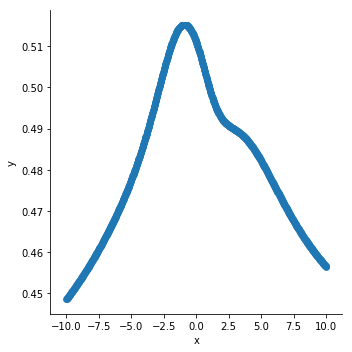

In [26]:
sns.lmplot(x='x', y='y',data=newd,
           fit_reg=False, # No regression line
          )  

Original sin wave

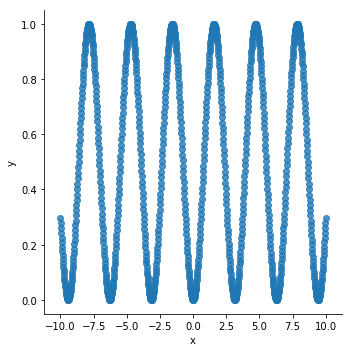

In [27]:
sns.lmplot(x='x', y='y',data=df,
           fit_reg=False, # No regression line
          )   